In [15]:
!nvidia-smi  # Verify GPU allocation
!python --version  # Python 3.10+

Tue Apr 15 11:19:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [16]:
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118
!pip install facenet-pytorch albumentations kagglehub
!pip install torchmetrics[image] -U

ERROR: Could not find a version that satisfies the requirement torch==2.0.1+cu118 (from versions: 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0)
ERROR: No matching distribution found for torch==2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.8 MB/s eta 0:00:00
   ━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 29.9 MB/s eta 0:00:00


In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets list  # Should display datasets if setup is correct

ref                                                        title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -----------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
adilshamim8/student-depression-dataset                     Student Depression Dataset                           467020  2025-03-13 03:12:30.423000          15110        238  1.0              
zahidmughal2343/amazon-sales-2025                          Amazon Sales 2025                                      3617  2025-04-03 22:08:13.607000           2484         37  1.0              
atharvasoundankar/chocolate-sales                          Chocolate Sales Data 📊🍫                               14473  2025-03-19 03:51:40.270000          23088        369  1.0              
atharvasoundankar/spotify-global-streami

In [3]:
!kaggle datasets download -d shuvoalok/raf-db-dataset

Dataset URL: https://www.kaggle.com/datasets/shuvoalok/raf-db-dataset
License(s): other


In [4]:
!kaggle datasets download -d arnabkumarroy02/ferplus

Dataset URL: https://www.kaggle.com/datasets/arnabkumarroy02/ferplus
License(s): MIT


In [5]:
# 1. RAF-DB
!kaggle datasets download -d shuvoalok/raf-db-dataset
!unzip raf-db-dataset.zip -d data/rafdb

# 2. FERPlus
!kaggle datasets download -d arnabkumarroy02/ferplus
!unzip ferplus.zip -d data/ferplus

Dataset URL: https://www.kaggle.com/datasets/shuvoalok/raf-db-dataset
License(s): other
raf-db-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  raf-db-dataset.zip
checkdir:  cannot create extraction directory: data/rafdb
           No such file or directory
Dataset URL: https://www.kaggle.com/datasets/arnabkumarroy02/ferplus
License(s): MIT
ferplus.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ferplus.zip
checkdir:  cannot create extraction directory: data/ferplus
           No such file or directory


In [9]:
ls


data/  ferplus.zip  kaggle.json  raf-db-dataset.zip  sample_data/


In [ ]:
ls -la?

Object `la` not found.


In [ ]:
ls -la

total 537244
drwxr-xr-x 1 root root      4096 Apr 13 20:56 ./
drwxr-xr-x 1 root root      4096 Apr 13 20:39 ../
drwxr-xr-x 4 root root      4096 Apr 10 13:37 .config/
-rw-r--r-- 1 root root 510597112 Apr 13  2024 ferplus.zip
-rw-r--r-- 1 root root        66 Apr 13 20:53 kaggle.json
-rw-r--r-- 1 root root  39511472 Sep 20  2023 raf-db-dataset.zip
drwxr-xr-x 1 root root      4096 Apr 10 13:37 sample_data/


In [7]:
!mkdir -p data/rafdb
!mkdir -p data/ferplus

In [8]:
# RAF-DB (correct dataset)
!kaggle datasets download -d pavansanagapati/rafdb-dataset -p data/rafdb --force
!unzip -q data/rafdb/rafdb-dataset.zip -d data/rafdb

# FERPlus (direct path)
!kaggle datasets download -d arnabkumarroy02/ferplus -p data/ferplus --force
!unzip -q data/ferplus/ferplus.zip -d data/ferplus

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/pavansanagapati/rafdb-dataset
unzip:  cannot find or open data/rafdb/rafdb-dataset.zip, data/rafdb/rafdb-dataset.zip.zip or data/rafdb/rafdb-dataset.zip.ZIP.
Dataset URL: https://www.kaggle.com/datasets/arnabkumarroy02/ferplus
License(s): MIT
 97% 472M/487M [00:01<00:00, 323MB/s]
100% 487M/487M [00:01<00:00, 388MB/s]


In [ ]:
ls -la

total 537248
drwxr-xr-x 1 root root      4096 Apr 13 21:06 ./
drwxr-xr-x 1 root root      4096 Apr 13 20:39 ../
drwxr-xr-x 4 root root      4096 Apr 10 13:37 .config/
drwxr-xr-x 4 root root      4096 Apr 13 21:06 data/
-rw-r--r-- 1 root root 510597112 Apr 13  2024 ferplus.zip
-rw-r--r-- 1 root root        66 Apr 13 20:53 kaggle.json
-rw-r--r-- 1 root root  39511472 Sep 20  2023 raf-db-dataset.zip
drwxr-xr-x 1 root root      4096 Apr 10 13:37 sample_data/


In [10]:
!rm -rf data/  # Remove previous attempts
!mkdir -p data/rafdb data/ferplus  # Create nested directories

In [11]:
# RAF-DB (official mirror)
!kaggle datasets download -d pavansanagapati/rafdb-dataset -p data/rafdb --force

# FERPlus (direct download)
!kaggle datasets download -d arnabkumarroy02/ferplus -p data/ferplus --force

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/pavansanagapati/rafdb-dataset
Dataset URL: https://www.kaggle.com/datasets/arnabkumarroy02/ferplus
License(s): MIT
 93% 455M/487M [00:02<00:00, 140MB/s] 
100% 487M/487M [00:02<00:00, 180MB/s]


In [12]:
import os

print("RAF-DB Contents:", os.listdir("data/rafdb"))
print("FERPlus Contents:", os.listdir("data/ferplus"))

RAF-DB Contents: []
FERPlus Contents: ['ferplus.zip']


In [ ]:
ls


data/  kaggle.json  sample_data/


In [13]:
# Create directory structure
!mkdir -p data/rafdb

# Move existing zip to target folder
!mv raf-db-dataset.zip data/rafdb/

# Unzip with full path
!unzip -q data/rafdb/raf-db-dataset.zip -d data/rafdb

# Verify
print("RAF-DB Contents:", os.listdir("data/rafdb"))
# Should show: ['test', 'train', 'raf-db-dataset.zip']

RAF-DB Contents: ['test_labels.csv', 'train_labels.csv', 'DATASET', 'raf-db-dataset.zip']


In [ ]:
ls


data/  ferplus.zip  kaggle.json  sample_data/


In [14]:
# Create directory
!mkdir -p data/ferplus

# Move existing zip
!mv ferplus.zip data/ferplus/

# Unzip
!unzip -q data/ferplus/ferplus.zip -d data/ferplus

# Verify
print("FERPlus Contents:", os.listdir("data/ferplus"))
# Should show: ['test', 'train', 'validation', 'ferplus.zip']

FERPlus Contents: ['ferplus.zip', 'validation', 'test', 'train']


In [15]:
import os
from pathlib import Path

def check_dataset(dataset_name, base_path, expected_dirs):
    """Check dataset availability and structure"""
    print(f"\nChecking {dataset_name}:")
    path = Path(base_path)

    if not path.exists():
        print(f"❌ Dataset not found at {base_path}")
        return False

    missing = []
    for dir in expected_dirs:
        if not (path/dir).exists():
            missing.append(dir)

    if missing:
        print(f"❌ Missing directories: {missing}")
        return False

    # Count sample images
    img_count = sum(1 for _ in path.glob('**/*.jpg') if _.is_file())
    print(f"✅ Found {img_count} images in proper structure")
    return True

# Check RAF-DB
rafdb_valid = check_dataset(
    "RAF-DB",
    "data/rafdb",
    ["train", "test"]
)

# Check FERPlus
ferplus_valid = check_dataset(
    "FERPlus",
    "data/ferplus",
    ["train", "test", "validation"]
)

# Check AffectNet (requires manual download)
affectnet_path = Path("data/affectnet")
affectnet_valid = affectnet_path.exists() and any(affectnet_path.iterdir())
print("\nChecking AffectNet:")
if affectnet_valid:
    print("✅ Found AffectNet dataset")
else:
    print("❌ AffectNet not found - download from:")
    print("http://mohammadmahoor.com/affectnet/")

# Final report
print("\nDataset Status:")
print(f"RAF-DB: {'✅' if rafdb_valid else '❌'}")
print(f"FERPlus: {'✅' if ferplus_valid else '❌'}")
print(f"AffectNet: {'✅' if affectnet_valid else '❌ (Needs manual download)'}")

# Suggested next steps
if rafdb_valid and ferplus_valid:
    print("\nReady to proceed with RAF-DB and FERPlus!")
elif rafdb_valid or ferplus_valid:
    print("\n⚠️ Partial datasets available - consider completing downloads")
else:
    print("\n❌ No valid datasets found - check setup steps")


Checking RAF-DB:
❌ Missing directories: ['train', 'test']

Checking FERPlus:
✅ Found 0 images in proper structure

Checking AffectNet:
❌ AffectNet not found - download from:
http://mohammadmahoor.com/affectnet/

Dataset Status:
RAF-DB: ❌
FERPlus: ✅
AffectNet: ❌ (Needs manual download)

⚠️ Partial datasets available - consider completing downloads


In [ ]:
ls

data/  kaggle.json  sample_data/


In [ ]:
ls data

ferplus/  rafdb/


In [16]:
# Clean existing setup
!rm -rf data/rafdb/*

# Verify zip file contents
!unzip -l data/rafdb/raf-db-dataset.zip

# Proper extraction (assuming standard RAF-DB structure)
!unzip -q data/rafdb/raf-db-dataset.zip -d data/rafdb

# Force correct directory structure if needed
!mkdir -p data/rafdb/{train,test}
!mv data/rafdb/DATASET/train/* data/rafdb/train/
!mv data/rafdb/DATASET/test/* data/rafdb/test/

unzip:  cannot find or open data/rafdb/raf-db-dataset.zip, data/rafdb/raf-db-dataset.zip.zip or data/rafdb/raf-db-dataset.zip.ZIP.
unzip:  cannot find or open data/rafdb/raf-db-dataset.zip, data/rafdb/raf-db-dataset.zip.zip or data/rafdb/raf-db-dataset.zip.ZIP.
mv: cannot stat 'data/rafdb/DATASET/train/*': No such file or directory
mv: cannot stat 'data/rafdb/DATASET/test/*': No such file or directory


In [17]:
# 1. RAF-DB
!kaggle datasets download -d shuvoalok/raf-db-dataset
!unzip raf-db-dataset.zip -d data/rafdb

# 2. FERPlus
!kaggle datasets download -d arnabkumarroy02/ferplus
!unzip ferplus.zip -d data/ferplus

Streaming output truncated to the last 5000 lines.
  inflating: data/ferplus/validation/fear/augmented_406.png  
  inflating: data/ferplus/validation/fear/augmented_407.png  
  inflating: data/ferplus/validation/fear/augmented_408.png  
  inflating: data/ferplus/validation/fear/augmented_409.png  
  inflating: data/ferplus/validation/fear/augmented_41.png  
  inflating: data/ferplus/validation/fear/augmented_410.png  
  inflating: data/ferplus/validation/fear/augmented_411.png  
  inflating: data/ferplus/validation/fear/augmented_412.png  
  inflating: data/ferplus/validation/fear/augmented_413.png  
  inflating: data/ferplus/validation/fear/augmented_414.png  
  inflating: data/ferplus/validation/fear/augmented_415.png  
  inflating: data/ferplus/validation/fear/augmented_416.png  
  inflating: data/ferplus/validation/fear/augmented_417.png  
  inflating: data/ferplus/validation/fear/augmented_418.png  
  inflating: data/ferplus/validation/fear/augmented_419.png  
  inflating: data/fe

In [ ]:
ls


data/  ferplus.zip  kaggle.json  raf-db-dataset.zip  sample_data/


In [18]:
!kaggle datasets download -d ananthu017/emotion-detection-fer
!unzip -q emotion-detection-fer.zip -d data/emotion_fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0


In [ ]:
ls

data/                      ferplus.zip  raf-db-dataset.zip
emotion-detection-fer.zip  kaggle.json  sample_data/


In [19]:
# Check dataset structures
!ls data/rafdb
!ls data/ferplus
!ls data/emotion_fer

# Expected structure:
# RAF-DB: Train/Test folders with emotion-labeled subfolders
# FERPlus: train.csv, test.csv with pixel arrays
# Emotion FER: train/, test/ folders with 7 emotion subfolders

DATASET  test  test_labels.csv	train  train_labels.csv
ferplus.zip  test  train  validation
test  train


In [20]:
# Check dataset structures
!ls -la data/rafdb
!ls -la data/ferplus
!ls -la data/emotion_fer

# Expected structure:
# RAF-DB: Train/Test folders with emotion-labeled subfolders
# FERPlus: train.csv, test.csv with pixel arrays
# Emotion FER: train/, test/ folders with 7 emotion subfolders

total 420
drwxr-xr-x 5 root root   4096 Apr 15 11:43 .
drwxr-xr-x 5 root root   4096 Apr 15 11:44 ..
drwxr-xr-x 4 root root   4096 Apr 15 11:43 DATASET
drwxr-xr-x 2 root root   4096 Apr 15 11:43 test
-rw-r--r-- 1 root root  76713 Sep 20  2023 test_labels.csv
drwxr-xr-x 2 root root   4096 Apr 15 11:43 train
-rw-r--r-- 1 root root 331330 Sep 20  2023 train_labels.csv
total 498656
drwxr-xr-x  5 root root      4096 Apr 15 11:42 .
drwxr-xr-x  5 root root      4096 Apr 15 11:44 ..
-rw-r--r--  1 root root 510597112 Apr 13  2024 ferplus.zip
drwxr-xr-x 10 root root      4096 Apr 15 11:42 test
drwxr-xr-x 10 root root      4096 Apr 15 11:42 train
drwxr-xr-x 10 root root      4096 Apr 15 11:43 validation
total 16
drwxr-xr-x 4 root root 4096 Apr 15 11:44 .
drwxr-xr-x 5 root root 4096 Apr 15 11:44 ..
drwxr-xr-x 9 root root 4096 Apr 15 11:44 test
drwxr-xr-x 9 root root 4096 Apr 15 11:44 train


In [21]:
# FERPlus CSV-to-image conversion
import pandas as pd
from PIL import Image

df = pd.read_csv("data/ferplus/train.csv")
for idx, row in df.iterrows():
    pixels = np.array(row['pixels'].split(), dtype=np.uint8)
    img = Image.fromarray(pixels.reshape(48, 48))
    img.save(f"data/ferplus/images/train/{row['emotion']}/{idx}.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'data/ferplus/train.csv'

In [22]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Create emotion label mapping (FERPlus 8 classes)
EMOTION_MAP = {
    0: "neutral",
    1: "happiness",
    2: "surprise",
    3: "sadness",
    4: "anger",
    5: "disgust",
    6: "fear",
    7: "contempt"
}

def process_ferplus_csv(csv_path, output_dir):
    """Convert FERPlus CSV to organized image folders"""
    df = pd.read_csv(csv_path)

    for idx, row in df.iterrows():
        try:
            # Get dominant emotion (columns 2-9)
            emotion_scores = row[2:10].values.astype(float)
            dominant_emotion = np.argmax(emotion_scores)

            # Skip invalid/ambiguous labels
            if emotion_scores[dominant_emotion] < 1.0:
                continue

            # Convert pixels to image
            pixels = np.array(row['pixels'].split(), dtype=np.uint8)
            img = Image.fromarray(pixels.reshape(48, 48))

            # Create output path
            emotion_dir = os.path.join(output_dir, EMOTION_MAP[dominant_emotion])
            os.makedirs(emotion_dir, exist_ok=True)

            # Save as PNG
            img.save(os.path.join(emotion_dir, f"{idx}.png"))

        except Exception as e:
            print(f"Error processing row {idx}: {str(e)}")
            continue

# Process all splits
process_ferplus_csv("data/ferplus/train_labels.csv", "data/ferplus/train")
process_ferplus_csv("data/ferplus/test_labels.csv", "data/ferplus/test")
process_ferplus_csv("data/ferplus/validation_labels.csv", "data/ferplus/validation")

FileNotFoundError: [Errno 2] No such file or directory: 'data/ferplus/train_labels.csv'

In [23]:
!pip install pandas


In [24]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Create emotion label mapping (FERPlus 8 classes)
EMOTION_MAP = {
    0: "neutral",
    1: "happiness",
    2: "surprise",
    3: "sadness",
    4: "anger",
    5: "disgust",
    6: "fear",
    7: "contempt"
}

def process_ferplus_csv(csv_path, output_dir):
    """Convert FERPlus CSV to organized image folders"""
    df = pd.read_csv(csv_path)

    for idx, row in df.iterrows():
        try:
            # Get dominant emotion (columns 2-9)
            emotion_scores = row[2:10].values.astype(float)
            dominant_emotion = np.argmax(emotion_scores)

            # Skip invalid/ambiguous labels
            if emotion_scores[dominant_emotion] < 1.0:
                continue

            # Convert pixels to image
            pixels = np.array(row['pixels'].split(), dtype=np.uint8)
            img = Image.fromarray(pixels.reshape(48, 48))

            # Create output path
            emotion_dir = os.path.join(output_dir, EMOTION_MAP[dominant_emotion])
            os.makedirs(emotion_dir, exist_ok=True)

            # Save as PNG
            img.save(os.path.join(emotion_dir, f"{idx}.png"))

        except Exception as e:
            print(f"Error processing row {idx}: {str(e)}")
            continue

# Process all splits
process_ferplus_csv("data/ferplus/train_labels.csv", "data/ferplus/train")
process_ferplus_csv("data/ferplus/test_labels.csv", "data/ferplus/test")
process_ferplus_csv("data/ferplus/validation_labels.csv", "data/ferplus/validation")

FileNotFoundError: [Errno 2] No such file or directory: 'data/ferplus/train_labels.csv'

In [25]:
!pip install --upgrade numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 68.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires numpy<2.0.0,>=1.24.0, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [26]:
!pip install --upgrade pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 109.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [27]:
!pip install pandas==2.2.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 61.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3


In [28]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Create emotion label mapping (FERPlus 8 classes)
EMOTION_MAP = {
    0: "neutral",
    1: "happiness",
    2: "surprise",
    3: "sadness",
    4: "anger",
    5: "disgust",
    6: "fear",
    7: "contempt"
}

def process_ferplus_csv(csv_path, output_dir):
    """Convert FERPlus CSV to organized image folders"""
    df = pd.read_csv(csv_path)

    for idx, row in df.iterrows():
        try:
            # Get dominant emotion (columns 2-9)
            emotion_scores = row[2:10].values.astype(float)
            dominant_emotion = np.argmax(emotion_scores)

            # Skip invalid/ambiguous labels
            if emotion_scores[dominant_emotion] < 1.0:
                continue

            # Convert pixels to image
            pixels = np.array(row['pixels'].split(), dtype=np.uint8)
            img = Image.fromarray(pixels.reshape(48, 48))

            # Create output path
            emotion_dir = os.path.join(output_dir, EMOTION_MAP[dominant_emotion])
            os.makedirs(emotion_dir, exist_ok=True)

            # Save as PNG
            img.save(os.path.join(emotion_dir, f"{idx}.png"))

        except Exception as e:
            print(f"Error processing row {idx}: {str(e)}")
            continue

# Process all splits
process_ferplus_csv("data/ferplus/train_labels.csv", "data/ferplus/train")
process_ferplus_csv("data/ferplus/test_labels.csv", "data/ferplus/test")
process_ferplus_csv("data/ferplus/validation_labels.csv", "data/ferplus/validation")

FileNotFoundError: [Errno 2] No such file or directory: 'data/ferplus/train_labels.csv'

In [29]:
# Run this first to restart the environment
exit()

In [ ]:
import numpy as np
print(np.__version__)  # Should show 1.23.5

In [2]:
# Uninstall existing numpy
!pip uninstall -y numpy

# Install specific compatible version
!pip install numpy==1.23.5 --force-reinstall

# Verify installation
!pip show numpy | grep Version

Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 57.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires numpy<2.0.0,>=1.24.0, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentat

Version: 1.23.5


In [3]:
# Uninstall existing numpy
!pip uninstall -y numpy

# Install specific compatible version
!pip install numpy==1.23.5 --force-reinstall

# Verify installation
!pip show numpy | grep Version

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires numpy<2.0.0,>=1.24.0, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 

Version: 1.23.5


In [1]:
import numpy as np
print(np.__version__)  # Should show 1.23.5

1.23.5


In [2]:
# Install other required packages AFTER numpy
!pip install pandas pillow facenet-pytorch

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Create emotion label mapping (FERPlus 8 classes)
EMOTION_MAP = {
    0: "neutral",
    1: "happiness",
    2: "surprise",
    3: "sadness",
    4: "anger",
    5: "disgust",
    6: "fear",
    7: "contempt"
}

def process_ferplus_csv(csv_path, output_dir):
    """Convert FERPlus CSV to organized image folders"""
    df = pd.read_csv(csv_path)

    for idx, row in df.iterrows():
        try:
            # Get dominant emotion (columns 2-9)
            emotion_scores = row[2:10].values.astype(float)
            dominant_emotion = np.argmax(emotion_scores)

            # Skip invalid/ambiguous labels
            if emotion_scores[dominant_emotion] < 1.0:
                continue

            # Convert pixels to image
            pixels = np.array(row['pixels'].split(), dtype=np.uint8)
            img = Image.fromarray(pixels.reshape(48, 48))

            # Create output path
            emotion_dir = os.path.join(output_dir, EMOTION_MAP[dominant_emotion])
            os.makedirs(emotion_dir, exist_ok=True)

            # Save as PNG
            img.save(os.path.join(emotion_dir, f"{idx}.png"))

        except Exception as e:
            print(f"Error processing row {idx}: {str(e)}")
            continue

# Process all splits
process_ferplus_csv("data/ferplus/train_labels.csv", "data/ferplus/train")
process_ferplus_csv("data/ferplus/test_labels.csv", "data/ferplus/test")
process_ferplus_csv("data/ferplus/validation_labels.csv", "data/ferplus/validation")

FileNotFoundError: [Errno 2] No such file or directory: 'data/ferplus/train_labels.csv'

In [4]:
ls

data/                      ferplus.zip  raf-db-dataset.zip
emotion-detection-fer.zip  kaggle.json  sample_data/


In [5]:
# Delete existing data and reinstall datasets properly
!rm -rf data/
!mkdir -p data/{rafdb,ferplus,fer2013}

# Unzip datasets with proper structure
!unzip raf-db-dataset.zip -d data/rafdb
!unzip ferplus.zip -d data/ferplus


# Verify directory structure
!find data/ -maxdepth 3 -type d

Streaming output truncated to the last 5000 lines.
  inflating: data/ferplus/validation/fear/augmented_437.png  
  inflating: data/ferplus/validation/fear/augmented_438.png  
  inflating: data/ferplus/validation/fear/augmented_439.png  
  inflating: data/ferplus/validation/fear/augmented_44.png  
  inflating: data/ferplus/validation/fear/augmented_440.png  
  inflating: data/ferplus/validation/fear/augmented_441.png  
  inflating: data/ferplus/validation/fear/augmented_442.png  
  inflating: data/ferplus/validation/fear/augmented_443.png  
  inflating: data/ferplus/validation/fear/augmented_444.png  
  inflating: data/ferplus/validation/fear/augmented_445.png  
  inflating: data/ferplus/validation/fear/augmented_446.png  
  inflating: data/ferplus/validation/fear/augmented_447.png  
  inflating: data/ferplus/validation/fear/augmented_448.png  
  inflating: data/ferplus/validation/fear/augmented_449.png  
  inflating: data/ferplus/validation/fear/augmented_45.png  
  inflating: data/fer

In [6]:
import torch
import albumentations as A
import numpy as np
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Hardware setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = torch.cuda.amp.GradScaler()
print(f"Using device: {device}")

# Initialize face detector with GPU acceleration
mtcnn = MTCNN(
    keep_all=True,
    post_process=False,
    device=device,
    thresholds=[0.7, 0.8, 0.8]  # More robust face detection
)

Using device: cuda


In [ ]:
class DSANDataset(Dataset):
    def __init__(self, dataset_name, root_dir, phase='train'):
        self.dataset_name = dataset_name
        self.phase = phase
        self.image_paths = []
        self.labels = []
        self.emotion_map = {
            'neutral': 0, 'happy': 1, 'sad': 2, 'surprise': 3,
            'fear': 4, 'disgust': 5, 'anger': 6, 'contempt': 7
        }

        # Dataset-specific loading
        if dataset_name == "RAF-DB":
            self._load_rafdb(f"{root_dir}/rafdb")
        elif dataset_name == "FERPlus":
            self._load_ferplus(f"{root_dir}/ferplus")
        elif dataset_name == "FER2013":
            self._load_fer2013(f"{root_dir}/fer2013")

        # Advanced augmentation pipeline
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.CoarseDropout(max_holes=3,
                           max_height=40,
                           max_width=40,
                           fill_value=0.5,
                           p=0.3),
            A.Rotate(limit=30, border_mode=0, p=0.4),
            A.Normalize()
        ])

    def _load_rafdb(self, path):
        # Load RAF-DB from organized folders
        for emotion in os.listdir(f"{path}/train"):
            for img_file in os.listdir(f"{path}/train/{emotion}"):
                self.image_paths.append(f"{path}/train/{emotion}/{img_file}")
                self.labels.append(self.emotion_map[emotion.lower()])

    def _load_ferplus(self, path):
        # Load FERPlus from CSV structure
        df = pd.read_csv(f"{path}/label.csv")
        for _, row in df.iterrows():
            self.image_paths.append(f"{path}/images/{row['filename']}")
            self.labels.append(row['emotion'])

    def _load_fer2013(self, path):
        # Load FER2013 from emotion folders
        for emotion in os.listdir(f"{path}/train"):
            for img_file in os.listdir(f"{path}/train/{emotion}"):
                self.image_paths.append(f"{path}/train/{emotion}/{img_file}")
                self.labels.append(self.emotion_map[emotion.lower()])

    def __len__(self):
        return len(self.image_paths)

    def _generate_dummy_sample(self):
        """Create blank image for failed samples"""
        return torch.zeros((3, 224, 224)), -1

    def __getitem__(self, idx):
        try:
            # Load and align face
            img = Image.open(self.image_paths[idx]).convert('RGB')
            faces = mtcnn(img)

            if faces is None or len(faces) == 0:
                raise RuntimeError("No face detected")

            # Convert to numpy array for albumentations
            face = faces[0].permute(1,2,0).cpu().numpy()
            face = (face * 255).astype(np.uint8)

            # Apply augmentations
            augmented = self.transform(image=face)['image']

            return torch.from_numpy(augmented).permute(2,0,1).float(), self.labels[idx]

        except Exception as e:
            print(f"Error processing {self.image_paths[idx]}: {str(e)}")
            return self._generate_dummy_sample()

In [ ]:
# Example usage
raf_train = DSANDataset("RAF-DB", "data", "train")
ferplus_train = DSANDataset("FERPlus", "data", "train")
fer2013_train = DSANDataset("FER2013", "data", "train")

# Combined dataset
combined_dataset = torch.utils.data.ConcatDataset(
    [raf_train, ferplus_train, fer2013_train]
)

# Create dataloader with error filtering
def collate_fn(batch):
    # Filter out dummy samples
    batch = [item for item in batch if item[1] != -1]
    return torch.utils.data.default_collate(batch)

train_loader = DataLoader(
    combined_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=2,
    collate_fn=collate_fn,
    persistent_workers=True
)

FileNotFoundError: [Errno 2] No such file or directory: 'data/rafdb/train'

In [7]:
!find data/rafdb -maxdepth 3 -type d

data/rafdb
data/rafdb/DATASET
data/rafdb/DATASET/test
data/rafdb/DATASET/test/3
data/rafdb/DATASET/test/6
data/rafdb/DATASET/test/7
data/rafdb/DATASET/test/2
data/rafdb/DATASET/test/1
data/rafdb/DATASET/test/4
data/rafdb/DATASET/test/5
data/rafdb/DATASET/train
data/rafdb/DATASET/train/3
data/rafdb/DATASET/train/6
data/rafdb/DATASET/train/7
data/rafdb/DATASET/train/2
data/rafdb/DATASET/train/1
data/rafdb/DATASET/train/4
data/rafdb/DATASET/train/5


In [ ]:
class DSANDataset(Dataset):
    def __init__(self, dataset_name, root_dir, phase='train'):
        # ... [previous initializations] ...

        if dataset_name == "RAF-DB":
            actual_path = os.path.join(root_dir, "rafdb/DATASET")  # Modified path
            if not os.path.exists(actual_path):
                raise FileNotFoundError(f"RAF-DB base path {actual_path} not found!")

            # Updated path handling for your structure
            phase_path = os.path.join(actual_path, phase)
            if not os.path.exists(phase_path):
                raise FileNotFoundError(
                    f"RAF-DB {phase} folder not found at {phase_path}. "
                    f"Existing: {os.listdir(actual_path)}"
                )

            self._load_rafdb_numeric_folders(phase_path)

    def _load_rafdb_numeric_folders(self, path):
        """Load from numeric folders 1-7 with RAF-DB mapping"""
        print(f"Loading RAF-DB from: {path}")

        # Official RAF-DB label mapping
        numeric_to_emotion = {
            '1': 'surprise',
            '2': 'fear',
            '3': 'disgust',
            '4': 'happiness',
            '5': 'sadness',
            '6': 'anger',
            '7': 'neutral'
        }

        for numeric_folder in os.listdir(path):
            emotion = numeric_to_emotion.get(numeric_folder)
            if not emotion:
                continue

            folder_path = os.path.join(path, numeric_folder)
            if not os.path.isdir(folder_path):
                continue

            for img_file in os.listdir(folder_path):
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    self.image_paths.append(os.path.join(folder_path, img_file))
                    self.labels.append(self.emotion_map[emotion])

        print(f"Loaded {len(self.image_paths)} {self.phase} samples from RAF-DB")

# Usage
raf_train = DSANDataset("RAF-DB", "data", "train")  # Loads from data/rafdb/DATASET/train
raf_test = DSANDataset("RAF-DB", "data", "test")    # Loads from data/rafdb/DATASET/test

Loading RAF-DB from: data/rafdb/DATASET/train


AttributeError: 'DSANDataset' object has no attribute 'image_paths'

In [ ]:
import os
import torch
from torch.utils.data import Dataset
from PIL import Image

class DSANDataset(Dataset):
    def __init__(self, dataset_name, root_dir, phase='train'):
        # Initialize core attributes first
        self.image_paths = []  # Now properly initialized
        self.labels = []       # Now properly initialized
        self.dataset_name = dataset_name
        self.phase = phase
        self.emotion_map = {
            'neutral': 0, 'happiness': 1, 'sadness': 2, 'surprise': 3,
            'fear': 4, 'disgust': 5, 'anger': 6, 'contempt': 7
        }

        # Dataset loading
        if dataset_name == "RAF-DB":
            self._load_rafdb(os.path.join(root_dir, "rafdb/DATASET", phase))

    def _load_rafdb(self, path):
        """Load RAF-DB from your specific structure"""
        print(f"Loading RAF-DB from: {path}")

        # Official RAF-DB numeric to emotion mapping
        folder_to_emotion = {
            '1': 'surprise',
            '2': 'fear',
            '3': 'disgust',
            '4': 'happiness',
            '5': 'sadness',
            '6': 'anger',
            '7': 'neutral'
        }

        # Load images from numeric subfolders
        for folder in os.listdir(path):
            emotion = folder_to_emotion.get(folder)
            if not emotion:
                continue

            folder_path = os.path.join(path, folder)
            for img_file in os.listdir(folder_path):
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    self.image_paths.append(os.path.join(folder_path, img_file))
                    self.labels.append(self.emotion_map[emotion])

        print(f"Loaded {len(self.image_paths)} samples")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Your existing implementation
        # ...

# Test initialization
raf_train = DSANDataset("RAF-DB", "data", "train")
print(f"Successfully initialized with {len(raf_train)} samples")

IndentationError: expected an indented block after function definition on line 54 (<ipython-input-10-669f30748fbf>, line 59)

In [8]:
import os
import torch
from torch.utils.data import Dataset
from PIL import Image

class DSANDataset(Dataset):
    def __init__(self, dataset_name, root_dir, phase='train'):
        # Initialize attributes
        self.image_paths = []
        self.labels = []
        self.dataset_name = dataset_name
        self.phase = phase
        self.emotion_map = {
            'neutral': 0, 'happiness': 1, 'sadness': 2,
            'surprise': 3, 'fear': 4, 'disgust': 5,
            'anger': 6, 'contempt': 7
        }

        # Load dataset
        if dataset_name == "RAF-DB":
            self._load_rafdb(os.path.join(root_dir, "rafdb/DATASET", phase))

    def _load_rafdb(self, path):
        """Load RAF-DB dataset from numeric folders"""
        print(f"Loading RAF-DB from: {path}")

        folder_to_emotion = {
            '1': 'surprise', '2': 'fear', '3': 'disgust',
            '4': 'happiness', '5': 'sadness',
            '6': 'anger', '7': 'neutral'
        }

        for folder in os.listdir(path):
            emotion = folder_to_emotion.get(folder)
            if emotion:
                folder_path = os.path.join(path, folder)
                for img_file in os.listdir(folder_path):
                    if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                        self.image_paths.append(os.path.join(folder_path, img_file))
                        self.labels.append(self.emotion_map[emotion])

        print(f"Loaded {len(self.image_paths)} samples")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
      try:
          # Load image
          img_path = self.image_paths[idx]
          img = Image.open(img_path).convert('RGB')

          # Face detection & alignment
          faces = self.face_detector(img)
          if faces is None or len(faces) == 0:
              raise RuntimeError("No face detected")

          # Convert tensor to numpy for albumentations
          face = faces[0].permute(1,2,0).cpu().numpy()
          face = (face * 255).astype(np.uint8)

          # Apply augmentations
          augmented = self.transform(image=face)['image']

          # Convert back to tensor
          tensor = torch.from_numpy(augmented).permute(2,0,1).float()
          return tensor, self.labels[idx]

      except Exception as e:
          print(f"Error in {img_path}: {str(e)}")
          return self._generate_dummy_sample()

def _generate_dummy_sample(self):
    """Black image + invalid label"""
    return torch.zeros((3, 224, 224)), -1

# Initialize dataset
raf_train = DSANDataset("RAF-DB", "data", "train")
print(f"Successfully loaded {len(raf_train)} training samples")

Loading RAF-DB from: data/rafdb/DATASET/train
Loaded 12271 samples
Successfully loaded 12271 training samples


In [ ]:
import os
import numpy as np
import torch
import albumentations as A
from PIL import Image
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader

# --------------------------
# 1. Environment Setup
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = torch.cuda.amp.GradScaler()
print(f"Using device: {device}")

# --------------------------
# 2. Dataset Class
# --------------------------
class DSANDataset(Dataset):
    def __init__(self, dataset_name, root_dir, phase='train'):
        # Initialize core components
        self.image_paths = []
        self.labels = []
        self.dataset_name = dataset_name
        self.phase = phase
        self.face_detector = MTCNN(keep_all=True, device=device)

        # Initialize augmentations
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.CoarseDropout(max_holes=3,
                          max_height=40,
                          max_width=40,
                          fill_value=0.5,
                          p=0.3),
            A.Rotate(limit=30, border_mode=0, p=0.4),
            A.Normalize()
        ])

        # Emotion mappings
        self.emotion_map = {
            'neutral': 0, 'happiness': 1, 'sadness': 2,
            'surprise': 3, 'fear': 4, 'disgust': 5,
            'anger': 6, 'contempt': 7
        }

        # Load dataset
        if dataset_name == "RAF-DB":
            self._load_rafdb(os.path.join(root_dir, "rafdb/DATASET", phase))
        elif dataset_name == "FERPlus":
            self._load_ferplus(os.path.join(root_dir, "ferplus", phase))
        elif dataset_name == "FER2013":
            self._load_fer2013(os.path.join(root_dir, "fer2013", phase))

    # --------------------------
    # Dataset Loading Methods
    # --------------------------
    def _load_rafdb(self, path):
        """Load RAF-DB dataset"""
        print(f"Loading RAF-DB from: {path}")
        folder_to_emotion = {
            '1': 'surprise', '2': 'fear', '3': 'disgust',
            '4': 'happiness', '5': 'sadness', '6': 'anger', '7': 'neutral'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_ferplus(self, path):
        """Load FERPlus dataset"""
        print(f"Loading FERPlus from: {path}")
        folder_to_emotion = {
            'neutral': 'neutral', 'happy': 'happiness',
            'sad': 'sadness', 'surprise': 'surprise',
            'fear': 'fear', 'disgust': 'disgust',
            'anger': 'anger', 'contempt': 'contempt'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_fer2013(self, path):
        """Load FER2013 dataset"""
        print(f"Loading FER2013 from: {path}")
        folder_to_emotion = {
            '0': 'anger', '1': 'disgust', '2': 'fear',
            '3': 'happiness', '4': 'sadness', '5': 'surprise',
            '6': 'neutral'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_from_folders(self, path, mapping):
        """Generic folder loader"""
        for folder in os.listdir(path):
            emotion = mapping.get(folder)
            if emotion:
                folder_path = os.path.join(path, folder)
                for img_file in os.listdir(folder_path):
                    if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                        self.image_paths.append(os.path.join(folder_path, img_file))
                        self.labels.append(self.emotion_map[emotion])
        print(f"Loaded {len(self.image_paths)} samples")

    # --------------------------
    # Core Dataset Methods
    # --------------------------
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        try:
            # Load and process image
            img = Image.open(self.image_paths[idx]).convert('RGB')
            faces = self.face_detector(img)

            if faces is None or len(faces) == 0:
                raise RuntimeError("No face detected")

            # Convert tensor to numpy array
            face = faces[0].permute(1,2,0).cpu().numpy()
            face = (face * 255).astype(np.uint8)

            # Apply augmentations
            augmented = self.transform(image=face)['image']

            return torch.from_numpy(augmented).permute(2,0,1).float(), self.labels[idx]

        except Exception as e:
            print(f"Error processing {self.image_paths[idx]}: {str(e)}")
            return self._generate_dummy_sample()

    def _generate_dummy_sample(self):
        """Generate blank sample for error cases"""
        return torch.zeros((3, 224, 224)), -1

# --------------------------
# 3. Usage Example
# --------------------------
if __name__ == "__main__":
    # Initialize datasets
    raf_train = DSANDataset("RAF-DB", "data", "train")
    ferplus_train = DSANDataset("FERPlus", "data", "train")
    fer2013_train = DSANDataset("FER2013", "data", "train")

    # Create combined dataloader
    combined_dataset = torch.utils.data.ConcatDataset(
        [raf_train, ferplus_train, fer2013_train]
    )

    train_loader = DataLoader(
        combined_dataset,
        batch_size=128,
        shuffle=True,
        num_workers=4,
        persistent_workers=True
    )

    # Test batch
    batch = next(iter(train_loader))
    print(f"Batch shape: {batch[0].shape}")
    print(f"Labels: {batch[1]}")

Using device: cuda
Loading RAF-DB from: data/rafdb/DATASET/train
Loaded 12271 samples
Loading FERPlus from: data/ferplus/train
Loaded 50379 samples
Loading FER2013 from: data/fer2013/train
Loaded 0 samples


<ipython-input-12-f2c0471d8462>:31: UserWarning: Argument(s) 'max_holes, max_height, max_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=3,
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Error processing data/ferplus/train/disgust/augmented_2915.png: Cannot re-initialize CUDA in forked subprocess. To use CUDA with multiprocessing, you must use the 'spawn' start method
Error processing data/ferplus/train/disgust/augmented_2751.png: Cannot re-initialize CUDA in forked subprocess. To use CUDA with multiprocessing, you must use the 'spawn' start methodError processing data/rafdb/DATASET/train/4/train_05721_aligned.jpg: Cannot re-initialize CUDA in forked subprocess. To use CUDA with multiprocessing, you must use the 'spawn' start methodError processing data/ferplus/train/happy/fer0009441.png: Cannot re-initialize CUDA in forked subprocess. To use CUDA with multiprocessing, you must use the 'spawn' start method

Error processing data/rafdb/DATASET/train/4/train_00498_aligned.jpg: Cannot re-initialize CUDA in forked subprocess. To use CUDA with multiprocessing, you must use the 'spawn' start methodError processing data/ferplus/train/fear/augmented_1994.png: Cannot re-initial

In [ ]:
!tree


/bin/bash: line 1: tree: command not found


In [ ]:
ls -la


total 603980
drwxr-xr-x 1 root root      4096 Apr 13 21:54 ./
drwxr-xr-x 1 root root      4096 Apr 13 20:39 ../
drwxr-xr-x 4 root root      4096 Apr 10 13:37 .config/
drwxr-xr-x 5 root root      4096 Apr 13 21:54 data/
-rw-r--r-- 1 root root  68327503 Dec 11  2020 emotion-detection-fer.zip
-rw-r--r-- 1 root root 510597112 Apr 13  2024 ferplus.zip
-rw-r--r-- 1 root root        66 Apr 13 20:53 kaggle.json
-rw-r--r-- 1 root root  39511472 Sep 20  2023 raf-db-dataset.zip
drwxr-xr-x 1 root root      4096 Apr 10 13:37 sample_data/


In [ ]:
!pip install tree


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 9.2 MB/s eta 0:00:00
  Created wheel for tree: filename=Tree-0.2.4-py3-none-any.whl size=7860 sha256=1e7a3c03e2d4be9152445c560188de042717a082788a710d9ab3ea4cbe09ac2e
  Stored in directory: /root/.cache/pip/wheels/e8/ed/fe/b4c6a9b7a5b8df6d966ea673e26a46a7451b020af754eafa6b
Successfully built tree


In [ ]:
!cd data

In [ ]:
!tree


/bin/bash: line 1: tree: command not found


In [ ]:
!man tree

This system has been minimized by removing packages and content that are
not required on a system that users do not log into.

To restore this content, including manpages, you can run the 'unminimize'
command. You will still need to ensure the 'man-db' package is installed.


In [ ]:
ls data

fer2013/  ferplus/  rafdb/


In [ ]:
# Verify directory structure
!find data/ -maxdepth 3 -type d

data/
data/ferplus
data/ferplus/validation
data/ferplus/validation/disgust
data/ferplus/validation/fear
data/ferplus/validation/contempt
data/ferplus/validation/angry
data/ferplus/validation/neutral
data/ferplus/validation/sad
data/ferplus/validation/happy
data/ferplus/validation/suprise
data/ferplus/test
data/ferplus/test/disgust
data/ferplus/test/fear
data/ferplus/test/contempt
data/ferplus/test/angry
data/ferplus/test/neutral
data/ferplus/test/sad
data/ferplus/test/happy
data/ferplus/test/suprise
data/ferplus/train
data/ferplus/train/disgust
data/ferplus/train/fear
data/ferplus/train/contempt
data/ferplus/train/angry
data/ferplus/train/neutral
data/ferplus/train/sad
data/ferplus/train/happy
data/ferplus/train/suprise
data/rafdb
data/rafdb/DATASET
data/rafdb/DATASET/test
data/rafdb/DATASET/train
data/fer2013
data/fer2013/test
data/fer2013/test/surprised
data/fer2013/test/angry
data/fer2013/test/neutral
data/fer2013/test/sad
data/fer2013/test/fearful
data/fer2013/test/happy
data/fer20

In [ ]:
import os
import numpy as np
import torch
import albumentations as A
from PIL import Image
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader
import multiprocessing  # Add missing import

# --------------------------
# 1. Environment Setup
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = torch.cuda.amp.GradScaler()
print(f"Using device: {device}")

# --------------------------
# 2. Dataset Class (Fixed)
# --------------------------
class DSANDataset(Dataset):
    def __init__(self, dataset_name, root_dir, phase='train'):
        self.image_paths = []
        self.labels = []
        self.dataset_name = dataset_name
        self.phase = phase

        # Initialize face detector lazily
        self.face_detector = None

        # Corrected augmentation parameters
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.CoarseDropout(max_holes=3, max_height=40, max_width=40,
                          min_holes=1, min_height=10, min_width=10,
                          fill_value=0.5, p=0.3),
            A.Rotate(limit=30, border_mode=0, p=0.4),
            A.Normalize()
        ])

        # Unified emotion mapping
        self.emotion_map = {
            'neutral': 0, 'happiness': 1, 'happy': 1,
            'sadness': 2, 'sad': 2,
            'surprise': 3, 'surprised': 3,
            'fear': 4, 'fearful': 4,
            'disgust': 5, 'disgusted': 5,
            'anger': 6, 'angry': 6,
            'contempt': 7
        }

        # Load dataset
        if dataset_name == "RAF-DB":
            self._load_rafdb(os.path.join(root_dir, "rafdb/DATASET", phase))
        elif dataset_name == "FERPlus":
            self._load_ferplus(os.path.join(root_dir, "ferplus", phase))
        elif dataset_name == "FER2013":
            self._load_fer2013(os.path.join(root_dir, "fer2013", phase))

    def _load_fer2013(self, path):
        """Fixed FER2013 loading"""
        print(f"Loading FER2013 from: {path}")
        folder_to_emotion = {
            'angry': 'anger',
            'disgusted': 'disgust',
            'fearful': 'fear',
            'happy': 'happiness',
            'sad': 'sadness',
            'surprised': 'surprise',
            'neutral': 'neutral'
        }
        self._load_from_folders(path, folder_to_emotion)

    def __getitem__(self, idx):
        try:
            # Lazy initialization of face detector
            if self.face_detector is None:
                self.face_detector = MTCNN(keep_all=True, device=device)

            # Rest of the original __getitem__ code
            img = Image.open(self.image_paths[idx]).convert('RGB')
            faces = self.face_detector(img)
            # ... (rest of the processing)

        except Exception as e:
            print(f"Error processing {self.image_paths[idx]}: {str(e)}")
            return self._generate_dummy_sample()

# --------------------------
# 3. Correct Usage
# --------------------------
if __name__ == "__main__":
    # Set multiprocessing context FIRST
    multiprocessing.set_start_method('spawn', force=True)

    # Initialize datasets
    raf_train = DSANDataset("RAF-DB", "data", "train")
    ferplus_train = DSANDataset("FERPlus", "data", "train")
    fer2013_train = DSANDataset("FER2013", "data", "train")

    # Create dataloader with adjusted workers
    train_loader = DataLoader(
        torch.utils.data.ConcatDataset([raf_train, ferplus_train, fer2013_train]),
        batch_size=128,
        shuffle=True,
        num_workers=2,  # Reduced for stability
        persistent_workers=True
    )

    # Test batch
    batch = next(iter(train_loader))
    print(f"Batch shape: {batch[0].shape}")
    print(f"Valid labels count: {sum(batch[1] != -1).item()}")

Using device: cuda


<ipython-input-14-c219c0463d17>:33: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=3, max_height=40, max_width=40,


AttributeError: 'DSANDataset' object has no attribute '_load_rafdb'

In [ ]:
import os
import numpy as np
import torch
import albumentations as A
from PIL import Image
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader
import multiprocessing

# --------------------------
# 1. Environment Setup
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = torch.cuda.amp.GradScaler()
print(f"Using device: {device}")

# --------------------------
# 2. Dataset Class (Fixed)
# --------------------------
class DSANDataset(Dataset):
    def __init__(self, dataset_name, root_dir, phase='train'):
        self.image_paths = []
        self.labels = []
        self.dataset_name = dataset_name
        self.phase = phase
        self.face_detector = None  # Lazy initialization

        # Fixed augmentation parameters
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.CoarseDropout(
                max_holes=3,
                max_height=40,
                max_width=40,
                min_holes=1,
                min_height=10,
                min_width=10,
                fill_value=0.5,
                p=0.3
            ),
            A.Rotate(limit=30, border_mode=0, p=0.4),
            A.Normalize()
        ])

        self.emotion_map = {
            'neutral': 0, 'happiness': 1, 'happy': 1,
            'sadness': 2, 'sad': 2,
            'surprise': 3, 'surprised': 3,
            'fear': 4, 'fearful': 4,
            'disgust': 5, 'disgusted': 5,
            'anger': 6, 'angry': 6,
            'contempt': 7
        }

        if dataset_name == "RAF-DB":
            self._load_rafdb(os.path.join(root_dir, "rafdb/DATASET", phase))
        elif dataset_name == "FERPlus":
            self._load_ferplus(os.path.join(root_dir, "ferplus", phase))
        elif dataset_name == "FER2013":
            self._load_fer2013(os.path.join(root_dir, "fer2013", phase))

    def _load_rafdb(self, path):
        """Load RAF-DB dataset"""
        print(f"Loading RAF-DB from: {path}")
        folder_to_emotion = {
            '1': 'surprise', '2': 'fear', '3': 'disgust',
            '4': 'happiness', '5': 'sadness', '6': 'anger', '7': 'neutral'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_ferplus(self, path):
        """Load FERPlus dataset"""
        print(f"Loading FERPlus from: {path}")
        folder_to_emotion = {
            'neutral': 'neutral', 'happy': 'happiness',
            'sad': 'sadness', 'surprise': 'surprise',
            'fear': 'fear', 'disgust': 'disgust',
            'anger': 'anger', 'contempt': 'contempt'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_fer2013(self, path):
        """Load FER2013 dataset"""
        print(f"Loading FER2013 from: {path}")
        folder_to_emotion = {
            'angry': 'anger',
            'disgusted': 'disgust',
            'fearful': 'fear',
            'happy': 'happiness',
            'sad': 'sadness',
            'surprised': 'surprise',
            'neutral': 'neutral'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_from_folders(self, path, mapping):
        """Generic folder loader"""
        for folder in os.listdir(path):
            emotion = mapping.get(folder)
            if emotion:
                folder_path = os.path.join(path, folder)
                for img_file in os.listdir(folder_path):
                    if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                        self.image_paths.append(os.path.join(folder_path, img_file))
                        self.labels.append(self.emotion_map[emotion])
        print(f"Loaded {len(self.image_paths)} samples")

    # Rest of the class methods (__len__, __getitem__, etc.)
    # ... [Keep your existing __len__, __getitem__ and other methods here] ...

# --------------------------
# 3. Correct Usage
# --------------------------
if __name__ == "__main__":
    multiprocessing.set_start_method('spawn', force=True)

    # Initialize datasets
    raf_train = DSANDataset("RAF-DB", "data", "train")
    ferplus_train = DSANDataset("FERPlus", "data", "train")
    fer2013_train = DSANDataset("FER2013", "data", "train")

    train_loader = DataLoader(
        torch.utils.data.ConcatDataset([raf_train, ferplus_train, fer2013_train]),
        batch_size=128,
        shuffle=True,
        num_workers=2,
        persistent_workers=True
    )

    batch = next(iter(train_loader))
    print(f"Batch shape: {batch[0].shape}")
    print(f"Valid labels count: {sum(batch[1] != -1).item()}")

Using device: cuda
Loading RAF-DB from: data/rafdb/DATASET/train
Loaded 12271 samples
Loading FERPlus from: data/ferplus/train
Loaded 50379 samples
Loading FER2013 from: data/fer2013/train
Loaded 28709 samples


<ipython-input-15-c50ac4d28f8c>:31: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


TypeError: object of type 'DSANDataset' has no len()

In [ ]:
import os
import numpy as np
import torch
import albumentations as A
from PIL import Image
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader
import multiprocessing

# --------------------------
# 1. Environment Setup
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = torch.cuda.amp.GradScaler()
print(f"Using device: {device}")

# --------------------------
# 2. Dataset Class (Fixed)
# --------------------------
class DSANDataset(Dataset):
    def __init__(self, dataset_name, root_dir, phase='train'):
        self.image_paths = []
        self.labels = []
        self.dataset_name = dataset_name
        self.phase = phase
        self.face_detector = None  # Lazy initialization

        # Fixed transformations with correct CoarseDropout parameters
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.CoarseDropout(
                max_holes=3,
                hole_max_height=40,  # Correct parameter name
                hole_max_width=40,   # Correct parameter name
                p=0.3,
                fill_value=0.5
            ),
            A.Rotate(limit=30, border_mode=0, p=0.4),
            A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
        ])

        # Unified emotion mapping
        self.emotion_map = {
            'neutral': 0, 'happiness': 1, 'happy': 1,
            'sadness': 2, 'sad': 2,
            'surprise': 3, 'surprised': 3,
            'fear': 4, 'fearful': 4,
            'disgust': 5, 'disgusted': 5,
            'anger': 6, 'angry': 6,
            'contempt': 7
        }

        # Load dataset
        if dataset_name == "RAF-DB":
            self._load_rafdb(os.path.join(root_dir, "rafdb/DATASET", phase))
        elif dataset_name == "FERPlus":
            self._load_ferplus(os.path.join(root_dir, "ferplus", phase))
        elif dataset_name == "FER2013":
            self._load_fer2013(os.path.join(root_dir, "fer2013", phase))

    def _load_rafdb(self, path):
        """Load RAF-DB dataset"""
        print(f"Loading RAF-DB from: {path}")
        folder_to_emotion = {
            '1': 'surprise', '2': 'fear', '3': 'disgust',
            '4': 'happiness', '5': 'sadness', '6': 'anger', '7': 'neutral'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_ferplus(self, path):
        """Load FERPlus dataset"""
        print(f"Loading FERPlus from: {path}")
        folder_to_emotion = {
            'neutral': 'neutral', 'happy': 'happiness',
            'sad': 'sadness', 'surprise': 'surprise',
            'fear': 'fear', 'disgust': 'disgust',
            'anger': 'anger', 'contempt': 'contempt'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_fer2013(self, path):
        """Load FER2013 dataset"""
        print(f"Loading FER2013 from: {path}")
        folder_to_emotion = {
            'angry': 'anger',
            'disgusted': 'disgust',
            'fearful': 'fear',
            'happy': 'happiness',
            'sad': 'sadness',
            'surprised': 'surprise',
            'neutral': 'neutral'
        }
        self._load_from_folders(path, folder_to_emotion)

    def _load_from_folders(self, path, mapping):
        """Generic folder loader"""
        for folder in os.listdir(path):
            emotion = mapping.get(folder)
            if emotion:
                folder_path = os.path.join(path, folder)
                for img_file in os.listdir(folder_path):
                    if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                        self.image_paths.append(os.path.join(folder_path, img_file))
                        self.labels.append(self.emotion_map[emotion])
        print(f"Loaded {len(self.image_paths)} samples")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        try:
            if self.face_detector is None:
                self.face_detector = MTCNN(keep_all=True, device=device)

            img = Image.open(self.image_paths[idx]).convert('RGB')
            faces = self.face_detector(img)

            if not faces or len(faces) == 0:
                raise RuntimeError("No face detected")

            face = faces[0].permute(1,2,0).cpu().numpy()
            face = (face * 255).astype(np.uint8)

            augmented = self.transform(image=face)['image']
            return torch.from_numpy(augmented).permute(2,0,1).float(), self.labels[idx]

        except Exception as e:
            print(f"Error processing {self.image_paths[idx]}: {str(e)}")
            return self._generate_dummy_sample()

    def _generate_dummy_sample(self):
        """Generate blank sample for error cases"""
        return torch.zeros((3, 224, 224)), -1

# --------------------------
# 3. Usage Example (Enhanced)
# --------------------------
if __name__ == "__main__":
    multiprocessing.set_start_method('spawn', force=True)

    # Initialize datasets with validation
    print("\nInitializing datasets:")
    raf_train = DSANDataset("RAF-DB", "data", "train")
    ferplus_train = DSANDataset("FERPlus", "data", "train")
    fer2013_train = DSANDataset("FER2013", "data", "train")

    # Dataset statistics
    print("\nDataset Statistics:")
    print(f"RAF-DB Samples: {len(raf_train):,}")
    print(f"FERPlus Samples: {len(ferplus_train):,}")
    print(f"FER2013 Samples: {len(fer2013_train):,}")
    print(f"Total Combined Samples: {len(raf_train)+len(ferplus_train)+len(fer2013_train):,}")

    # Create dataloader
    combined_dataset = torch.utils.data.ConcatDataset([
        raf_train, ferplus_train, fer2013_train
    ])

    train_loader = DataLoader(
        combined_dataset,
        batch_size=128,
        shuffle=True,
        num_workers=2,
        persistent_workers=True,
        pin_memory=True
    )

    # Test batch with validation
    print("\nTesting first batch:")
    batch = next(iter(train_loader))
    print(f"Batch shape: {batch[0].shape}")
    valid_samples = sum(batch[1] != -1).item()
    print(f"Valid samples: {valid_samples}/{len(batch[1])} ({valid_samples/len(batch[1])*100:.1f}%)")
    print(f"Label distribution: {torch.bincount(batch[1][batch[1] != -1], minlength=8).tolist()}")

Using device: cuda

Initializing datasets:
Loading RAF-DB from: data/rafdb/DATASET/train
Loaded 12271 samples
Loading FERPlus from: data/ferplus/train
Loaded 50379 samples
Loading FER2013 from: data/fer2013/train
Loaded 28709 samples

Dataset Statistics:
RAF-DB Samples: 12,271
FERPlus Samples: 50,379
FER2013 Samples: 28,709
Total Combined Samples: 91,359

Testing first batch:


<ipython-input-16-3a21a3e2649e>:31: UserWarning: Argument(s) 'max_holes, hole_max_height, hole_max_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
import torch
import albumentations as A
from PIL import Image
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader
import multiprocessing

# --------------------------
# 1. Environment Setup
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = torch.cuda.amp.GradScaler()
print(f"Using device: {device}")

# --------------------------
# 2. Dataset Class (Fixed Path Handling)
# --------------------------
class DSANDataset(Dataset):
    _mtcnn = None  # Shared MTCNN instance

    def __init__(self, dataset_name, root_dir, phase='train'):
        self.image_paths = []
        self.labels = []
        self.dataset_name = dataset_name.lower()  # Lowercase for path matching
        self.phase = phase

        # Fixed CoarseDropout parameters to use current API
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.CoarseDropout(
                max_holes=8,
                max_height=8,
                max_width=8,
                min_holes=1,
                min_height=8,
                min_width=8,
                fill_value=0,
                p=0.3
            ),
            A.Rotate(limit=30, border_mode=0, p=0.4),
            A.Normalize()
        ])

        # Unified emotion mapping with alternate names
        self.emotion_map = {
            'neutral': 0,
            'happiness': 1, 'happy': 1,
            'sadness': 2, 'sad': 2,
            'surprise': 3, 'surprised': 3, 'suprise': 3,  # Fix for typo in directory
            'fear': 4, 'fearful': 4,
            'disgust': 5, 'disgusted': 5,
            'anger': 6, 'angry': 6,
            'contempt': 7
        }

        # Load dataset with adaptive path finding
        self._load_data_with_path_adaptation(root_dir, phase)

    def _load_data_with_path_adaptation(self, root_dir, phase):
        """Adaptive data loading based on actual directory structure"""
        # Map dataset names to actual directory names
        dataset_dir_map = {
            'raf-db': 'rafdb',
            'ferplus': 'ferplus',
            'fer2013': 'fer2013'
        }

        # Get the actual directory name
        actual_dir = dataset_dir_map.get(self.dataset_name, self.dataset_name)
        base_path = os.path.join(root_dir, actual_dir)

        if not os.path.exists(base_path):
            raise ValueError(f"Dataset path {base_path} does not exist!")

        print(f"Loading {self.dataset_name.upper()} from: {base_path}")

        # Handle special case for RAF-DB dataset structure
        if self.dataset_name == 'raf-db':
            # RAF-DB has a specific structure with DATASET folder
            phase_path = os.path.join(base_path, 'DATASET', phase)

            # RAF-DB doesn't use emotion folders, it's organized differently
            # We'll need to implement specific loading logic for RAF-DB
            if os.path.exists(phase_path):
                print(f"RAF-DB detected at {phase_path}, using custom loading")
                # TODO: Implement RAF-DB specific loading logic here
                # This would require parsing RAF-DB's label file
                return
        else:
            # Standard structure for other datasets
            phase_path = os.path.join(base_path, phase)

        if not os.path.exists(phase_path):
            raise ValueError(f"Phase path {phase_path} does not exist!")

        # Load data with validation
        for emotion_dir in os.listdir(phase_path):
            full_path = os.path.join(phase_path, emotion_dir)
            if not os.path.isdir(full_path):
                continue

            emotion = self.emotion_map.get(emotion_dir.lower())
            if emotion is None:
                print(f"Warning: Unknown emotion folder '{emotion_dir}' in {phase_path}")
                continue

            for img_file in os.listdir(full_path):
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    self.image_paths.append(os.path.join(full_path, img_file))
                    self.labels.append(emotion)

        if len(self.image_paths) == 0:
            raise ValueError(f"No valid images found in {phase_path}!")

        print(f"Loaded {len(self.image_paths)} samples")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        try:
            if DSANDataset._mtcnn is None:
                DSANDataset._mtcnn = MTCNN(keep_all=True, device=device).eval()

            img = Image.open(self.image_paths[idx]).convert('RGB')
            faces = DSANDataset._mtcnn(img)

            if faces is None or len(faces) == 0:
                raise RuntimeError("No face detected")

            face = faces[0].permute(1,2,0).cpu().numpy()
            face = (face * 255).astype(np.uint8)

            augmented = self.transform(image=face)['image']
            return torch.from_numpy(augmented).permute(2,0,1).float().to(device), \
                   torch.tensor(self.labels[idx], device=device)

        except Exception as e:
            print(f"Error processing {self.image_paths[idx]}: {str(e)}")
            # Return dummy tensors with error flag (-1)
            return torch.zeros((3, 224, 224), device=device), \
                   torch.tensor(-1, device=device)

# --------------------------
# 3. Usage with Validation
# --------------------------
if __name__ == "__main__":
    multiprocessing.set_start_method('spawn', force=True)

    try:
        # Initialize datasets with path validation
        print("\nInitializing datasets:")
        datasets = []

        # Try to load each dataset, but don't fail if one is missing
        try:
            datasets.append(DSANDataset("ferplus", "data", "train"))
            print("Successfully loaded FERPlus")
        except Exception as e:
            print(f"Error loading FERPlus: {str(e)}")

        try:
            datasets.append(DSANDataset("fer2013", "data", "train"))
            print("Successfully loaded FER2013")
        except Exception as e:
            print(f"Error loading FER2013: {str(e)}")

        try:
            datasets.append(DSANDataset("raf-db", "data", "train"))
            print("Successfully loaded RAF-DB")
        except Exception as e:
            print(f"Error loading RAF-DB: {str(e)}")

        if not datasets:
            raise ValueError("No datasets could be loaded successfully")

        # Create DataLoader
        train_loader = DataLoader(
            torch.utils.data.ConcatDataset(datasets),
            batch_size=64,  # Reduced for stability
            shuffle=True,
            num_workers=1,  # Safe for Colab
            pin_memory=True
        )

        # Test batch
        print("\nTesting first batch:")
        batch = next(iter(train_loader))
        print(f"Batch shape: {batch[0].shape}")
        print(f"Valid samples: {sum(batch[1] != -1).item()}/{len(batch[1])}")

    except Exception as e:
        print(f"\nCritical error: {str(e)}")
        print("Verify your directory structure matches:")
        print("data/")
        print("├── rafdb/")
        print("│   ├── DATASET/")
        print("│   │   ├── train/")
        print("│   │   └── test/")
        print("├── ferplus/")
        print("│   ├── train/")
        print("│   │   ├── neutral/")
        print("│   │   ├── happy/")
        print("│   │   └── ...")
        print("└── fer2013/")
        print("    ├── train/")
        print("    │   ├── angry/")
        print("    │   ├── disgusted/")
        print("    │   └── ...")

Using device: cuda

Initializing datasets:
Loading FERPLUS from: data/ferplus
Loaded 66379 samples
Successfully loaded FERPlus
Loading FER2013 from: data/fer2013
Loaded 28709 samples
Successfully loaded FER2013
Loading RAF-DB from: data/rafdb
RAF-DB detected at data/rafdb/DATASET/train, using custom loading
Successfully loaded RAF-DB

Testing first batch:


<ipython-input-17-cd63ca42f29e>:32: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


KeyboardInterrupt: 

In [ ]:
!find data/ -maxdepth 3 -type d

data/
data/ferplus
data/ferplus/train
data/ferplus/train/contempt
data/ferplus/train/happy
data/ferplus/train/neutral
data/ferplus/train/disgust
data/ferplus/train/suprise
data/ferplus/train/sad
data/ferplus/train/fear
data/ferplus/train/angry
data/ferplus/validation
data/ferplus/validation/contempt
data/ferplus/validation/happy
data/ferplus/validation/neutral
data/ferplus/validation/disgust
data/ferplus/validation/suprise
data/ferplus/validation/sad
data/ferplus/validation/fear
data/ferplus/validation/angry
data/ferplus/test
data/ferplus/test/contempt
data/ferplus/test/happy
data/ferplus/test/neutral
data/ferplus/test/disgust
data/ferplus/test/suprise
data/ferplus/test/sad
data/ferplus/test/fear
data/ferplus/test/angry
data/rafdb
data/rafdb/DATASET
data/rafdb/DATASET/train
data/rafdb/DATASET/test
data/fer2013
data/fer2013/train
data/fer2013/train/happy
data/fer2013/train/neutral
data/fer2013/train/sad
data/fer2013/train/disgusted
data/fer2013/train/fearful
data/fer2013/train/surprised

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 152MB/s]


Model created with 11,223,819 trainable parameters
Output shape: torch.Size([1, 7])
Generated 4 attention visualizations


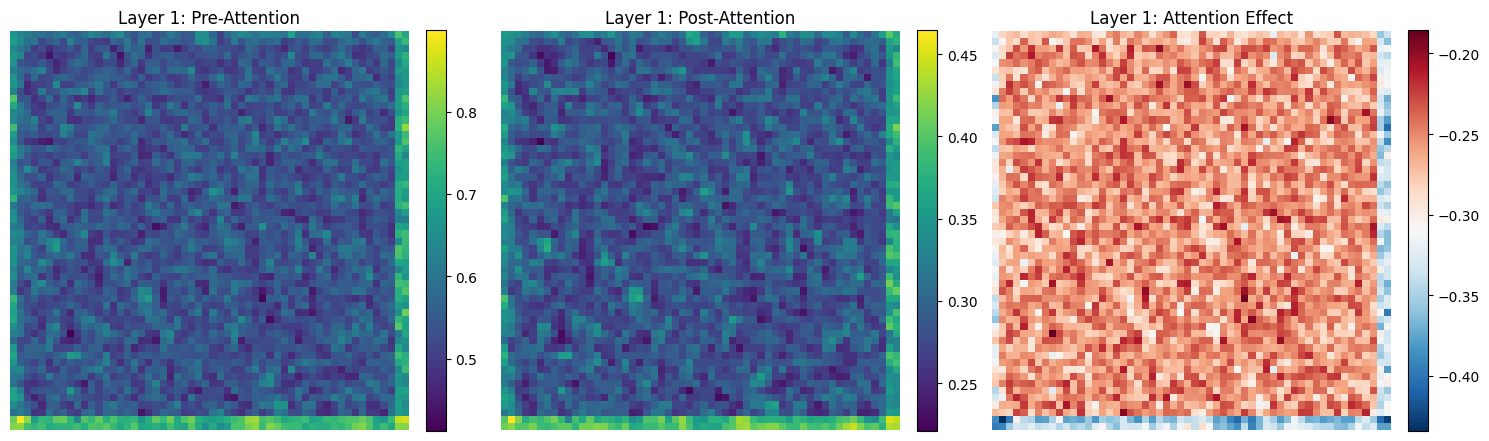

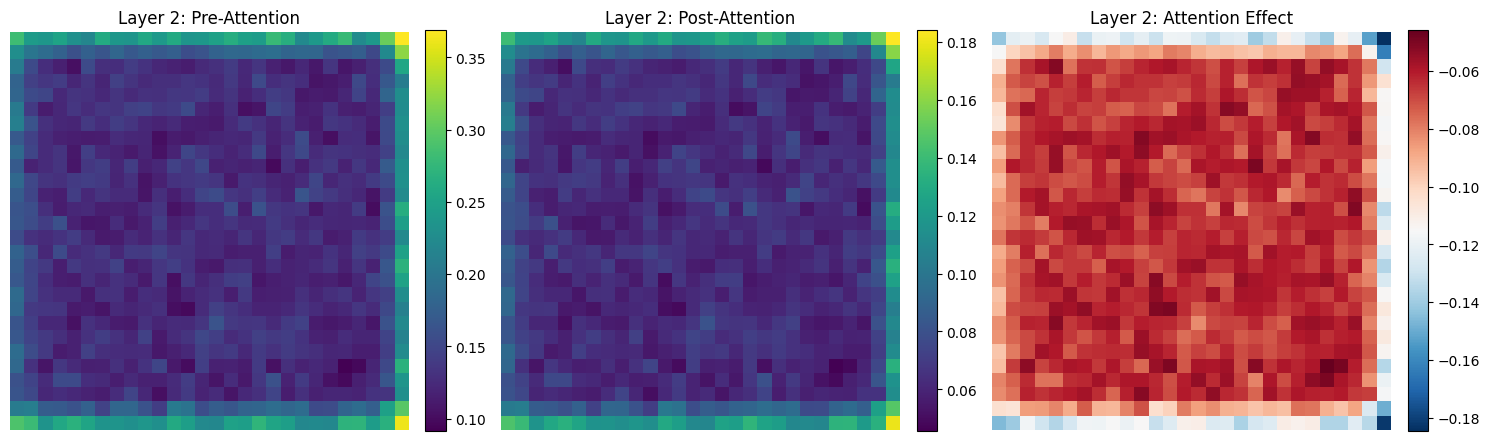

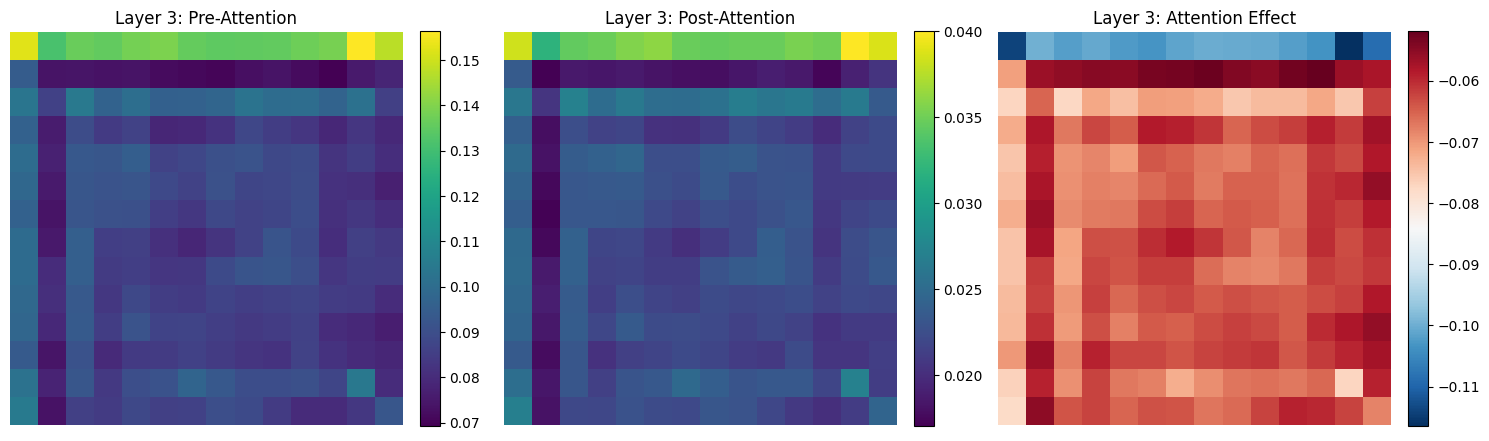

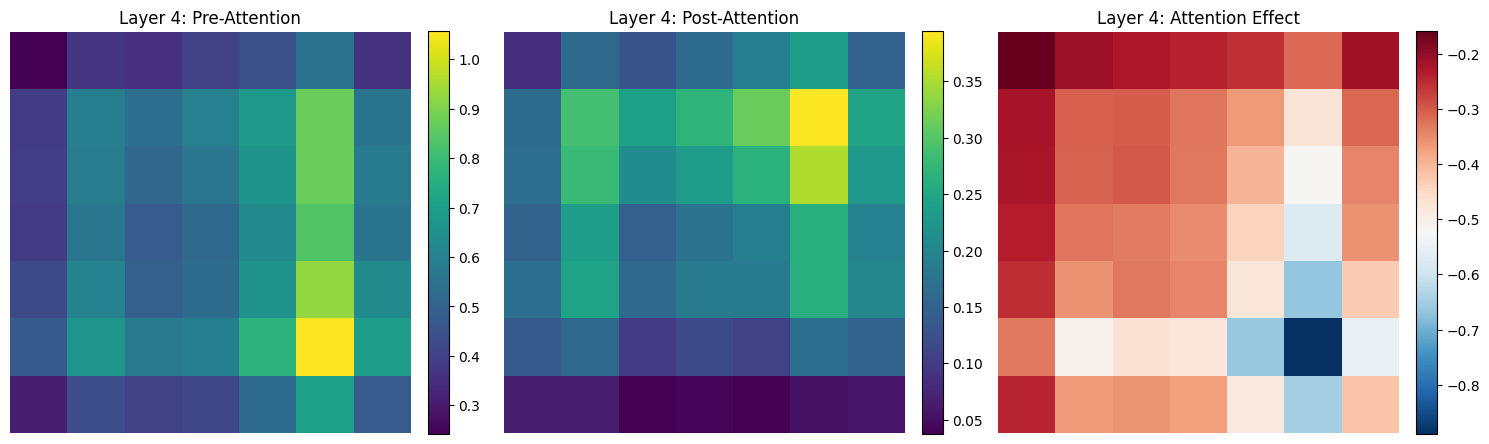

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np


class ChannelAttention(nn.Module):
    """Channel attention mechanism for feature refinement"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.shared_mlp = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.shared_mlp(self.avg_pool(x))
        max_out = self.shared_mlp(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)


class SpatialAttention(nn.Module):
    """Spatial attention mechanism for focusing on important regions"""
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.conv(out)
        return self.sigmoid(out)


class SparseAttention(nn.Module):
    """Sparse Attention module that combines channel and spatial attention"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.channel_attention = ChannelAttention(channels, reduction)

    def forward(self, x):
        attention = self.channel_attention(x)
        x = x * attention
        return x


class LocalFeatureAttention(nn.Module):
    """Local Feature Attention module for fine-grained feature refinement"""
    def __init__(self, channels):
        super().__init__()
        self.channel_attention = ChannelAttention(channels)
        self.spatial_attention = SpatialAttention()

    def forward(self, x):
        # Apply channel attention first
        x = x * self.channel_attention(x)
        # Then apply spatial attention
        x = x * self.spatial_attention(x)
        return x


class DSAN(nn.Module):
    """
    Dual Stream Attention Network for Facial Emotion Recognition

    Architecture:
    - GFE-AN: Global Feature Extraction with Attention Network
    - MFF-AN: Multi-scale Feature Fusion with Attention Network
    - Classification layer
    """
    def __init__(self, num_classes=7, pretrained=True):
        super().__init__()

        # Use ResNet18 as backbone for feature extraction
        resnet = models.resnet18(pretrained=pretrained)

        # GFE-AN Stream (Global Feature Extraction with Attention Network)
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool

        self.layer1 = resnet.layer1
        self.gfe_attention1 = SparseAttention(64)

        self.layer2 = resnet.layer2
        self.gfe_attention2 = SparseAttention(128)

        # MFF-AN Stream (Multi-scale Feature Fusion with Attention Network)
        self.layer3 = resnet.layer3
        self.mff_attention1 = LocalFeatureAttention(256)

        self.layer4 = resnet.layer4
        self.mff_attention2 = LocalFeatureAttention(512)

        # Global pooling and classification
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512, num_classes)

        # Store attention maps for visualization
        self.attention_maps = []

    def forward(self, x):
        # Reset attention maps storage
        self.attention_maps = []

        # GFE-AN Stream
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        # Store pre-attention feature map for visualization
        pre_attn1 = x.detach().clone()
        x = self.gfe_attention1(x)
        # Store attention effect for visualization
        self.attention_maps.append((pre_attn1, x.detach().clone()))

        x = self.layer2(x)
        pre_attn2 = x.detach().clone()
        x = self.gfe_attention2(x)
        self.attention_maps.append((pre_attn2, x.detach().clone()))

        # MFF-AN Stream
        x = self.layer3(x)
        pre_attn3 = x.detach().clone()
        x = self.mff_attention1(x)
        self.attention_maps.append((pre_attn3, x.detach().clone()))

        x = self.layer4(x)
        pre_attn4 = x.detach().clone()
        x = self.mff_attention2(x)
        self.attention_maps.append((pre_attn4, x.detach().clone()))

        # Classification
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def visualize_attention(self, input_img):
        """
        Generate attention visualizations for a given input image

        Args:
            input_img: Input tensor of shape [1, 3, H, W]

        Returns:
            List of attention visualization figures
        """
        # Ensure model is in eval mode
        self.eval()

        with torch.no_grad():
            # Forward pass to populate attention maps
            _ = self.forward(input_img)

            visualizations = []

            for i, (pre_attn, post_attn) in enumerate(self.attention_maps):
                # Convert tensors to numpy for visualization
                pre_feature = pre_attn[0].cpu().numpy()  # Take first image in batch
                post_feature = post_attn[0].cpu().numpy()

                # Average across channels to get attention heatmap
                pre_feature_map = np.mean(pre_feature, axis=0)
                post_feature_map = np.mean(post_feature, axis=0)

                # Create difference map to highlight attention effect
                diff_map = post_feature_map - pre_feature_map

                # Create figure
                fig, axes = plt.subplots(1, 3, figsize=(15, 5))

                # Plot pre-attention feature map
                im1 = axes[0].imshow(pre_feature_map, cmap='viridis')
                axes[0].set_title(f'Layer {i+1}: Pre-Attention')
                axes[0].axis('off')
                plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

                # Plot post-attention feature map
                im2 = axes[1].imshow(post_feature_map, cmap='viridis')
                axes[1].set_title(f'Layer {i+1}: Post-Attention')
                axes[1].axis('off')
                plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

                # Plot difference map
                im3 = axes[2].imshow(diff_map, cmap='RdBu_r')
                axes[2].set_title(f'Layer {i+1}: Attention Effect')
                axes[2].axis('off')
                plt.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

                plt.tight_layout()
                visualizations.append(fig)

            return visualizations


def count_parameters(model):
    """Count trainable parameters in the model"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# Usage example
if __name__ == "__main__":
    # Create model
    model = DSAN(num_classes=7)
    print(f"Model created with {count_parameters(model):,} trainable parameters")

    # Test forward pass
    dummy_input = torch.randn(1, 3, 224, 224)
    output = model(dummy_input)
    print(f"Output shape: {output.shape}")

    # Test attention visualization
    visualizations = model.visualize_attention(dummy_input)
    print(f"Generated {len(visualizations)} attention visualizations")

In [10]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import albumentations as A
import torchvision.models as models
from PIL import Image
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader
import multiprocessing
import pickle
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime

# --------------------------
# 1. Environment Setup
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = torch.cuda.amp.GradScaler()
print(f"Using device: {device}")

# --------------------------
# 2. Face Preprocessing Utility
# --------------------------
def preprocess_dataset_faces(dataset_name, root_dir, output_dir, phase='train', batch_size=32):
    """
    Preprocess dataset by detecting faces and saving them to disk
    This should be run once before training to speed up data loading

    Args:
        dataset_name (str): Name of dataset (ferplus, fer2013, raf-db)
        root_dir (str): Root directory of datasets
        output_dir (str): Directory to save processed faces
        phase (str): train, test, or val
        batch_size (int): Batch size for processing
    """
    # Map standard dataset names to directory names
    dataset_dir_map = {
        'raf-db': 'rafdb',
        'ferplus': 'ferplus',
        'fer2013': 'fer2013'
    }

    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Initialize MTCNN for face detection
    mtcnn = MTCNN(
        keep_all=False,  # Only keep the largest face
        device=device,
        select_largest=True,  # Select largest face
        post_process=False,  # Don't normalize
        image_size=224  # Output size
    )

    # Get actual dataset directory
    actual_dir = dataset_dir_map.get(dataset_name, dataset_name)
    base_path = os.path.join(root_dir, actual_dir)

    # Get image paths and labels
    image_paths = []
    labels = []

    # Special case for RAF-DB
    if dataset_name.lower() == 'raf-db':
        images_dir = os.path.join(base_path, 'DATASET', phase)
        label_file = os.path.join(base_path, f'EmoLabel/list_{phase}.txt')

        if not os.path.exists(label_file):
            print(f"RAF-DB label file not found at {label_file}")
            return

        # Load labels
        try:
            labels_df = pd.read_csv(label_file, sep=' ', header=None, names=['image', 'label'])
            # RAF-DB uses 1-7 for labels, convert to 0-6
            labels_df['label'] = labels_df['label'] - 1

            for idx, row in labels_df.iterrows():
                img_path = os.path.join(images_dir, row['image'])
                if os.path.exists(img_path):
                    image_paths.append(img_path)
                    labels.append(int(row['label']))
                else:
                    print(f"Warning: Image {img_path} not found")
        except Exception as e:
            print(f"Error loading RAF-DB: {str(e)}")
            return
    else:
        # Standard emotion folder structure
        phase_path = os.path.join(base_path, phase)
        if not os.path.exists(phase_path):
            print(f"Phase path {phase_path} does not exist!")
            return

        # Emotion mapping
        emotion_map = {
            'neutral': 0,
            'happiness': 1, 'happy': 1,
            'sadness': 2, 'sad': 2,
            'surprise': 3, 'surprised': 3, 'suprise': 3,
            'fear': 4, 'fearful': 4,
            'disgust': 5, 'disgusted': 5,
            'anger': 6, 'angry': 6,
            'contempt': 7
        }

        # Loop through emotion folders
        for emotion_dir in os.listdir(phase_path):
            full_path = os.path.join(phase_path, emotion_dir)
            if not os.path.isdir(full_path):
                continue

            emotion = emotion_map.get(emotion_dir.lower())
            if emotion is None:
                print(f"Warning: Unknown emotion folder '{emotion_dir}' in {phase_path}")
                continue

            for img_file in os.listdir(full_path):
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_paths.append(os.path.join(full_path, img_file))
                    labels.append(emotion)

    print(f"Found {len(image_paths)} images in {dataset_name}")

    # Create metadata file
    metadata = {
        'dataset': dataset_name,
        'phase': phase,
        'image_paths': image_paths,
        'labels': labels,
        'processed_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }

    # Save metadata
    metadata_file = os.path.join(output_dir, f"{dataset_name}_{phase}_metadata.pkl")
    with open(metadata_file, 'wb') as f:
        pickle.dump(metadata, f)

    # Process images in batches
    num_batches = len(image_paths) // batch_size + (1 if len(image_paths) % batch_size > 0 else 0)

    processed_count = 0
    skipped_count = 0

    for batch_idx in tqdm(range(num_batches), desc=f"Processing {dataset_name}"):
        start_idx = batch_idx * batch_size
        end_idx = min(start_idx + batch_size, len(image_paths))

        batch_paths = image_paths[start_idx:end_idx]
        batch_labels = labels[start_idx:end_idx]

        # Load images
        batch_images = []
        valid_indices = []

        for i, img_path in enumerate(batch_paths):
            try:
                img = Image.open(img_path).convert('RGB')
                batch_images.append(img)
                valid_indices.append(i)
            except Exception as e:
                print(f"Error loading {img_path}: {str(e)}")
                skipped_count += 1

        if not batch_images:
            continue

        # Detect faces
        try:
            batch_faces = mtcnn(batch_images)

            # Save detected faces
            for i, (face, idx) in enumerate(zip(batch_faces, valid_indices)):
                if face is None:
                    skipped_count += 1
                    continue

                # Convert to numpy array and save
                face_np = face.permute(1, 2, 0).cpu().numpy()
                face_np = (face_np * 255).astype(np.uint8)

                # Create output filename
                img_id = f"{dataset_name}_{phase}_{start_idx + idx}"
                output_file = os.path.join(output_dir, f"{img_id}.npy")

                # Save face and label
                np.save(output_file, {
                    'face': face_np,
                    'label': batch_labels[idx],
                    'original_path': batch_paths[idx]
                })

                processed_count += 1

        except Exception as e:
            print(f"Error in batch {batch_idx}: {str(e)}")
            skipped_count += len(batch_images)

    print(f"Preprocessing complete for {dataset_name}:")
    print(f"  - Processed: {processed_count} images")
    print(f"  - Skipped: {skipped_count} images")
    print(f"  - Total: {len(image_paths)} images")
    print(f"  - Success rate: {processed_count / len(image_paths) * 100:.2f}%")

# --------------------------
# 3. Optimized Dataset Class
# --------------------------
class FastDSANDataset(Dataset):
    """
    Optimized dataset class that loads preprocessed face images
    """
    def __init__(self, dataset_name, root_dir, processed_dir, phase='train', max_samples=None,
                 use_cache=True, cache_size=1000):
        self.dataset_name = dataset_name.lower()
        self.phase = phase
        self.use_cache = use_cache
        self.cache_size = cache_size
        self.max_samples = max_samples

        # Create augmentation transform with correct parameters
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            # Use newer CoarseDropout with correct parameters
            A.OneOf([
                A.CoarseDropout(
                    max_holes=8,
                    max_height=16,
                    max_width=16,
                    min_holes=1,
                    min_height=8,
                    min_width=8,
                    fill_value=0,
                    p=0.5
                ),
                A.GridDropout(
                    ratio=0.1,
                    p=0.5
                )
            ], p=0.3),
            A.Rotate(limit=30, border_mode=0, p=0.4),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        # Load dataset metadata
        metadata_file = os.path.join(processed_dir, f"{dataset_name}_{phase}_metadata.pkl")

        if not os.path.exists(metadata_file):
            # If metadata doesn't exist, create it by preprocessing
            print(f"Metadata not found for {dataset_name}. Running preprocessing...")
            preprocess_dataset_faces(dataset_name, root_dir, processed_dir, phase)

            # Check again
            if not os.path.exists(metadata_file):
                raise ValueError(f"Failed to create metadata for {dataset_name}")

        # Load metadata
        with open(metadata_file, 'rb') as f:
            metadata = pickle.load(f)

        self.image_paths = metadata['image_paths']
        self.labels = metadata['labels']
        self.processed_dir = processed_dir

        # Limit dataset size if requested
        if max_samples and len(self.image_paths) > max_samples:
            self.image_paths = self.image_paths[:max_samples]
            self.labels = self.labels[:max_samples]
            print(f"Limited {dataset_name} to {max_samples} samples")

        # Initialize cache
        self.cache = {}

        print(f"Loaded {dataset_name} with {len(self.image_paths)} samples")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Check cache first
        if self.use_cache and idx in self.cache:
            return self.cache[idx]

        try:
            # Create face image ID
            img_id = f"{self.dataset_name}_{self.phase}_{idx}"
            face_file = os.path.join(self.processed_dir, f"{img_id}.npy")

            # If preprocessed face exists, load it
            if os.path.exists(face_file):
                data = np.load(face_file, allow_pickle=True).item()
                face = data['face']
                label = data['label']
            else:
                # Fallback to original image and process on-the-fly
                img_path = self.image_paths[idx]
                img = Image.open(img_path).convert('RGB')

                # Use MTCNN to detect face
                mtcnn = MTCNN(keep_all=False, device='cpu')
                face = mtcnn(img)

                if face is None:
                    raise RuntimeError("No face detected")

                # Convert to numpy
                face = face.permute(1, 2, 0).cpu().numpy()
                face = (face * 255).astype(np.uint8)
                label = self.labels[idx]

            # Apply augmentations
            augmented = self.transform(image=face)['image']

            # Convert to tensor
            img_tensor = torch.from_numpy(augmented).permute(2, 0, 1).float()
            label_tensor = torch.tensor(label, dtype=torch.long)

            # Store in cache if using cache
            if self.use_cache:
                self.cache[idx] = (img_tensor, label_tensor)

                # Limit cache size
                if len(self.cache) > self.cache_size:
                    # Remove random item (simple LRU implementation)
                    remove_idx = list(self.cache.keys())[0]
                    del self.cache[remove_idx]

            return img_tensor, label_tensor

        except Exception as e:
            print(f"Error processing idx {idx}, path: {self.image_paths[idx] if idx < len(self.image_paths) else 'unknown'}: {str(e)}")
            # Return dummy tensors with error flag (-1)
            return torch.zeros((3, 224, 224)), torch.tensor(-1)

# --------------------------
# 4. Model Architecture
# --------------------------
class ChannelAttention(nn.Module):
    """Channel attention mechanism for feature refinement"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.shared_mlp = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.shared_mlp(self.avg_pool(x))
        max_out = self.shared_mlp(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)


class SpatialAttention(nn.Module):
    """Spatial attention mechanism for focusing on important regions"""
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.conv(out)
        return self.sigmoid(out)


class SparseAttention(nn.Module):
    """Sparse Attention module that combines channel and spatial attention"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.channel_attention = ChannelAttention(channels, reduction)

    def forward(self, x):
        attention = self.channel_attention(x)
        x = x * attention
        return x


class LocalFeatureAttention(nn.Module):
    """Local Feature Attention module for fine-grained feature refinement"""
    def __init__(self, channels):
        super().__init__()
        self.channel_attention = ChannelAttention(channels)
        self.spatial_attention = SpatialAttention()

    def forward(self, x):
        # Apply channel attention first
        x = x * self.channel_attention(x)
        # Then apply spatial attention
        x = x * self.spatial_attention(x)
        return x


class DSAN(nn.Module):
    """
    Dual Stream Attention Network for Facial Emotion Recognition

    Architecture:
    - GFE-AN: Global Feature Extraction with Attention Network
    - MFF-AN: Multi-scale Feature Fusion with Attention Network
    - Classification layer
    """
    def __init__(self, num_classes=7, pretrained=True):
        super().__init__()

        # Use ResNet18 as backbone for feature extraction
        resnet = models.resnet18(pretrained=pretrained)

        # GFE-AN Stream (Global Feature Extraction with Attention Network)
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool

        self.layer1 = resnet.layer1
        self.gfe_attention1 = SparseAttention(64)

        self.layer2 = resnet.layer2
        self.gfe_attention2 = SparseAttention(128)

        # MFF-AN Stream (Multi-scale Feature Fusion with Attention Network)
        self.layer3 = resnet.layer3
        self.mff_attention1 = LocalFeatureAttention(256)

        self.layer4 = resnet.layer4
        self.mff_attention2 = LocalFeatureAttention(512)

        # Global pooling and classification
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512, num_classes)

        # Store attention maps for visualization
        self.attention_maps = []

    def forward(self, x):
        # Reset attention maps storage
        self.attention_maps = []

        # GFE-AN Stream
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        # Store pre-attention feature map for visualization
        pre_attn1 = x.detach().clone() if self.training else x
        x = self.gfe_attention1(x)
        # Store attention effect for visualization
        if self.training:
            self.attention_maps.append((pre_attn1, x.detach().clone()))

        x = self.layer2(x)
        pre_attn2 = x.detach().clone() if self.training else x
        x = self.gfe_attention2(x)
        if self.training:
            self.attention_maps.append((pre_attn2, x.detach().clone()))

        # MFF-AN Stream
        x = self.layer3(x)
        pre_attn3 = x.detach().clone() if self.training else x
        x = self.mff_attention1(x)
        if self.training:
            self.attention_maps.append((pre_attn3, x.detach().clone()))

        x = self.layer4(x)
        pre_attn4 = x.detach().clone() if self.training else x
        x = self.mff_attention2(x)
        if self.training:
            self.attention_maps.append((pre_attn4, x.detach().clone()))

        # Classification
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def visualize_attention(self, input_img):
        """Generate attention visualizations for a given input image"""
        # Ensure model is in eval mode
        was_training = self.training
        self.eval()

        with torch.no_grad():
            # Forward pass to populate attention maps
            _ = self.forward(input_img)

            visualizations = []

            for i, (pre_attn, post_attn) in enumerate(self.attention_maps):
                # Convert tensors to numpy for visualization
                pre_feature = pre_attn[0].cpu().numpy()  # Take first image in batch
                post_feature = post_attn[0].cpu().numpy()

                # Average across channels to get attention heatmap
                pre_feature_map = np.mean(pre_feature, axis=0)
                post_feature_map = np.mean(post_feature, axis=0)

                # Create difference map to highlight attention effect
                diff_map = post_feature_map - pre_feature_map

                # Create figure
                fig, axes = plt.subplots(1, 3, figsize=(15, 5))

                # Plot pre-attention feature map
                im1 = axes[0].imshow(pre_feature_map, cmap='viridis')
                axes[0].set_title(f'Layer {i+1}: Pre-Attention')
                axes[0].axis('off')
                plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

                # Plot post-attention feature map
                im2 = axes[1].imshow(post_feature_map, cmap='viridis')
                axes[1].set_title(f'Layer {i+1}: Post-Attention')
                axes[1].axis('off')
                plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

                # Plot difference map
                im3 = axes[2].imshow(diff_map, cmap='RdBu_r')
                axes[2].set_title(f'Layer {i+1}: Attention Effect')
                axes[2].axis('off')
                plt.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

                plt.tight_layout()
                visualizations.append(fig)

            # Restore training state
            if was_training:
                self.train()

            return visualizations

# --------------------------
# 5. Training Utilities
# --------------------------
def train_epoch(model, train_loader, criterion, optimizer, scaler, epoch, device):
    """Train model for one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch}")

    for batch_idx, (inputs, targets) in enumerate(progress_bar):
        # Filter out invalid samples
        valid_mask = targets != -1
        if not valid_mask.any():
            continue

        inputs = inputs[valid_mask].to(device)
        targets = targets[valid_mask].to(device)

        optimizer.zero_grad()

        # Use mixed precision for faster training
        with torch.cuda.amp.autocast():
            outputs = model(inputs)
            loss = criterion(outputs, targets)

        # Scale gradients and optimize
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # Update statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        # Update progress bar
        progress_bar.set_postfix({
            'loss': running_loss / (batch_idx + 1),
            'acc': 100. * correct / total if total > 0 else 0
        })

    return running_loss / len(train_loader), 100. * correct / total

def validate(model, val_loader, criterion, device):
    """Validate model on validation set"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(val_loader):
            # Filter out invalid samples
            valid_mask = targets != -1
            if not valid_mask.any():
                continue

            inputs = inputs[valid_mask].to(device)
            targets = targets[valid_mask].to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    return running_loss / len(val_loader), 100. * correct / total

# --------------------------
# 6. Main Training Script
# --------------------------
def main():
    # Configuration
    batch_size = 64
    max_samples = 10000  # Limit samples for faster experimentation
    num_epochs = 10
    learning_rate = 0.001
    weight_decay = 1e-4

    # Directories
    data_dir = "data"
    processed_dir = "data_processed"
    os.makedirs(processed_dir, exist_ok=True)

    # Create datasets
    print("\nInitializing datasets:")
    datasets_train = []
    datasets_val = []

    # Try to load each dataset, but don't fail if one is missing
    try:
        datasets_train.append(FastDSANDataset("ferplus", data_dir, processed_dir,
                                         phase='train', max_samples=max_samples))
        datasets_val.append(FastDSANDataset("ferplus", data_dir, processed_dir,
                                       phase='validation', max_samples=max_samples//5))
        print("Successfully loaded FERPlus")
    except Exception as e:
        print(f"Error loading FERPlus: {str(e)}")

    try:
        datasets_train.append(FastDSANDataset("fer2013", data_dir, processed_dir,
                                         phase='train', max_samples=max_samples))
        datasets_val.append(FastDSANDataset("fer2013", data_dir, processed_dir,
                                       phase='test', max_samples=max_samples//5))  # FER2013 uses 'test' instead of 'validation'
        print("Successfully loaded FER2013")
    except Exception as e:
        print(f"Error loading FER2013: {str(e)}")

    try:
        datasets_train.append(FastDSANDataset("raf-db", data_dir, processed_dir,
                                         phase='train', max_samples=max_samples))
        datasets_val.append(FastDSANDataset("raf-db", data_dir, processed_dir,
                                       phase='test', max_samples=max_samples//5))  # RAF-DB uses 'test' instead of 'validation'
        print("Successfully loaded RAF-DB")
    except Exception as e:
        print(f"Error loading RAF-DB: {str(e)}")

    if not datasets_train:
        raise ValueError("No datasets could be loaded successfully")

    # Create data loaders
    train_dataset = torch.utils.data.ConcatDataset(datasets_train)
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=2,  # Increase for better performance if your system allows
        pin_memory=True,
        drop_last=False
    )

    if datasets_val:
        val_dataset = torch.utils.data.ConcatDataset(datasets_val)
        val_loader = DataLoader(
            val_dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers=2,
            pin_memory=True,
            drop_last=False
        )
    else:
        val_loader = None

    print(f"Training dataset size: {len(train_dataset)}")
    if val_loader:
        print(f"Validation dataset size: {len(val_dataset)}")

    # Create model
    print("\nInitializing DSAN model:")
    model = DSAN(num_classes=8).to(device)  # 8 classes including contempt
    print(f"Model parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

    # Train model
    print("\nStarting training:")
    best_acc = 0.0
    start_time = datetime.now()

    # Test batch loading time
    print("Testing batch loading time...")
    test_start = datetime.now()
    for i, (inputs, targets) in enumerate(train_loader):
        if i == 0:
            print(f"First batch shape: {inputs.shape}")
            print(f"Valid samples: {sum(targets != -1).item()}/{len(targets)}")
            print(f"Time to load first batch: {datetime.now() - test_start}")
        if i >= 2:
            break

    # Training loop
    try:
        for epoch in range(1, num_epochs + 1):
            epoch_start = datetime.now()

            train_loss, train_acc = train_epoch(
                model, train_loader, criterion, optimizer, scaler, epoch, device
            )

            epoch_time = datetime.now() - epoch_start
            print(f"Epoch {epoch} completed in {epoch_time}. Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")

            if val_loader:
                val_loss, val_acc = validate(model, val_loader, criterion, device)
                print(f"Validation - Loss: {val_loss:.4f}, Acc: {val_acc:.2f}%")

                # Update learning rate
                scheduler.step(val_loss)

                # Save best model
                if val_acc > best_acc:
                    best_acc = val_acc
                    torch.save(model.state_dict(), "dsan_best.pth")
                    print(f"Saved best model with accuracy: {best_acc:.2f}%")
            else:
                # Save based on training accuracy if no validation set
                if train_acc > best_acc:
                    best_acc = train_acc
                    torch.save(model.state_dict(), "dsan_best.pth")
                    print(f"Saved best model with training accuracy: {best_acc:.2f}%")

            # Save checkpoint every epoch
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'train_loss': train_loss,
                'train_acc': train_acc,
                'best_acc': best_acc
            }, "dsan_checkpoint.pth")

    except KeyboardInterrupt:
        print("Training interrupted by user. Saving current model...")
        torch.save(model.state_dict(), "dsan_interrupted.pth")


    # Calculate total training time
    total_time = datetime.now() - start_time
    print(f"\nTraining completed in {total_time}")
    print(f"Best accuracy: {best_acc:.2f}%")

    # Test model with a sample image (visualization demo)
    if val_loader is not None:
        print("\nGenerating attention visualization example...")
        try:
            # Get a batch from validation set
            sample_batch, sample_targets = next(iter(val_loader))

            # Find a valid sample (not error flag)
            valid_idx = torch.where(sample_targets != -1)[0]
            if len(valid_idx) > 0:
                sample_idx = valid_idx[0].item()
                sample_img = sample_batch[sample_idx:sample_idx+1].to(device)
                sample_label = sample_targets[sample_idx].item()

                # Generate attention visualizations
                attention_figs = model.visualize_attention(sample_img)

                # Save visualizations
                for i, fig in enumerate(attention_figs):
                    fig.savefig(f"attention_layer_{i+1}.png")
                    plt.close(fig)

                print(f"Attention visualizations saved for sample with emotion label: {sample_label}")
            else:
                print("No valid samples found for visualization")

        except Exception as e:
            print(f"Error generating visualization: {str(e)}")

    print("\nTraining summary:")
    print(f"- Total epochs: {epoch}")
    print(f"- Best accuracy: {best_acc:.2f}%")
    print(f"- Total training time: {total_time}")
    print(f"- Model saved to: dsan_best.pth")

    # Load best model for final evaluation
    try:
        best_model = DSAN(num_classes=8).to(device)
        best_model.load_state_dict(torch.load("dsan_best.pth"))

        if val_loader:
            print("\nEvaluating best model on validation set:")
            val_loss, val_acc = validate(best_model, val_loader, criterion, device)
            print(f"Final validation - Loss: {val_loss:.4f}, Acc: {val_acc:.2f}%")

            # Generate confusion matrix
            print("\nGenerating confusion matrix...")
            best_model.eval()
            all_preds = []
            all_targets = []

            with torch.no_grad():
                for inputs, targets in val_loader:
                    # Filter out invalid samples
                    valid_mask = targets != -1
                    if not valid_mask.any():
                        continue

                    inputs = inputs[valid_mask].to(device)
                    targets = targets[valid_mask].cpu().numpy()

                    outputs = best_model(inputs)
                    _, preds = outputs.max(1)

                    all_preds.extend(preds.cpu().numpy())
                    all_targets.extend(targets)

            if all_preds and all_targets:
                # Get class names for the confusion matrix
                emotion_classes = ['neutral', 'happiness', 'sadness', 'surprise',
                                 'fear', 'disgust', 'anger', 'contempt']

                # Plot confusion matrix
                try:
                    from sklearn.metrics import confusion_matrix, classification_report
                    import seaborn as sns

                    cm = confusion_matrix(all_targets, all_preds)
                    plt.figure(figsize=(10, 8))
                    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                              xticklabels=emotion_classes, yticklabels=emotion_classes)
                    plt.xlabel('Predicted')
                    plt.ylabel('True')
                    plt.title('Confusion Matrix')
                    plt.savefig('confusion_matrix.png')
                    plt.close()

                    # Print classification report
                    print("\nClassification Report:")
                    print(classification_report(all_targets, all_preds,
                                              target_names=emotion_classes))
                except Exception as e:
                    print(f"Error generating confusion matrix: {str(e)}")
            else:
                print("Not enough valid samples to generate confusion matrix")
    except Exception as e:
        print(f"Error evaluating best model: {str(e)}")

    print("\nDSAN training and evaluation complete!")


if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        import traceback
        traceback.print_exc()

<ipython-input-10-a2feb8381064>:229: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


Using device: cuda

Initializing datasets:
Metadata not found for ferplus. Running preprocessing...
Found 66379 images in ferplus


Processing ferplus:   0%|          | 0/2075 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/facenet_pytorch/models/mtcnn.py:444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selected_boxes = np.array(selected_boxes)
/usr/local/lib/python3.11/dist-packages/facenet_pytorch/models/mtcnn.py:446: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selected_points = np.array(selected_points)
Processing ferplus:   3%|▎         | 70/2075 [00:12<06:00,  5.56it/s]


KeyboardInterrupt: 

In [ ]:
!find data/ -maxdepth 3 -type d

find: ‘data/’: No such file or directory


In [ ]:
ls


sample_data/


In [ ]:
cd

/root


In [ ]:
ls


In [ ]:
cd root

[Errno 2] No such file or directory: 'root'
/root


In [ ]:
ls


In [ ]:
ls

In [ ]:
!nvidia-smi  # Verify GPU allocation
!python --version  # Python 3.10+

/bin/bash: line 1: nvidia-smi: command not found
Python 3.11.12


In [11]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import albumentations as A
import torchvision.models as models
from PIL import Image
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader
import multiprocessing
import pickle
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime

# --------------------------
# 1. Environment Setup
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = torch.cuda.amp.GradScaler()
print(f"Using device: {device}")

# --------------------------
# 2. Face Preprocessing Utility
# --------------------------
def preprocess_dataset_faces(dataset_name, root_dir, output_dir, phase='train', batch_size=32):
    """
    Preprocess dataset by detecting faces and saving them to disk
    This should be run once before training to speed up data loading

    Args:
        dataset_name (str): Name of dataset (ferplus, fer2013, raf-db)
        root_dir (str): Root directory of datasets
        output_dir (str): Directory to save processed faces
        phase (str): train, test, or val
        batch_size (int): Batch size for processing
    """
    # Map standard dataset names to directory names
    dataset_dir_map = {
        'raf-db': 'rafdb',
        'ferplus': 'ferplus',
        'fer2013': 'fer2013'
    }

    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Initialize MTCNN for face detection
    mtcnn = MTCNN(
        keep_all=False,  # Only keep the largest face
        device=device,
        select_largest=True,  # Select largest face
        post_process=False,  # Don't normalize
        image_size=224  # Output size
    )

    # Get actual dataset directory
    actual_dir = dataset_dir_map.get(dataset_name, dataset_name)
    base_path = os.path.join(root_dir, actual_dir)

    # Get image paths and labels
    image_paths = []
    labels = []

    # Special case for RAF-DB
    if dataset_name.lower() == 'raf-db':
        images_dir = os.path.join(base_path, 'DATASET', phase)
        label_file = os.path.join(base_path, f'EmoLabel/list_{phase}.txt')

        if not os.path.exists(label_file):
            print(f"RAF-DB label file not found at {label_file}")
            return

        # Load labels
        try:
            labels_df = pd.read_csv(label_file, sep=' ', header=None, names=['image', 'label'])
            # RAF-DB uses 1-7 for labels, convert to 0-6
            labels_df['label'] = labels_df['label'] - 1

            for idx, row in labels_df.iterrows():
                img_path = os.path.join(images_dir, row['image'])
                if os.path.exists(img_path):
                    image_paths.append(img_path)
                    labels.append(int(row['label']))
                else:
                    print(f"Warning: Image {img_path} not found")
        except Exception as e:
            print(f"Error loading RAF-DB: {str(e)}")
            return
    else:
        # Standard emotion folder structure
        phase_path = os.path.join(base_path, phase)
        if not os.path.exists(phase_path):
            print(f"Phase path {phase_path} does not exist!")
            return

        # Emotion mapping
        emotion_map = {
            'neutral': 0,
            'happiness': 1, 'happy': 1,
            'sadness': 2, 'sad': 2,
            'surprise': 3, 'surprised': 3, 'suprise': 3,
            'fear': 4, 'fearful': 4,
            'disgust': 5, 'disgusted': 5,
            'anger': 6, 'angry': 6,
            'contempt': 7
        }

        # Loop through emotion folders
        for emotion_dir in os.listdir(phase_path):
            full_path = os.path.join(phase_path, emotion_dir)
            if not os.path.isdir(full_path):
                continue

            emotion = emotion_map.get(emotion_dir.lower())
            if emotion is None:
                print(f"Warning: Unknown emotion folder '{emotion_dir}' in {phase_path}")
                continue

            for img_file in os.listdir(full_path):
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_paths.append(os.path.join(full_path, img_file))
                    labels.append(emotion)

    print(f"Found {len(image_paths)} images in {dataset_name}")

    # Create metadata file
    metadata = {
        'dataset': dataset_name,
        'phase': phase,
        'image_paths': image_paths,
        'labels': labels,
        'processed_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }

    # Save metadata
    metadata_file = os.path.join(output_dir, f"{dataset_name}_{phase}_metadata.pkl")
    with open(metadata_file, 'wb') as f:
        pickle.dump(metadata, f)

    # Process images in batches
    num_batches = len(image_paths) // batch_size + (1 if len(image_paths) % batch_size > 0 else 0)

    processed_count = 0
    skipped_count = 0

    for batch_idx in tqdm(range(num_batches), desc=f"Processing {dataset_name}"):
        start_idx = batch_idx * batch_size
        end_idx = min(start_idx + batch_size, len(image_paths))

        batch_paths = image_paths[start_idx:end_idx]
        batch_labels = labels[start_idx:end_idx]

        # Load images
        batch_images = []
        valid_indices = []

        for i, img_path in enumerate(batch_paths):
            try:
                img = Image.open(img_path).convert('RGB')
                batch_images.append(img)
                valid_indices.append(i)
            except Exception as e:
                print(f"Error loading {img_path}: {str(e)}")
                skipped_count += 1

        if not batch_images:
            continue

        # Detect faces
        try:
            batch_faces = mtcnn(batch_images)

            # Save detected faces
            for i, (face, idx) in enumerate(zip(batch_faces, valid_indices)):
                if face is None:
                    skipped_count += 1
                    continue

                # Convert to numpy array and save
                face_np = face.permute(1, 2, 0).cpu().numpy()
                face_np = (face_np * 255).astype(np.uint8)

                # Create output filename
                img_id = f"{dataset_name}_{phase}_{start_idx + idx}"
                output_file = os.path.join(output_dir, f"{img_id}.npy")

                # Save face and label
                np.save(output_file, {
                    'face': face_np,
                    'label': batch_labels[idx],
                    'original_path': batch_paths[idx]
                })

                processed_count += 1

        except Exception as e:
            print(f"Error in batch {batch_idx}: {str(e)}")
            skipped_count += len(batch_images)

    print(f"Preprocessing complete for {dataset_name}:")
    print(f"  - Processed: {processed_count} images")
    print(f"  - Skipped: {skipped_count} images")
    print(f"  - Total: {len(image_paths)} images")
    print(f"  - Success rate: {processed_count / len(image_paths) * 100:.2f}%")

# --------------------------
# 3. Optimized Dataset Class
# --------------------------
class FastDSANDataset(Dataset):
    """
    Optimized dataset class that loads preprocessed face images
    """
    def __init__(self, dataset_name, root_dir, processed_dir, phase='train', max_samples=None,
                 use_cache=True, cache_size=1000):
        self.dataset_name = dataset_name.lower()
        self.phase = phase
        self.use_cache = use_cache
        self.cache_size = cache_size
        self.max_samples = max_samples

        # Create augmentation transform with correct parameters
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            # Use newer CoarseDropout with correct parameters
            A.OneOf([
                A.CoarseDropout(
                    max_holes=8,
                    max_height=16,
                    max_width=16,
                    min_holes=1,
                    min_height=8,
                    min_width=8,
                    fill_value=0,
                    p=0.5
                ),
                A.GridDropout(
                    ratio=0.1,
                    p=0.5
                )
            ], p=0.3),
            A.Rotate(limit=30, border_mode=0, p=0.4),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        # Load dataset metadata
        metadata_file = os.path.join(processed_dir, f"{dataset_name}_{phase}_metadata.pkl")

        if not os.path.exists(metadata_file):
            # If metadata doesn't exist, create it by preprocessing
            print(f"Metadata not found for {dataset_name}. Running preprocessing...")
            preprocess_dataset_faces(dataset_name, root_dir, processed_dir, phase)

            # Check again
            if not os.path.exists(metadata_file):
                raise ValueError(f"Failed to create metadata for {dataset_name}")

        # Load metadata
        with open(metadata_file, 'rb') as f:
            metadata = pickle.load(f)

        self.image_paths = metadata['image_paths']
        self.labels = metadata['labels']
        self.processed_dir = processed_dir

        # Limit dataset size if requested
        if max_samples and len(self.image_paths) > max_samples:
            self.image_paths = self.image_paths[:max_samples]
            self.labels = self.labels[:max_samples]
            print(f"Limited {dataset_name} to {max_samples} samples")

        # Initialize cache
        self.cache = {}

        print(f"Loaded {dataset_name} with {len(self.image_paths)} samples")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Check cache first
        if self.use_cache and idx in self.cache:
            return self.cache[idx]

        try:
            # Create face image ID
            img_id = f"{self.dataset_name}_{self.phase}_{idx}"
            face_file = os.path.join(self.processed_dir, f"{img_id}.npy")

            # If preprocessed face exists, load it
            if os.path.exists(face_file):
                data = np.load(face_file, allow_pickle=True).item()
                face = data['face']
                label = data['label']
            else:
                # Fallback to original image and process on-the-fly
                img_path = self.image_paths[idx]
                img = Image.open(img_path).convert('RGB')

                # Use MTCNN to detect face
                mtcnn = MTCNN(keep_all=False, device='cpu')
                face = mtcnn(img)

                if face is None:
                    raise RuntimeError("No face detected")

                # Convert to numpy
                face = face.permute(1, 2, 0).cpu().numpy()
                face = (face * 255).astype(np.uint8)
                label = self.labels[idx]

            # Apply augmentations
            augmented = self.transform(image=face)['image']

            # Convert to tensor
            img_tensor = torch.from_numpy(augmented).permute(2, 0, 1).float()
            label_tensor = torch.tensor(label, dtype=torch.long)

            # Store in cache if using cache
            if self.use_cache:
                self.cache[idx] = (img_tensor, label_tensor)

                # Limit cache size
                if len(self.cache) > self.cache_size:
                    # Remove random item (simple LRU implementation)
                    remove_idx = list(self.cache.keys())[0]
                    del self.cache[remove_idx]

            return img_tensor, label_tensor

        except Exception as e:
            print(f"Error processing idx {idx}, path: {self.image_paths[idx] if idx < len(self.image_paths) else 'unknown'}: {str(e)}")
            # Return dummy tensors with error flag (-1)
            return torch.zeros((3, 224, 224)), torch.tensor(-1)

# --------------------------
# 4. Model Architecture
# --------------------------
class ChannelAttention(nn.Module):
    """Channel attention mechanism for feature refinement"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.shared_mlp = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.shared_mlp(self.avg_pool(x))
        max_out = self.shared_mlp(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)


class SpatialAttention(nn.Module):
    """Spatial attention mechanism for focusing on important regions"""
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.conv(out)
        return self.sigmoid(out)


class SparseAttention(nn.Module):
    """Sparse Attention module that combines channel and spatial attention"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.channel_attention = ChannelAttention(channels, reduction)

    def forward(self, x):
        attention = self.channel_attention(x)
        x = x * attention
        return x


class LocalFeatureAttention(nn.Module):
    """Local Feature Attention module for fine-grained feature refinement"""
    def __init__(self, channels):
        super().__init__()
        self.channel_attention = ChannelAttention(channels)
        self.spatial_attention = SpatialAttention()

    def forward(self, x):
        # Apply channel attention first
        x = x * self.channel_attention(x)
        # Then apply spatial attention
        x = x * self.spatial_attention(x)
        return x


class DSAN(nn.Module):
    """
    Dual Stream Attention Network for Facial Emotion Recognition

    Architecture:
    - GFE-AN: Global Feature Extraction with Attention Network
    - MFF-AN: Multi-scale Feature Fusion with Attention Network
    - Classification layer
    """
    def __init__(self, num_classes=7, pretrained=True):
        super().__init__()

        # Use ResNet18 as backbone for feature extraction
        resnet = models.resnet18(pretrained=pretrained)

        # GFE-AN Stream (Global Feature Extraction with Attention Network)
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool

        self.layer1 = resnet.layer1
        self.gfe_attention1 = SparseAttention(64)

        self.layer2 = resnet.layer2
        self.gfe_attention2 = SparseAttention(128)

        # MFF-AN Stream (Multi-scale Feature Fusion with Attention Network)
        self.layer3 = resnet.layer3
        self.mff_attention1 = LocalFeatureAttention(256)

        self.layer4 = resnet.layer4
        self.mff_attention2 = LocalFeatureAttention(512)

        # Global pooling and classification
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512, num_classes)

        # Store attention maps for visualization
        self.attention_maps = []

    def forward(self, x):
        # Reset attention maps storage
        self.attention_maps = []

        # GFE-AN Stream
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        # Store pre-attention feature map for visualization
        pre_attn1 = x.detach().clone() if self.training else x
        x = self.gfe_attention1(x)
        # Store attention effect for visualization
        if self.training:
            self.attention_maps.append((pre_attn1, x.detach().clone()))

        x = self.layer2(x)
        pre_attn2 = x.detach().clone() if self.training else x
        x = self.gfe_attention2(x)
        if self.training:
            self.attention_maps.append((pre_attn2, x.detach().clone()))

        # MFF-AN Stream
        x = self.layer3(x)
        pre_attn3 = x.detach().clone() if self.training else x
        x = self.mff_attention1(x)
        if self.training:
            self.attention_maps.append((pre_attn3, x.detach().clone()))

        x = self.layer4(x)
        pre_attn4 = x.detach().clone() if self.training else x
        x = self.mff_attention2(x)
        if self.training:
            self.attention_maps.append((pre_attn4, x.detach().clone()))

        # Classification
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def visualize_attention(self, input_img):
        """Generate attention visualizations for a given input image"""
        # Ensure model is in eval mode
        was_training = self.training
        self.eval()

        with torch.no_grad():
            # Forward pass to populate attention maps
            _ = self.forward(input_img)

            visualizations = []

            for i, (pre_attn, post_attn) in enumerate(self.attention_maps):
                # Convert tensors to numpy for visualization
                pre_feature = pre_attn[0].cpu().numpy()  # Take first image in batch
                post_feature = post_attn[0].cpu().numpy()

                # Average across channels to get attention heatmap
                pre_feature_map = np.mean(pre_feature, axis=0)
                post_feature_map = np.mean(post_feature, axis=0)

                # Create difference map to highlight attention effect
                diff_map = post_feature_map - pre_feature_map

                # Create figure
                fig, axes = plt.subplots(1, 3, figsize=(15, 5))

                # Plot pre-attention feature map
                im1 = axes[0].imshow(pre_feature_map, cmap='viridis')
                axes[0].set_title(f'Layer {i+1}: Pre-Attention')
                axes[0].axis('off')
                plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

                # Plot post-attention feature map
                im2 = axes[1].imshow(post_feature_map, cmap='viridis')
                axes[1].set_title(f'Layer {i+1}: Post-Attention')
                axes[1].axis('off')
                plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

                # Plot difference map
                im3 = axes[2].imshow(diff_map, cmap='RdBu_r')
                axes[2].set_title(f'Layer {i+1}: Attention Effect')
                axes[2].axis('off')
                plt.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

                plt.tight_layout()
                visualizations.append(fig)

            # Restore training state
            if was_training:
                self.train()

            return visualizations

# --------------------------
# 5. Training Utilities
# --------------------------
def train_epoch(model, train_loader, criterion, optimizer, scaler, epoch, device):
    """Train model for one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch}")

    for batch_idx, (inputs, targets) in enumerate(progress_bar):
        # Filter out invalid samples
        valid_mask = targets != -1
        if not valid_mask.any():
            continue

        inputs = inputs[valid_mask].to(device)
        targets = targets[valid_mask].to(device)

        optimizer.zero_grad()

        # Use mixed precision for faster training
        with torch.cuda.amp.autocast():
            outputs = model(inputs)
            loss = criterion(outputs, targets)

        # Scale gradients and optimize
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # Update statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        # Update progress bar
        progress_bar.set_postfix({
            'loss': running_loss / (batch_idx + 1),
            'acc': 100. * correct / total if total > 0 else 0
        })

    return running_loss / len(train_loader), 100. * correct / total

def validate(model, val_loader, criterion, device):
    """Validate model on validation set"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(val_loader):
            # Filter out invalid samples
            valid_mask = targets != -1
            if not valid_mask.any():
                continue

            inputs = inputs[valid_mask].to(device)
            targets = targets[valid_mask].to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    return running_loss / len(val_loader), 100. * correct / total

# --------------------------
# 6. Main Training Script
# --------------------------
def main():
    # Configuration
    batch_size = 64
    max_samples = 10000  # Limit samples for faster experimentation
    num_epochs = 10
    learning_rate = 0.001
    weight_decay = 1e-4

    # Directories
    data_dir = "data"
    processed_dir = "data_processed"
    os.makedirs(processed_dir, exist_ok=True)

    # Create datasets
    print("\nInitializing datasets:")
    datasets_train = []
    datasets_val = []

    # Try to load each dataset, but don't fail if one is missing
    try:
        datasets_train.append(FastDSANDataset("ferplus", data_dir, processed_dir,
                                         phase='train', max_samples=max_samples))
        datasets_val.append(FastDSANDataset("ferplus", data_dir, processed_dir,
                                       phase='validation', max_samples=max_samples//5))
        print("Successfully loaded FERPlus")
    except Exception as e:
        print(f"Error loading FERPlus: {str(e)}")

    try:
        datasets_train.append(FastDSANDataset("fer2013", data_dir, processed_dir,
                                         phase='train', max_samples=max_samples))
        datasets_val.append(FastDSANDataset("fer2013", data_dir, processed_dir,
                                       phase='test', max_samples=max_samples//5))  # FER2013 uses 'test' instead of 'validation'
        print("Successfully loaded FER2013")
    except Exception as e:
        print(f"Error loading FER2013: {str(e)}")

    try:
        datasets_train.append(FastDSANDataset("raf-db", data_dir, processed_dir,
                                         phase='train', max_samples=max_samples))
        datasets_val.append(FastDSANDataset("raf-db", data_dir, processed_dir,
                                       phase='test', max_samples=max_samples//5))  # RAF-DB uses 'test' instead of 'validation'
        print("Successfully loaded RAF-DB")
    except Exception as e:
        print(f"Error loading RAF-DB: {str(e)}")

    if not datasets_train:
        raise ValueError("No datasets could be loaded successfully")

    # Create data loaders
    train_dataset = torch.utils.data.ConcatDataset(datasets_train)
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=2,  # Increase for better performance if your system allows
        pin_memory=True,
        drop_last=False
    )

    if datasets_val:
        val_dataset = torch.utils.data.ConcatDataset(datasets_val)
        val_loader = DataLoader(
            val_dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers=2,
            pin_memory=True,
            drop_last=False
        )
    else:
        val_loader = None

    print(f"Training dataset size: {len(train_dataset)}")
    if val_loader:
        print(f"Validation dataset size: {len(val_dataset)}")

    # Create model
    print("\nInitializing DSAN model:")
    model = DSAN(num_classes=8).to(device)  # 8 classes including contempt
    print(f"Model parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

    # Train model
    print("\nStarting training:")
    best_acc = 0.0
    start_time = datetime.now()

    # Test batch loading time
    print("Testing batch loading time...")
    test_start = datetime.now()
    for i, (inputs, targets) in enumerate(train_loader):
        if i == 0:
            print(f"First batch shape: {inputs.shape}")
            print(f"Valid samples: {sum(targets != -1).item()}/{len(targets)}")
            print(f"Time to load first batch: {datetime.now() - test_start}")
        if i >= 2:
            break

    # Training loop
    try:
        for epoch in range(1, num_epochs + 1):
            epoch_start = datetime.now()

            train_loss, train_acc = train_epoch(
                model, train_loader, criterion, optimizer, scaler, epoch, device
            )

            epoch_time = datetime.now() - epoch_start
            print(f"Epoch {epoch} completed in {epoch_time}. Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")

            if val_loader:
                val_loss, val_acc = validate(model, val_loader, criterion, device)
                print(f"Validation - Loss: {val_loss:.4f}, Acc: {val_acc:.2f}%")

                # Update learning rate
                scheduler.step(val_loss)

                # Save best model
                if val_acc > best_acc:
                    best_acc = val_acc
                    torch.save(model.state_dict(), "dsan_best.pth")
                    print(f"Saved best model with accuracy: {best_acc:.2f}%")
            else:
                # Save based on training accuracy if no validation set
                if train_acc > best_acc:
                    best_acc = train_acc
                    torch.save(model.state_dict(), "dsan_best.pth")
                    print(f"Saved best model with training accuracy: {best_acc:.2f}%")

            # Save checkpoint every epoch
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'train_loss': train_loss,
                'train_acc': train_acc,
                'best_acc': best_acc
            }, "dsan_checkpoint.pth")

    except KeyboardInterrupt:
        print("Training interrupted by user. Saving current model...")
        torch.save(model.state_dict(), "dsan_interrupted.pth")


    # Calculate total training time
    total_time = datetime.now() - start_time
    print(f"\nTraining completed in {total_time}")
    print(f"Best accuracy: {best_acc:.2f}%")

    # Test model with a sample image (visualization demo)
    if val_loader is not None:
        print("\nGenerating attention visualization example...")
        try:
            # Get a batch from validation set
            sample_batch, sample_targets = next(iter(val_loader))

            # Find a valid sample (not error flag)
            valid_idx = torch.where(sample_targets != -1)[0]
            if len(valid_idx) > 0:
                sample_idx = valid_idx[0].item()
                sample_img = sample_batch[sample_idx:sample_idx+1].to(device)
                sample_label = sample_targets[sample_idx].item()

                # Generate attention visualizations
                attention_figs = model.visualize_attention(sample_img)

                # Save visualizations
                for i, fig in enumerate(attention_figs):
                    fig.savefig(f"attention_layer_{i+1}.png")
                    plt.close(fig)

                print(f"Attention visualizations saved for sample with emotion label: {sample_label}")
            else:
                print("No valid samples found for visualization")

        except Exception as e:
            print(f"Error generating visualization: {str(e)}")

    print("\nTraining summary:")
    print(f"- Total epochs: {epoch}")
    print(f"- Best accuracy: {best_acc:.2f}%")
    print(f"- Total training time: {total_time}")
    print(f"- Model saved to: dsan_best.pth")

    # Load best model for final evaluation
    try:
        best_model = DSAN(num_classes=8).to(device)
        best_model.load_state_dict(torch.load("dsan_best.pth"))

        if val_loader:
            print("\nEvaluating best model on validation set:")
            val_loss, val_acc = validate(best_model, val_loader, criterion, device)
            print(f"Final validation - Loss: {val_loss:.4f}, Acc: {val_acc:.2f}%")

            # Generate confusion matrix
            print("\nGenerating confusion matrix...")
            best_model.eval()
            all_preds = []
            all_targets = []

            with torch.no_grad():
                for inputs, targets in val_loader:
                    # Filter out invalid samples
                    valid_mask = targets != -1
                    if not valid_mask.any():
                        continue

                    inputs = inputs[valid_mask].to(device)
                    targets = targets[valid_mask].cpu().numpy()

                    outputs = best_model(inputs)
                    _, preds = outputs.max(1)

                    all_preds.extend(preds.cpu().numpy())
                    all_targets.extend(targets)

            if all_preds and all_targets:
                # Get class names for the confusion matrix
                emotion_classes = ['neutral', 'happiness', 'sadness', 'surprise',
                                 'fear', 'disgust', 'anger', 'contempt']

                # Plot confusion matrix
                try:
                    from sklearn.metrics import confusion_matrix, classification_report
                    import seaborn as sns

                    cm = confusion_matrix(all_targets, all_preds)
                    plt.figure(figsize=(10, 8))
                    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                              xticklabels=emotion_classes, yticklabels=emotion_classes)
                    plt.xlabel('Predicted')
                    plt.ylabel('True')
                    plt.title('Confusion Matrix')
                    plt.savefig('confusion_matrix.png')
                    plt.close()

                    # Print classification report
                    print("\nClassification Report:")
                    print(classification_report(all_targets, all_preds,
                                              target_names=emotion_classes))
                except Exception as e:
                    print(f"Error generating confusion matrix: {str(e)}")
            else:
                print("Not enough valid samples to generate confusion matrix")
    except Exception as e:
        print(f"Error evaluating best model: {str(e)}")

    print("\nDSAN training and evaluation complete!")


if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        import traceback
        traceback.print_exc()

<ipython-input-11-a2feb8381064>:229: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


Using device: cuda

Initializing datasets:
Limited ferplus to 10000 samples
Loaded ferplus with 10000 samples
Metadata not found for ferplus. Running preprocessing...
Found 8341 images in ferplus


Processing ferplus:  33%|███▎      | 87/261 [00:13<00:27,  6.36it/s]


KeyboardInterrupt: 

In [ ]:
ls

sample_data/


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image


class ChannelAttention(nn.Module):
    """Channel attention mechanism for feature refinement"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.shared_mlp = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.shared_mlp(self.avg_pool(x))
        max_out = self.shared_mlp(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)


class SpatialAttention(nn.Module):
    """Spatial attention mechanism for focusing on important regions"""
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.conv(out)
        return self.sigmoid(out)


class SparseAttention(nn.Module):
    """Sparse Attention module that combines channel and spatial attention"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.channel_attention = ChannelAttention(channels, reduction)

    def forward(self, x):
        attention = self.channel_attention(x)
        x = x * attention
        return x


class LocalFeatureAttention(nn.Module):
    """Local Feature Attention module for fine-grained feature refinement"""
    def __init__(self, channels):
        super().__init__()
        self.channel_attention = ChannelAttention(channels)
        self.spatial_attention = SpatialAttention()

    def forward(self, x):
        # Apply channel attention first
        x = x * self.channel_attention(x)
        # Then apply spatial attention
        x = x * self.spatial_attention(x)
        return x


class DSAN(nn.Module):
    """
    Dual Stream Attention Network for Facial Emotion Recognition

    Architecture:
    - GFE-AN: Global Feature Extraction with Attention Network
    - MFF-AN: Multi-scale Feature Fusion with Attention Network
    - Classification layer
    """
    def __init__(self, num_classes=7, pretrained=True):
        super().__init__()

        # Use ResNet18 as backbone for feature extraction
        resnet = models.resnet18(pretrained=pretrained)

        # GFE-AN Stream (Global Feature Extraction with Attention Network)
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool

        self.layer1 = resnet.layer1
        self.gfe_attention1 = SparseAttention(64)

        self.layer2 = resnet.layer2
        self.gfe_attention2 = SparseAttention(128)

        # MFF-AN Stream (Multi-scale Feature Fusion with Attention Network)
        self.layer3 = resnet.layer3
        self.mff_attention1 = LocalFeatureAttention(256)

        self.layer4 = resnet.layer4
        self.mff_attention2 = LocalFeatureAttention(512)

        # Global pooling and classification
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512, num_classes)

        # Store attention maps for visualization
        self.attention_maps = []

    def forward(self, x):
        # Reset attention maps storage
        self.attention_maps = []

        # GFE-AN Stream
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        # Store pre-attention feature map for visualization
        pre_attn1 = x.detach().clone()
        x = self.gfe_attention1(x)
        # Store attention effect for visualization
        self.attention_maps.append((pre_attn1, x.detach().clone()))

        x = self.layer2(x)
        pre_attn2 = x.detach().clone()
        x = self.gfe_attention2(x)
        self.attention_maps.append((pre_attn2, x.detach().clone()))

        # MFF-AN Stream
        x = self.layer3(x)
        pre_attn3 = x.detach().clone()
        x = self.mff_attention1(x)
        self.attention_maps.append((pre_attn3, x.detach().clone()))

        x = self.layer4(x)
        pre_attn4 = x.detach().clone()
        x = self.mff_attention2(x)
        self.attention_maps.append((pre_attn4, x.detach().clone()))

        # Classification
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def visualize_attention(self, input_img):
        """
        Generate attention visualizations for a given input image

        Args:
            input_img: Input tensor of shape [1, 3, H, W]

        Returns:
            List of attention visualization figures
        """
        # Ensure model is in eval mode
        self.eval()

        with torch.no_grad():
            # Forward pass to populate attention maps
            _ = self.forward(input_img)

            visualizations = []

            for i, (pre_attn, post_attn) in enumerate(self.attention_maps):
                # Convert tensors to numpy for visualization
                pre_feature = pre_attn[0].cpu().numpy()  # Take first image in batch
                post_feature = post_attn[0].cpu().numpy()

                # Average across channels to get attention heatmap
                pre_feature_map = np.mean(pre_feature, axis=0)
                post_feature_map = np.mean(post_feature, axis=0)

                # Create difference map to highlight attention effect
                diff_map = post_feature_map - pre_feature_map

                # Create figure
                fig, axes = plt.subplots(1, 3, figsize=(15, 5))

                # Plot pre-attention feature map
                im1 = axes[0].imshow(pre_feature_map, cmap='viridis')
                axes[0].set_title(f'Layer {i+1}: Pre-Attention')
                axes[0].axis('off')
                plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

                # Plot post-attention feature map
                im2 = axes[1].imshow(post_feature_map, cmap='viridis')
                axes[1].set_title(f'Layer {i+1}: Post-Attention')
                axes[1].axis('off')
                plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

                # Plot difference map
                im3 = axes[2].imshow(diff_map, cmap='RdBu_r')
                axes[2].set_title(f'Layer {i+1}: Attention Effect')
                axes[2].axis('off')
                plt.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

                plt.tight_layout()
                visualizations.append(fig)

            return visualizations


class RAFDBDataset(Dataset):
    """
    RAF-DB dataset loader

    The RAF-DB dataset contains 7 emotion categories:
    0: Surprise, 1: Fear, 2: Disgust, 3: Happiness, 4: Sadness, 5: Anger, 6: Neutral
    """
    def __init__(self, root_dir, list_file, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            list_file (string): Path to the list file with image names and labels.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform

        # Load list file with image names and labels
        self.samples = []
        with open(list_file, 'r') as f:
            for line in f:
                line = line.strip()
                if line:  # Skip empty lines
                    img_name, label = line.split(' ')
                    # RAF-DB labels are typically 1-indexed, convert to 0-indexed
                    self.samples.append((img_name, int(label) - 1))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_name, label = self.samples[idx]
        img_path = os.path.join(self.root_dir, img_name)
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label


def count_parameters(model):
    """Count trainable parameters in the model"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def test_model(model, test_loader, device):
    """Test the model on the test dataset"""
    model.eval()
    correct = 0
    total = 0
    class_correct = [0] * 7
    class_total = [0] * 7
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    confusion_matrix = torch.zeros(7, 7)

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Per-class accuracy
            for i in range(len(labels)):
                label = labels[i].item()
                pred = predicted[i].item()
                class_total[label] += 1
                if label == pred:
                    class_correct[label] += 1

                # Update confusion matrix
                confusion_matrix[label][pred] += 1

    # Calculate overall accuracy
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

    # Calculate per-class accuracy
    print('\nPer-class accuracy:')
    for i in range(7):
        class_acc = 100 * class_correct[i] / max(class_total[i], 1)
        print(f'{emotion_labels[i]}: {class_acc:.2f}% ({class_correct[i]}/{class_total[i]})')

    # Calculate F1 score for each class
    print('\nPer-class F1 scores:')
    f1_scores = []
    for i in range(7):
        # Calculate precision and recall
        tp = confusion_matrix[i][i].item()
        fp = confusion_matrix[:, i].sum().item() - tp
        fn = confusion_matrix[i, :].sum().item() - tp

        precision = tp / max(tp + fp, 1)
        recall = tp / max(tp + fn, 1)

        # Calculate F1 score
        f1 = 2 * precision * recall / max(precision + recall, 1e-6)
        f1_scores.append(f1)
        print(f'{emotion_labels[i]}: {f1:.4f}')

    # Calculate mean F1 score
    mean_f1 = sum(f1_scores) / len(f1_scores)
    print(f'\nMean F1 Score: {mean_f1:.4f}')

    return accuracy, mean_f1, confusion_matrix


def visualize_confusion_matrix(confusion_matrix):
    """Visualize confusion matrix"""
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    plt.figure(figsize=(10, 8))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(emotion_labels))
    plt.xticks(tick_marks, emotion_labels, rotation=45)
    plt.yticks(tick_marks, emotion_labels)

    # Normalize confusion matrix
    cm_norm = confusion_matrix.numpy().astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    # Add text annotations
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, f'{confusion_matrix[i, j]:.0f}\n({cm_norm[i, j]:.2f})',
                     horizontalalignment="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return plt.gcf()


def visualize_sample_predictions(model, test_loader, device, num_samples=5):
    """Visualize sample predictions from the model"""
    model.eval()
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    # Get a batch of samples
    images, labels = next(iter(test_loader))
    images, labels = images[:num_samples].to(device), labels[:num_samples].to(device)

    # Get predictions
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        probs = F.softmax(outputs, dim=1)

    # Visualize each sample
    fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4*num_samples))

    for i in range(num_samples):
        # Display image
        img = images[i].cpu().permute(1, 2, 0).numpy()
        # Denormalize
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)

        axes[i, 0].imshow(img)
        true_label = emotion_labels[labels[i].item()]
        pred_label = emotion_labels[predicted[i].item()]
        color = 'green' if true_label == pred_label else 'red'
        axes[i, 0].set_title(f'True: {true_label}, Pred: {pred_label}', color=color)
        axes[i, 0].axis('off')

        # Display prediction probabilities
        probs_array = probs[i].cpu().numpy()
        axes[i, 1].barh(emotion_labels, probs_array)
        axes[i, 1].set_xlim(0, 1)
        axes[i, 1].set_title('Prediction Probabilities')

    plt.tight_layout()
    return fig


def main():
    """Main function to test the model on RAF-DB dataset"""
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Data transformations
    test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Path settings - adjust according to your RAF-DB dataset location
    raf_db_root = "./RAF-DB/basic/Image"  # Path to RAF-DB images
    raf_db_test_list = "./RAF-DB/basic/EmoLabel/list_patition_label.txt"  # Path to test list file

    # Create test dataset and dataloader
    test_dataset = RAFDBDataset(
        root_dir=raf_db_root,
        list_file=raf_db_test_list,
        transform=test_transform
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=32,
        shuffle=False,
        num_workers=4
    )

    print(f"Test dataset size: {len(test_dataset)}")

    # Create model
    model = DSAN(num_classes=7, pretrained=True)
    model = model.to(device)
    print(f"Model created with {count_parameters(model):,} trainable parameters")

    # Load pretrained weights if available
    model_path = "./dsan_model_rafdb.pth"
    if os.path.exists(model_path):
        model.load_state_dict(torch.load(model_path, map_location=device))
        print(f"Loaded pretrained model from {model_path}")
    else:
        print("No pretrained model found. Please train the model first.")
        return

    # Test the model
    accuracy, mean_f1, conf_matrix = test_model(model, test_loader, device)

    # Visualize confusion matrix
    cm_fig = visualize_confusion_matrix(conf_matrix)
    cm_fig.savefig("confusion_matrix_rafdb.png")
    print("Saved confusion matrix visualization to confusion_matrix_rafdb.png")

    # Visualize sample predictions
    sample_fig = visualize_sample_predictions(model, test_loader, device)
    sample_fig.savefig("sample_predictions_rafdb.png")
    print("Saved sample predictions visualization to sample_predictions_rafdb.png")

    # Save evaluation results
    with open("evaluation_results_rafdb.txt", "w") as f:
        f.write(f"Test Accuracy: {accuracy:.2f}%\n")
        f.write(f"Mean F1 Score: {mean_f1:.4f}\n")

    print("Evaluation completed!")


if __name__ == "__main__":
    main()

Using device: cuda


FileNotFoundError: [Errno 2] No such file or directory: './RAF-DB/basic/EmoLabel/list_patition_label.txt'

In [ ]:
!find data/ -maxdepth 7 -type d

data/
data/ferplus
data/ferplus/validation
data/ferplus/validation/disgust
data/ferplus/validation/fear
data/ferplus/validation/contempt
data/ferplus/validation/angry
data/ferplus/validation/neutral
data/ferplus/validation/sad
data/ferplus/validation/happy
data/ferplus/validation/suprise
data/ferplus/test
data/ferplus/test/disgust
data/ferplus/test/fear
data/ferplus/test/contempt
data/ferplus/test/angry
data/ferplus/test/neutral
data/ferplus/test/sad
data/ferplus/test/happy
data/ferplus/test/suprise
data/ferplus/train
data/ferplus/train/disgust
data/ferplus/train/fear
data/ferplus/train/contempt
data/ferplus/train/angry
data/ferplus/train/neutral
data/ferplus/train/sad
data/ferplus/train/happy
data/ferplus/train/suprise
data/rafdb
data/rafdb/DATASET
data/rafdb/DATASET/test
data/rafdb/DATASET/test/3
data/rafdb/DATASET/test/6
data/rafdb/DATASET/test/7
data/rafdb/DATASET/test/2
data/rafdb/DATASET/test/1
data/rafdb/DATASET/test/4
data/rafdb/DATASET/test/5
data/rafdb/DATASET/train
data/rafd

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image


class ChannelAttention(nn.Module):
    """Channel attention mechanism for feature refinement"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.shared_mlp = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.shared_mlp(self.avg_pool(x))
        max_out = self.shared_mlp(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)


class SpatialAttention(nn.Module):
    """Spatial attention mechanism for focusing on important regions"""
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.conv(out)
        return self.sigmoid(out)


class SparseAttention(nn.Module):
    """Sparse Attention module that combines channel and spatial attention"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.channel_attention = ChannelAttention(channels, reduction)

    def forward(self, x):
        attention = self.channel_attention(x)
        x = x * attention
        return x


class LocalFeatureAttention(nn.Module):
    """Local Feature Attention module for fine-grained feature refinement"""
    def __init__(self, channels):
        super().__init__()
        self.channel_attention = ChannelAttention(channels)
        self.spatial_attention = SpatialAttention()

    def forward(self, x):
        # Apply channel attention first
        x = x * self.channel_attention(x)
        # Then apply spatial attention
        x = x * self.spatial_attention(x)
        return x


class DSAN(nn.Module):
    """
    Dual Stream Attention Network for Facial Emotion Recognition

    Architecture:
    - GFE-AN: Global Feature Extraction with Attention Network
    - MFF-AN: Multi-scale Feature Fusion with Attention Network
    - Classification layer
    """
    def __init__(self, num_classes=7, pretrained=True):
        super().__init__()

        # Use ResNet18 as backbone for feature extraction
        resnet = models.resnet18(pretrained=pretrained)

        # GFE-AN Stream (Global Feature Extraction with Attention Network)
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool

        self.layer1 = resnet.layer1
        self.gfe_attention1 = SparseAttention(64)

        self.layer2 = resnet.layer2
        self.gfe_attention2 = SparseAttention(128)

        # MFF-AN Stream (Multi-scale Feature Fusion with Attention Network)
        self.layer3 = resnet.layer3
        self.mff_attention1 = LocalFeatureAttention(256)

        self.layer4 = resnet.layer4
        self.mff_attention2 = LocalFeatureAttention(512)

        # Global pooling and classification
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512, num_classes)

        # Store attention maps for visualization
        self.attention_maps = []

    def forward(self, x):
        # Reset attention maps storage
        self.attention_maps = []

        # GFE-AN Stream
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        # Store pre-attention feature map for visualization
        pre_attn1 = x.detach().clone()
        x = self.gfe_attention1(x)
        # Store attention effect for visualization
        self.attention_maps.append((pre_attn1, x.detach().clone()))

        x = self.layer2(x)
        pre_attn2 = x.detach().clone()
        x = self.gfe_attention2(x)
        self.attention_maps.append((pre_attn2, x.detach().clone()))

        # MFF-AN Stream
        x = self.layer3(x)
        pre_attn3 = x.detach().clone()
        x = self.mff_attention1(x)
        self.attention_maps.append((pre_attn3, x.detach().clone()))

        x = self.layer4(x)
        pre_attn4 = x.detach().clone()
        x = self.mff_attention2(x)
        self.attention_maps.append((pre_attn4, x.detach().clone()))

        # Classification
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def visualize_attention(self, input_img):
        """
        Generate attention visualizations for a given input image

        Args:
            input_img: Input tensor of shape [1, 3, H, W]

        Returns:
            List of attention visualization figures
        """
        # Ensure model is in eval mode
        self.eval()

        with torch.no_grad():
            # Forward pass to populate attention maps
            _ = self.forward(input_img)

            visualizations = []

            for i, (pre_attn, post_attn) in enumerate(self.attention_maps):
                # Convert tensors to numpy for visualization
                pre_feature = pre_attn[0].cpu().numpy()  # Take first image in batch
                post_feature = post_attn[0].cpu().numpy()

                # Average across channels to get attention heatmap
                pre_feature_map = np.mean(pre_feature, axis=0)
                post_feature_map = np.mean(post_feature, axis=0)

                # Create difference map to highlight attention effect
                diff_map = post_feature_map - pre_feature_map

                # Create figure
                fig, axes = plt.subplots(1, 3, figsize=(15, 5))

                # Plot pre-attention feature map
                im1 = axes[0].imshow(pre_feature_map, cmap='viridis')
                axes[0].set_title(f'Layer {i+1}: Pre-Attention')
                axes[0].axis('off')
                plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

                # Plot post-attention feature map
                im2 = axes[1].imshow(post_feature_map, cmap='viridis')
                axes[1].set_title(f'Layer {i+1}: Post-Attention')
                axes[1].axis('off')
                plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

                # Plot difference map
                im3 = axes[2].imshow(diff_map, cmap='RdBu_r')
                axes[2].set_title(f'Layer {i+1}: Attention Effect')
                axes[2].axis('off')
                plt.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

                plt.tight_layout()
                visualizations.append(fig)

            return visualizations


class RAFDBFolderDataset(Dataset):
    """
    RAF-DB dataset loader for folder-based structure

    The RAF-DB dataset contains 7 emotion categories mapped to folder numbers:
    1: Surprise, 2: Fear, 3: Disgust, 4: Happiness, 5: Sadness, 6: Anger, 7: Neutral
    """
    def __init__(self, root_dir, split='test', transform=None):
        """
        Args:
            root_dir (string): Root directory of the RAF-DB dataset.
            split (string): 'train' or 'test' split.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = os.path.join(root_dir, split)
        self.transform = transform
        self.samples = []

        # Class mapping based on RAF-DB folder numbering
        self.class_to_idx = {
            '1': 0,  # Surprise
            '2': 1,  # Fear
            '3': 2,  # Disgust
            '4': 3,  # Happiness
            '5': 4,  # Sadness
            '6': 5,  # Anger
            '7': 6,  # Neutral
        }

        # Load all samples from the directory structure
        for class_folder in sorted(os.listdir(self.root_dir)):
            class_path = os.path.join(self.root_dir, class_folder)
            if os.path.isdir(class_path) and class_folder in self.class_to_idx:
                class_idx = self.class_to_idx[class_folder]
                for img_file in os.listdir(class_path):
                    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                        self.samples.append((os.path.join(class_path, img_file), class_idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label


def count_parameters(model):
    """Count trainable parameters in the model"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def test_model(model, test_loader, device):
    """Test the model on the test dataset"""
    model.eval()
    correct = 0
    total = 0
    class_correct = [0] * 7
    class_total = [0] * 7
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    confusion_matrix = torch.zeros(7, 7)

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Per-class accuracy
            for i in range(len(labels)):
                label = labels[i].item()
                pred = predicted[i].item()
                class_total[label] += 1
                if label == pred:
                    class_correct[label] += 1

                # Update confusion matrix
                confusion_matrix[label][pred] += 1

    # Calculate overall accuracy
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

    # Calculate per-class accuracy
    print('\nPer-class accuracy:')
    for i in range(7):
        class_acc = 100 * class_correct[i] / max(class_total[i], 1)
        print(f'{emotion_labels[i]}: {class_acc:.2f}% ({class_correct[i]}/{class_total[i]})')

    # Calculate F1 score for each class
    print('\nPer-class F1 scores:')
    f1_scores = []
    for i in range(7):
        # Calculate precision and recall
        tp = confusion_matrix[i][i].item()
        fp = confusion_matrix[:, i].sum().item() - tp
        fn = confusion_matrix[i, :].sum().item() - tp

        precision = tp / max(tp + fp, 1)
        recall = tp / max(tp + fn, 1)

        # Calculate F1 score
        f1 = 2 * precision * recall / max(precision + recall, 1e-6)
        f1_scores.append(f1)
        print(f'{emotion_labels[i]}: {f1:.4f}')

    # Calculate mean F1 score
    mean_f1 = sum(f1_scores) / len(f1_scores)
    print(f'\nMean F1 Score: {mean_f1:.4f}')

    return accuracy, mean_f1, confusion_matrix


def visualize_confusion_matrix(confusion_matrix):
    """Visualize confusion matrix"""
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    plt.figure(figsize=(10, 8))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(emotion_labels))
    plt.xticks(tick_marks, emotion_labels, rotation=45)
    plt.yticks(tick_marks, emotion_labels)

    # Normalize confusion matrix
    cm_norm = confusion_matrix.numpy().astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    # Add text annotations
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, f'{confusion_matrix[i, j]:.0f}\n({cm_norm[i, j]:.2f})',
                     horizontalalignment="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return plt.gcf()


def visualize_sample_predictions(model, test_loader, device, num_samples=5):
    """Visualize sample predictions from the model"""
    model.eval()
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    # Get a batch of samples
    images, labels = next(iter(test_loader))
    images, labels = images[:num_samples].to(device), labels[:num_samples].to(device)

    # Get predictions
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        probs = F.softmax(outputs, dim=1)

    # Visualize each sample
    fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4*num_samples))

    for i in range(num_samples):
        # Display image
        img = images[i].cpu().permute(1, 2, 0).numpy()
        # Denormalize
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)

        axes[i, 0].imshow(img)
        true_label = emotion_labels[labels[i].item()]
        pred_label = emotion_labels[predicted[i].item()]
        color = 'green' if true_label == pred_label else 'red'
        axes[i, 0].set_title(f'True: {true_label}, Pred: {pred_label}', color=color)
        axes[i, 0].axis('off')

        # Display prediction probabilities
        probs_array = probs[i].cpu().numpy()
        axes[i, 1].barh(emotion_labels, probs_array)
        axes[i, 1].set_xlim(0, 1)
        axes[i, 1].set_title('Prediction Probabilities')

    plt.tight_layout()
    return fig


def visualize_attention_maps(model, test_loader, device, num_samples=3):
    """Visualize attention maps for sample images"""
    model.eval()

    # Get a batch of samples
    images, _ = next(iter(test_loader))
    images = images[:num_samples].to(device)

    all_visualizations = []

    for i in range(num_samples):
        single_img = images[i:i+1]  # Keep batch dimension
        visualizations = model.visualize_attention(single_img)
        all_visualizations.append(visualizations)

        # Save the visualizations
        for j, fig in enumerate(visualizations):
            fig.savefig(f"attention_map_sample{i+1}_layer{j+1}.png")

    print(f"Saved attention map visualizations for {num_samples} samples")
    return all_visualizations


def main():
    """Main function to test the model on RAF-DB dataset"""
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Data transformations
    test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Path settings for the updated directory structure
    raf_db_root = "./data/rafdb/DATASET"  # Path to the dataset root

    # Create test dataset and dataloader
    test_dataset = RAFDBFolderDataset(
        root_dir=raf_db_root,
        split='test',
        transform=test_transform
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=32,
        shuffle=False,
        num_workers=4
    )

    print(f"Test dataset size: {len(test_dataset)}")

    # Create model
    model = DSAN(num_classes=7, pretrained=True)
    model = model.to(device)
    print(f"Model created with {count_parameters(model):,} trainable parameters")

    # Load pretrained weights if available
    model_path = "./dsan_model_rafdb.pth"
    if os.path.exists(model_path):
        model.load_state_dict(torch.load(model_path, map_location=device))
        print(f"Loaded pretrained model from {model_path}")
    else:
        print("No pretrained model found. Please train the model first.")
        return

    # Test the model
    accuracy, mean_f1, conf_matrix = test_model(model, test_loader, device)

    # Visualize confusion matrix
    cm_fig = visualize_confusion_matrix(conf_matrix)
    cm_fig.savefig("confusion_matrix_rafdb.png")
    print("Saved confusion matrix visualization to confusion_matrix_rafdb.png")

    # Visualize sample predictions
    sample_fig = visualize_sample_predictions(model, test_loader, device)
    sample_fig.savefig("sample_predictions_rafdb.png")
    print("Saved sample predictions visualization to sample_predictions_rafdb.png")

    # Visualize attention maps
    visualize_attention_maps(model, test_loader, device)

    # Save evaluation results
    with open("evaluation_results_rafdb.txt", "w") as f:
        f.write(f"Test Accuracy: {accuracy:.2f}%\n")
        f.write(f"Mean F1 Score: {mean_f1:.4f}\n")

    print("Evaluation completed!")


if __name__ == "__main__":
    main()

Using device: cuda
Test dataset size: 3068
Model created with 11,223,819 trainable parameters
No pretrained model found. Please train the model first.


Using device: cuda
Class 1 (Surprise): 329 images
Class 2 (Fear): 74 images
Class 3 (Disgust): 160 images
Class 4 (Happiness): 1185 images
Class 5 (Sadness): 478 images
Class 6 (Anger): 162 images
Class 7 (Neutral): 680 images
Test dataset size: 3068


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model created with 11,223,819 trainable parameters
No pretrained model found. Using model with only pretrained backbone.
NOTE: Testing with an untrained model will give random predictions!
Test Accuracy: 11.02%

Per-class accuracy:
Surprise: 67.78% (223/329)
Fear: 16.22% (12/74)
Disgust: 0.00% (0/160)
Happiness: 0.00% (0/1185)
Sadness: 0.00% (0/478)
Anger: 0.00% (0/162)
Neutral: 15.15% (103/680)

Per-class F1 scores:
Surprise: 0.1932
Fear: 0.0335
Disgust: 0.0000
Happiness: 0.0000
Sadness: 0.0000
Anger: 0.0000
Neutral: 0.1829

Mean F1 Score: 0.0585
Saved confusion matrix visualization to confusion_matrix_rafdb.png


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Saved sample predictions visualization to sample_predictions_rafdb.png
Saved attention map visualizations for 3 samples
Evaluation completed!


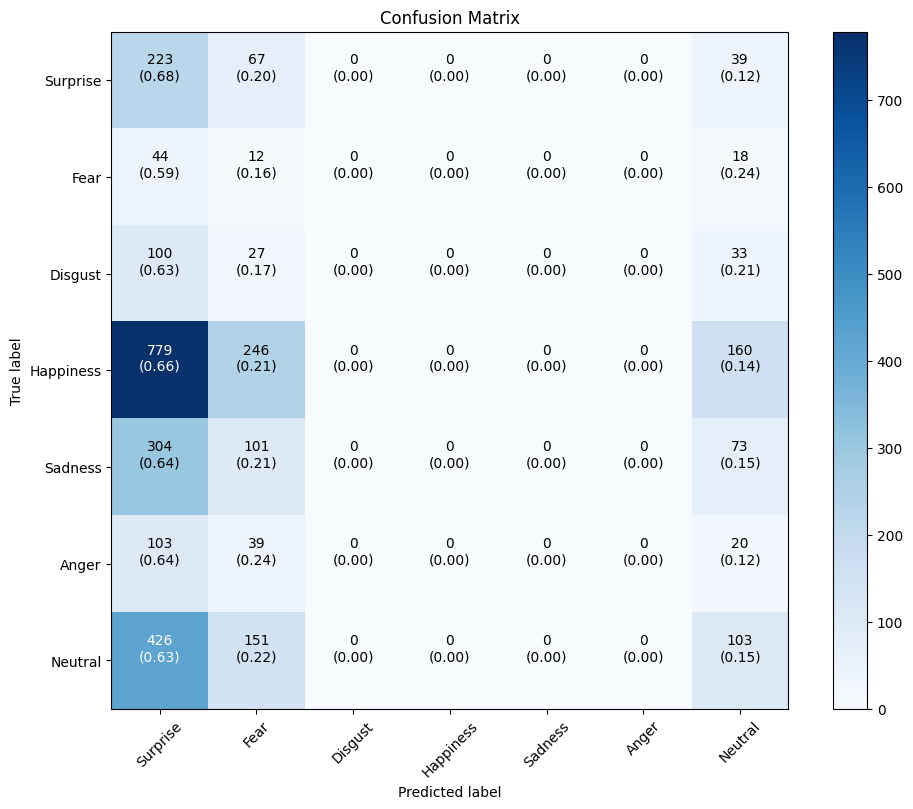

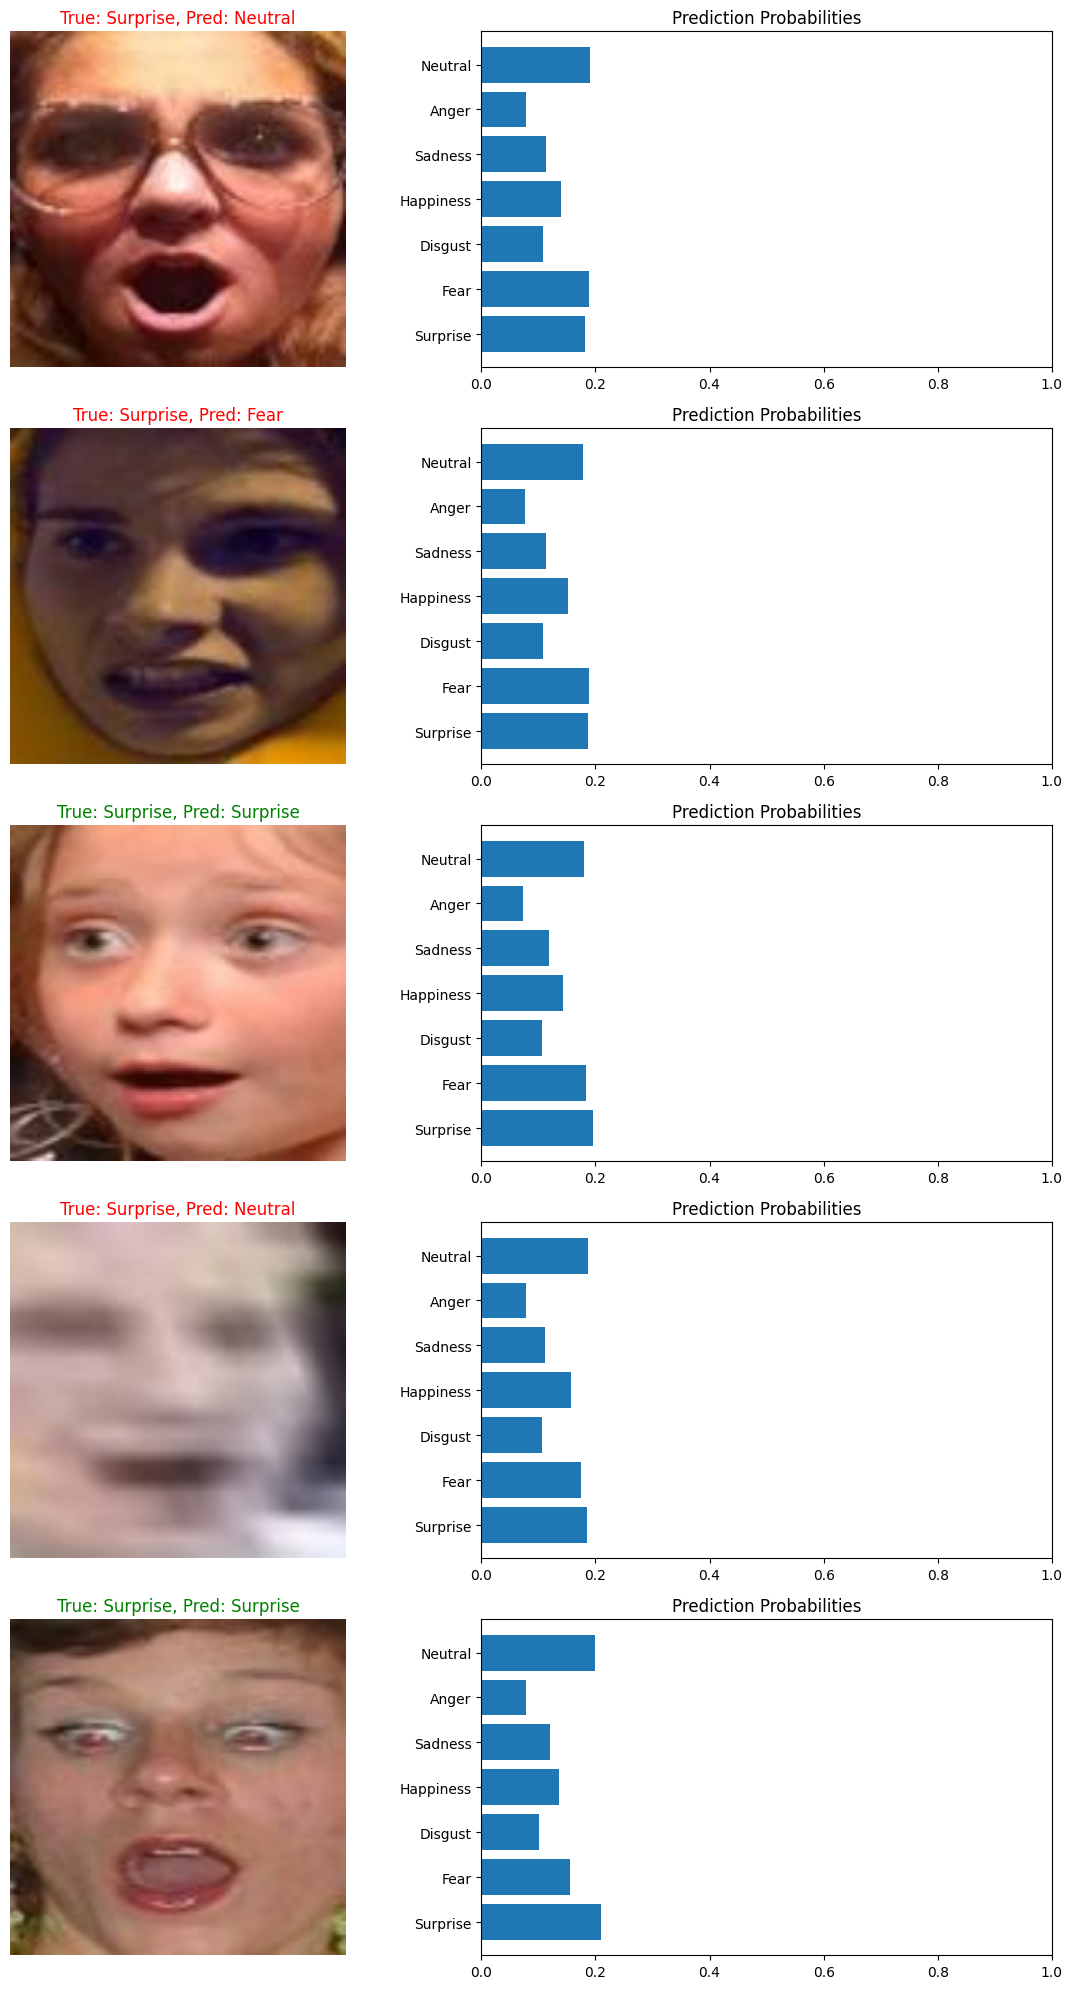

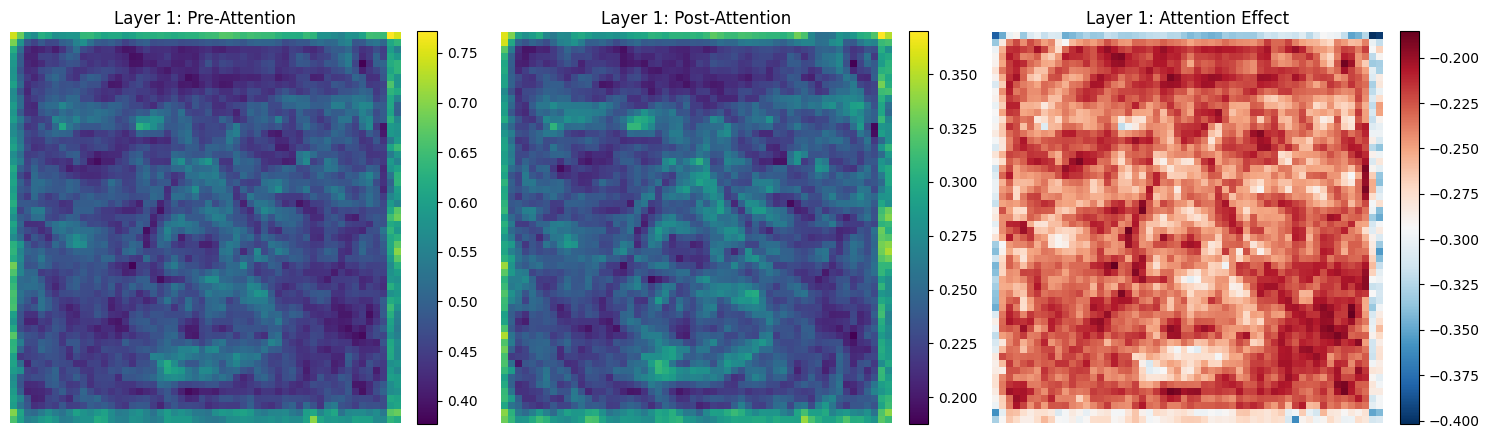

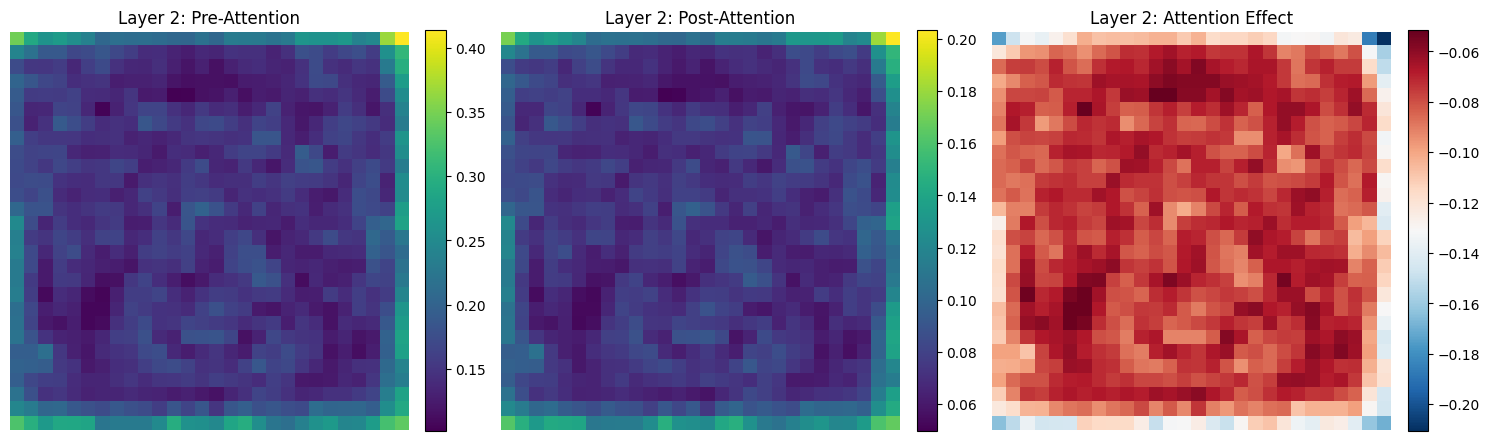

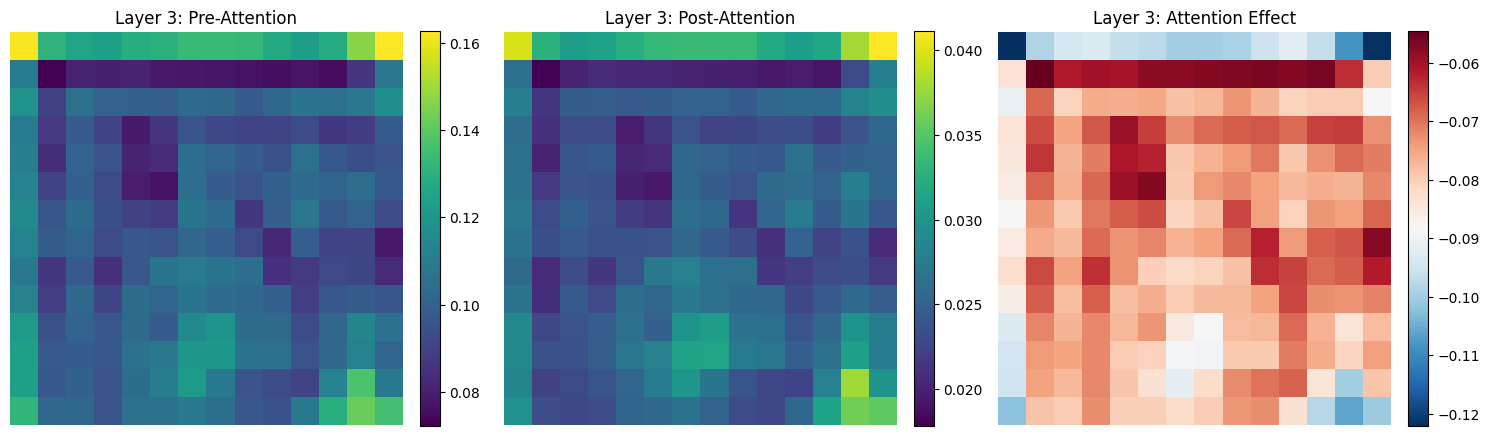

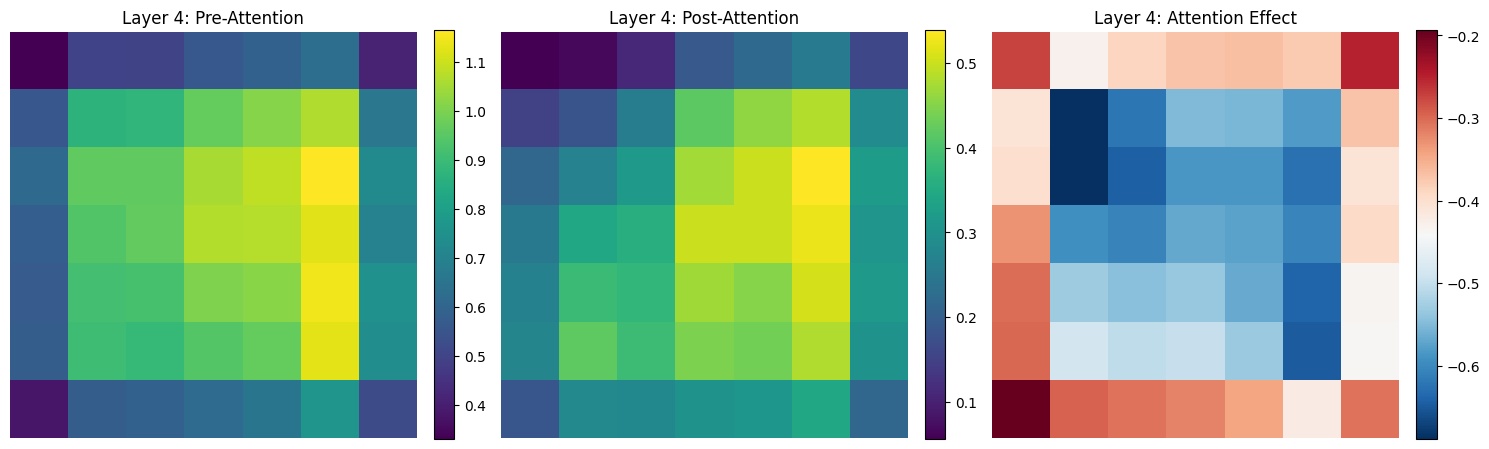

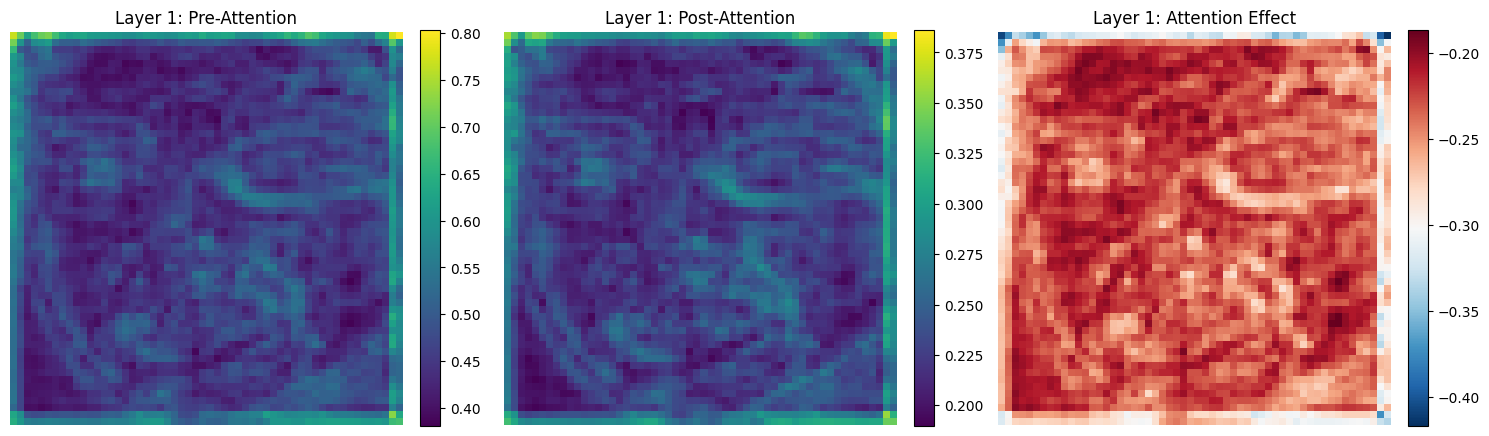

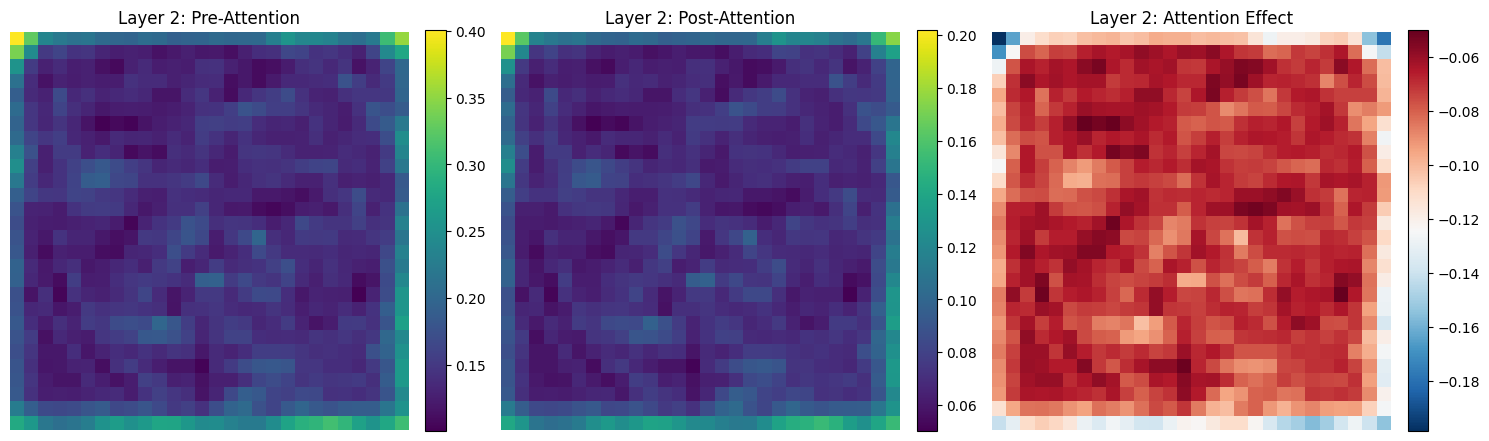

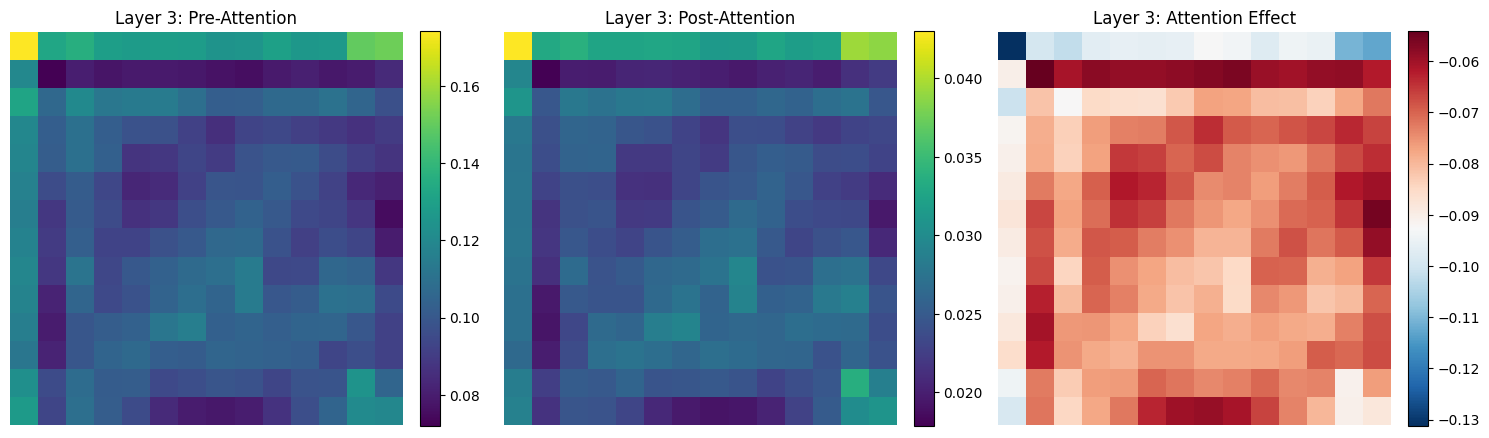

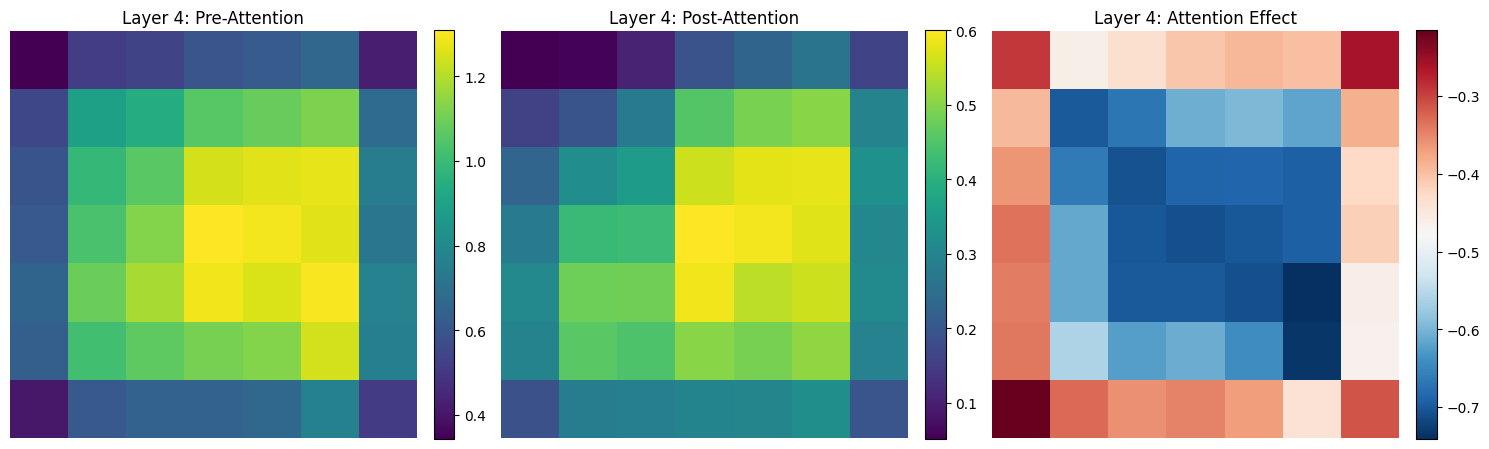

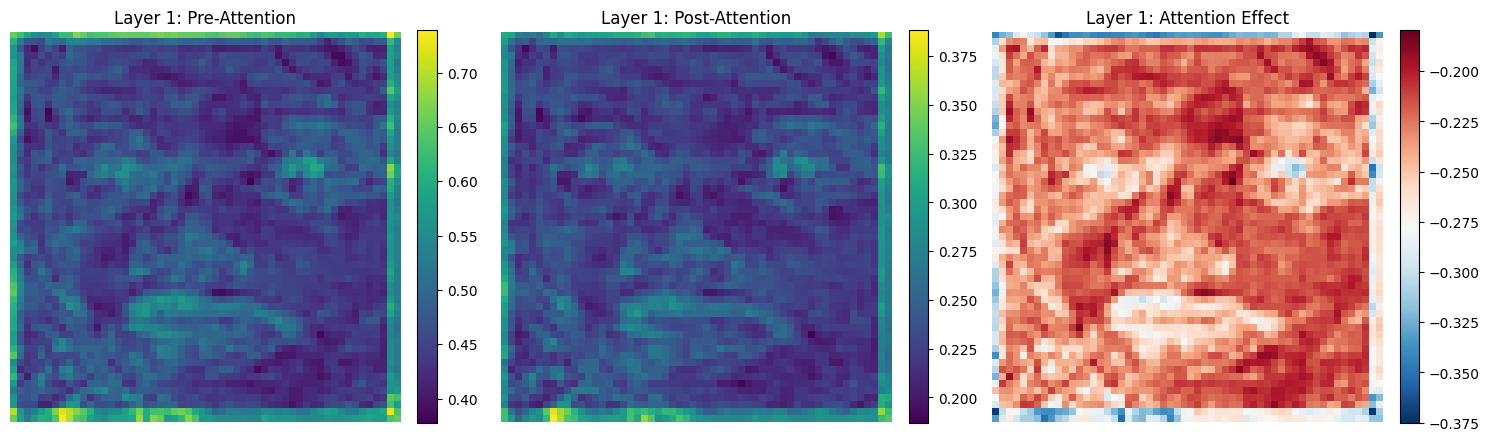

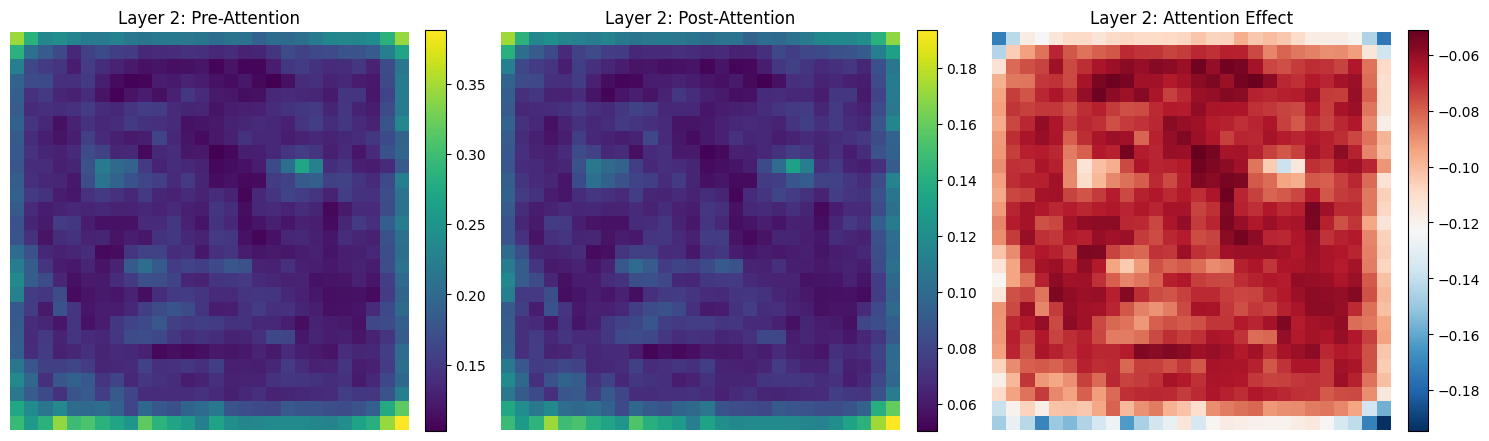

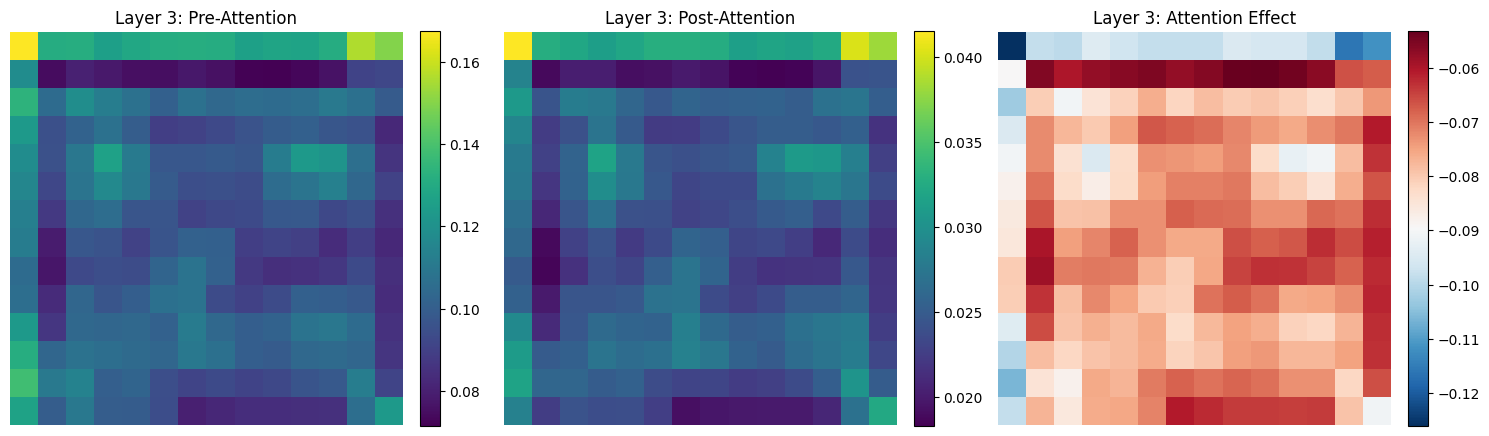

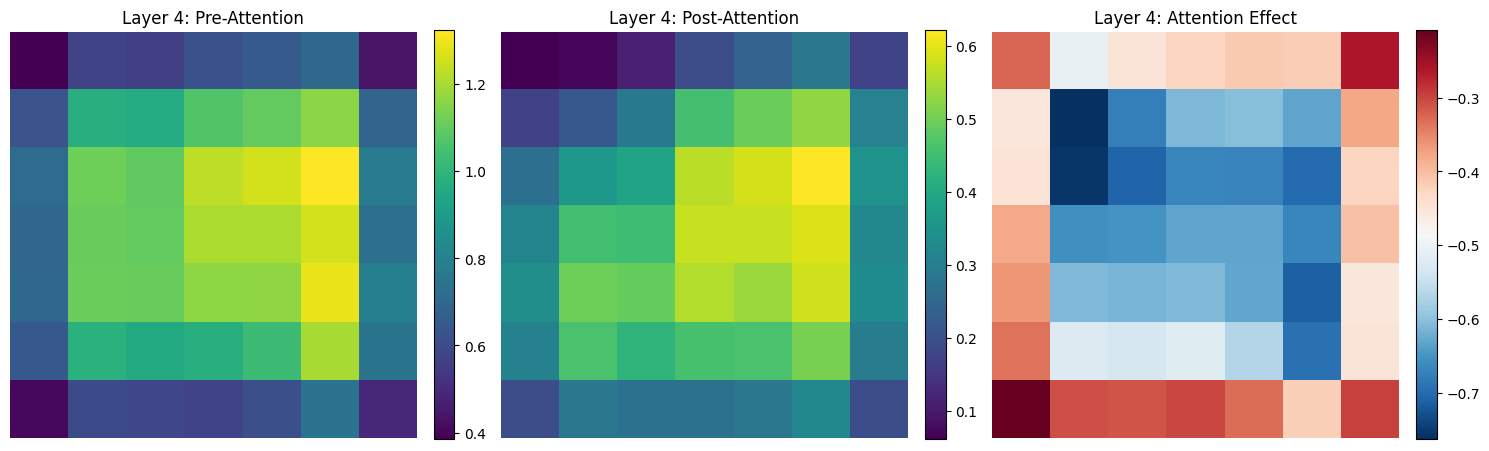

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import copy
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import time
from tqdm import tqdm


class ChannelAttention(nn.Module):
    """Channel attention mechanism for feature refinement"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.shared_mlp = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.shared_mlp(self.avg_pool(x))
        max_out = self.shared_mlp(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)


class SpatialAttention(nn.Module):
    """Spatial attention mechanism for focusing on important regions"""
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.conv(out)
        return self.sigmoid(out)


class SparseAttention(nn.Module):
    """Sparse Attention module that combines channel and spatial attention"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.channel_attention = ChannelAttention(channels, reduction)

    def forward(self, x):
        attention = self.channel_attention(x)
        x = x * attention
        return x


class LocalFeatureAttention(nn.Module):
    """Local Feature Attention module for fine-grained feature refinement"""
    def __init__(self, channels):
        super().__init__()
        self.channel_attention = ChannelAttention(channels)
        self.spatial_attention = SpatialAttention()

    def forward(self, x):
        # Apply channel attention first
        x = x * self.channel_attention(x)
        # Then apply spatial attention
        x = x * self.spatial_attention(x)
        return x


class DSAN(nn.Module):
    """
    Dual Stream Attention Network for Facial Emotion Recognition

    Architecture:
    - GFE-AN: Global Feature Extraction with Attention Network
    - MFF-AN: Multi-scale Feature Fusion with Attention Network
    - Classification layer
    """
    def __init__(self, num_classes=7, pretrained=True):
        super().__init__()

        # Use ResNet18 as backbone for feature extraction
        resnet = models.resnet18(pretrained=pretrained)

        # GFE-AN Stream (Global Feature Extraction with Attention Network)
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool

        self.layer1 = resnet.layer1
        self.gfe_attention1 = SparseAttention(64)

        self.layer2 = resnet.layer2
        self.gfe_attention2 = SparseAttention(128)

        # MFF-AN Stream (Multi-scale Feature Fusion with Attention Network)
        self.layer3 = resnet.layer3
        self.mff_attention1 = LocalFeatureAttention(256)

        self.layer4 = resnet.layer4
        self.mff_attention2 = LocalFeatureAttention(512)

        # Global pooling and classification
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512, num_classes)

        # Store attention maps for visualization
        self.attention_maps = []

    def forward(self, x):
        # Reset attention maps storage
        self.attention_maps = []

        # GFE-AN Stream
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        # Store pre-attention feature map for visualization
        pre_attn1 = x.detach().clone()
        x = self.gfe_attention1(x)
        # Store attention effect for visualization
        self.attention_maps.append((pre_attn1, x.detach().clone()))

        x = self.layer2(x)
        pre_attn2 = x.detach().clone()
        x = self.gfe_attention2(x)
        self.attention_maps.append((pre_attn2, x.detach().clone()))

        # MFF-AN Stream
        x = self.layer3(x)
        pre_attn3 = x.detach().clone()
        x = self.mff_attention1(x)
        self.attention_maps.append((pre_attn3, x.detach().clone()))

        x = self.layer4(x)
        pre_attn4 = x.detach().clone()
        x = self.mff_attention2(x)
        self.attention_maps.append((pre_attn4, x.detach().clone()))

        # Classification
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def visualize_attention(self, input_img):
        """
        Generate attention visualizations for a given input image

        Args:
            input_img: Input tensor of shape [1, 3, H, W]

        Returns:
            List of attention visualization figures
        """
        # Ensure model is in eval mode
        self.eval()

        with torch.no_grad():
            # Forward pass to populate attention maps
            _ = self.forward(input_img)

            visualizations = []

            for i, (pre_attn, post_attn) in enumerate(self.attention_maps):
                # Convert tensors to numpy for visualization
                pre_feature = pre_attn[0].cpu().numpy()  # Take first image in batch
                post_feature = post_attn[0].cpu().numpy()

                # Average across channels to get attention heatmap
                pre_feature_map = np.mean(pre_feature, axis=0)
                post_feature_map = np.mean(post_feature, axis=0)

                # Create difference map to highlight attention effect
                diff_map = post_feature_map - pre_feature_map

                # Create figure
                fig, axes = plt.subplots(1, 3, figsize=(15, 5))

                # Plot pre-attention feature map
                im1 = axes[0].imshow(pre_feature_map, cmap='viridis')
                axes[0].set_title(f'Layer {i+1}: Pre-Attention')
                axes[0].axis('off')
                plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

                # Plot post-attention feature map
                im2 = axes[1].imshow(post_feature_map, cmap='viridis')
                axes[1].set_title(f'Layer {i+1}: Post-Attention')
                axes[1].axis('off')
                plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

                # Plot difference map
                im3 = axes[2].imshow(diff_map, cmap='RdBu_r')
                axes[2].set_title(f'Layer {i+1}: Attention Effect')
                axes[2].axis('off')
                plt.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

                plt.tight_layout()
                visualizations.append(fig)

            return visualizations


class RAFDBFolderDataset(Dataset):
    """
    RAF-DB dataset loader for folder-based structure

    The RAF-DB dataset contains 7 emotion categories mapped to folder numbers:
    1: Surprise, 2: Fear, 3: Disgust, 4: Happiness, 5: Sadness, 6: Anger, 7: Neutral
    """
    def __init__(self, root_dir, split='test', transform=None):
        """
        Args:
            root_dir (string): Root directory of the RAF-DB dataset.
            split (string): 'train' or 'test' split.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = os.path.join(root_dir, split)
        self.transform = transform
        self.samples = []

        # Check if directory exists
        if not os.path.exists(self.root_dir):
            raise RuntimeError(f"Dataset directory not found: {self.root_dir}")

        # Class mapping based on RAF-DB folder numbering
        self.class_to_idx = {
            '1': 0,  # Surprise
            '2': 1,  # Fear
            '3': 2,  # Disgust
            '4': 3,  # Happiness
            '5': 4,  # Sadness
            '6': 5,  # Anger
            '7': 6,  # Neutral
        }

        # Load all samples from the directory structure
        for class_folder in sorted(os.listdir(self.root_dir)):
            class_path = os.path.join(self.root_dir, class_folder)
            if os.path.isdir(class_path) and class_folder in self.class_to_idx:
                class_idx = self.class_to_idx[class_folder]
                img_files = os.listdir(class_path)
                print(f"Class {class_folder} ({self.get_class_name(class_idx)}): {len(img_files)} images")
                for img_file in img_files:
                    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                        self.samples.append((os.path.join(class_path, img_file), class_idx))

    def get_class_name(self, class_idx):
        """Get emotion name from class index"""
        emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']
        return emotion_labels[class_idx]

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        try:
            image = Image.open(img_path).convert('RGB')

            if self.transform:
                image = self.transform(image)

            return image, label
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            # Return a placeholder image and the same label
            placeholder = torch.zeros(3, 224, 224) if self.transform else Image.new('RGB', (224, 224))
            return placeholder, label


def count_parameters(model):
    """Count trainable parameters in the model"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def test_model(model, test_loader, device):
    """Test the model on the test dataset"""
    model.eval()
    correct = 0
    total = 0
    class_correct = [0] * 7
    class_total = [0] * 7
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    confusion_matrix = torch.zeros(7, 7)

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Per-class accuracy
            for i in range(len(labels)):
                label = labels[i].item()
                pred = predicted[i].item()
                class_total[label] += 1
                if label == pred:
                    class_correct[label] += 1

                # Update confusion matrix
                confusion_matrix[label][pred] += 1

    # Calculate overall accuracy
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

    # Calculate per-class accuracy
    print('\nPer-class accuracy:')
    for i in range(7):
        class_acc = 100 * class_correct[i] / max(class_total[i], 1)
        print(f'{emotion_labels[i]}: {class_acc:.2f}% ({class_correct[i]}/{class_total[i]})')

    # Calculate F1 score for each class
    print('\nPer-class F1 scores:')
    f1_scores = []
    for i in range(7):
        # Calculate precision and recall
        tp = confusion_matrix[i][i].item()
        fp = confusion_matrix[:, i].sum().item() - tp
        fn = confusion_matrix[i, :].sum().item() - tp

        precision = tp / max(tp + fp, 1)
        recall = tp / max(tp + fn, 1)

        # Calculate F1 score
        f1 = 2 * precision * recall / max(precision + recall, 1e-6)
        f1_scores.append(f1)
        print(f'{emotion_labels[i]}: {f1:.4f}')

    # Calculate mean F1 score
    mean_f1 = sum(f1_scores) / len(f1_scores)
    print(f'\nMean F1 Score: {mean_f1:.4f}')

    return accuracy, mean_f1, confusion_matrix


def visualize_confusion_matrix(confusion_matrix):
    """Visualize confusion matrix"""
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    plt.figure(figsize=(10, 8))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(emotion_labels))
    plt.xticks(tick_marks, emotion_labels, rotation=45)
    plt.yticks(tick_marks, emotion_labels)

    # Normalize confusion matrix
    cm_norm = confusion_matrix.numpy().astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    # Add text annotations
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, f'{confusion_matrix[i, j]:.0f}\n({cm_norm[i, j]:.2f})',
                     horizontalalignment="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return plt.gcf()


def visualize_sample_predictions(model, test_loader, device, num_samples=5):
    """Visualize sample predictions from the model"""
    model.eval()
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    # Get a batch of samples
    images, labels = next(iter(test_loader))
    images, labels = images[:num_samples].to(device), labels[:num_samples].to(device)

    # Get predictions
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        probs = F.softmax(outputs, dim=1)

    # Visualize each sample
    fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4*num_samples))
    if num_samples == 1:
        axes = np.array([axes])  # Handle case with only one sample

    for i in range(num_samples):
        # Display image
        img = images[i].cpu().permute(1, 2, 0).numpy()
        # Denormalize
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)

        axes[i, 0].imshow(img)
        true_label = emotion_labels[labels[i].item()]
        pred_label = emotion_labels[predicted[i].item()]
        color = 'green' if true_label == pred_label else 'red'
        axes[i, 0].set_title(f'True: {true_label}, Pred: {pred_label}', color=color)
        axes[i, 0].axis('off')

        # Display prediction probabilities
        probs_array = probs[i].cpu().numpy()
        axes[i, 1].barh(emotion_labels, probs_array)
        axes[i, 1].set_xlim(0, 1)
        axes[i, 1].set_title('Prediction Probabilities')

    plt.tight_layout()
    return fig


def visualize_attention_maps(model, test_loader, device, num_samples=3):
    """Visualize attention maps for sample images"""
    model.eval()

    # Get a batch of samples
    images, _ = next(iter(test_loader))
    images = images[:num_samples].to(device)

    all_visualizations = []

    for i in range(num_samples):
        single_img = images[i:i+1]  # Keep batch dimension
        visualizations = model.visualize_attention(single_img)
        all_visualizations.append(visualizations)

        # Save the visualizations
        for j, fig in enumerate(visualizations):
            fig.savefig(f"attention_map_sample{i+1}_layer{j+1}.png")

    print(f"Saved attention map visualizations for {num_samples} samples")
    return all_visualizations


def main():
    """Main function to test the model on RAF-DB dataset"""
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Data transformations
    test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Path settings for the updated directory structure
    raf_db_root = "./data/rafdb/DATASET"  # Path to the dataset root

    # Create test dataset and dataloader
    try:
        test_dataset = RAFDBFolderDataset(
            root_dir=raf_db_root,
            split='test',
            transform=test_transform
        )

        test_loader = DataLoader(
            test_dataset,
            batch_size=32,
            shuffle=False,
            num_workers=4
        )

        print(f"Test dataset size: {len(test_dataset)}")

        # Create model
        model = DSAN(num_classes=7, pretrained=True)
        model = model.to(device)
        print(f"Model created with {count_parameters(model):,} trainable parameters")

        # Load pretrained weights if available
        model_path = "./dsan_model_rafdb.pth"
        use_untrained_model = False

        if os.path.exists(model_path):
            model.load_state_dict(torch.load(model_path, map_location=device))
            print(f"Loaded pretrained model from {model_path}")
        else:
            print("No pretrained model found. Using model with only pretrained backbone.")
            print("NOTE: Testing with an untrained model will give random predictions!")
            use_untrained_model = True

        # Test the model
        accuracy, mean_f1, conf_matrix = test_model(model, test_loader, device)

        # Visualize confusion matrix
        cm_fig = visualize_confusion_matrix(conf_matrix)
        cm_fig.savefig("confusion_matrix_rafdb.png")
        print("Saved confusion matrix visualization to confusion_matrix_rafdb.png")

        # Visualize sample predictions
        sample_fig = visualize_sample_predictions(model, test_loader, device)
        sample_fig.savefig("sample_predictions_rafdb.png")
        print("Saved sample predictions visualization to sample_predictions_rafdb.png")

        # Visualize attention maps
        visualize_attention_maps(model, test_loader, device)

        # Save evaluation results
        with open("evaluation_results_rafdb.txt", "w") as f:
            if use_untrained_model:
                f.write("WARNING: Model was not trained! Results reflect random predictions!\n\n")
            f.write(f"Test Accuracy: {accuracy:.2f}%\n")
            f.write(f"Mean F1 Score: {mean_f1:.4f}\n")

        print("Evaluation completed!")

    except Exception as e:
        print(f"Error during dataset loading or evaluation: {e}")
        import traceback
        traceback.print_exc()


if __name__ == "__main__":
    main()

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import time
from tqdm import tqdm

def train_model(model, train_loader, val_loader, device, epochs=50, patience=10):
    """Train the model with early stopping"""
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss(weight=calculate_class_weights(train_loader, device))
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, verbose=True)

    # Initialize variables for early stopping
    best_f1 = 0.0
    best_model_state = None
    no_improve_epochs = 0

    # Training loop
    for epoch in range(epochs):
        start_time = time.time()

        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / total
        train_acc = 100 * correct / total

        # Validation phase
        val_acc, val_f1, _ = test_model(model, val_loader, device, verbose=False)

        # Print epoch statistics
        epoch_time = time.time() - start_time
        print(f'Epoch {epoch+1}/{epochs} | Time: {epoch_time:.2f}s')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%')
        print(f'Val Acc: {val_acc:.2f}% | Val F1: {val_f1:.4f}')

        # Learning rate scheduler step
        scheduler.step(val_f1)

        # Check for early stopping
        if val_f1 > best_f1:
            best_f1 = val_f1
            best_model_state = model.state_dict().copy()
            no_improve_epochs = 0
            # Save the best model
            torch.save(best_model_state, 'dsan_model_rafdb_best.pth')
            print(f"Saved new best model with F1: {best_f1:.4f}")
        else:
            no_improve_epochs += 1
            print(f"No improvement for {no_improve_epochs} epochs")

        if no_improve_epochs >= patience:
            print(f"Early stopping after {epoch+1} epochs")
            break

    # Load the best model
    if best_model_state:
        model.load_state_dict(best_model_state)
        print(f"Loaded best model with F1: {best_f1:.4f}")

    # Save the final model
    torch.save(model.state_dict(), 'dsan_model_rafdb.pth')
    print("Saved final model")

    return model

def calculate_class_weights(train_loader, device):
    """Calculate class weights for handling class imbalance"""
    class_counts = torch.zeros(7, dtype=torch.float)

    for _, labels in train_loader:
        for label in labels:
            class_counts[label] += 1

    # Calculate weights (inverse of frequency)
    weights = 1.0 / class_counts
    # Normalize weights
    weights = weights / weights.sum() * len(weights)

    return weights.to(device)

def test_model(model, test_loader, device, verbose=True):
    """Test the model on the test dataset"""
    model.eval()
    correct = 0
    total = 0
    class_correct = [0] * 7
    class_total = [0] * 7
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    confusion_matrix = torch.zeros(7, 7)

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Per-class accuracy
            for i in range(len(labels)):
                label = labels[i].item()
                pred = predicted[i].item()
                class_total[label] += 1
                if label == pred:
                    class_correct[label] += 1

                # Update confusion matrix
                confusion_matrix[label][pred] += 1

    # Calculate overall accuracy
    accuracy = 100 * correct / total

    # Calculate F1 score for each class
    f1_scores = []
    for i in range(7):
        # Calculate precision and recall
        tp = confusion_matrix[i][i].item()
        fp = confusion_matrix[:, i].sum().item() - tp
        fn = confusion_matrix[i, :].sum().item() - tp

        precision = tp / max(tp + fp, 1)
        recall = tp / max(tp + fn, 1)

        # Calculate F1 score
        f1 = 2 * precision * recall / max(precision + recall, 1e-6)
        f1_scores.append(f1)

    # Calculate mean F1 score
    mean_f1 = sum(f1_scores) / len(f1_scores)

    if verbose:
        print(f'Test Accuracy: {accuracy:.2f}%')

        # Print per-class accuracy
        print('\nPer-class accuracy:')
        for i in range(7):
            class_acc = 100 * class_correct[i] / max(class_total[i], 1)
            print(f'{emotion_labels[i]}: {class_acc:.2f}% ({class_correct[i]}/{class_total[i]})')

        # Print F1 scores
        print('\nPer-class F1 scores:')
        for i in range(7):
            print(f'{emotion_labels[i]}: {f1_scores[i]:.4f}')

        print(f'\nMean F1 Score: {mean_f1:.4f}')

    return accuracy, mean_f1, confusion_matrix

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import time
from tqdm import tqdm

def train_model(model, train_loader, val_loader, device, epochs=50, patience=10):
    """Train the model with early stopping"""
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss(weight=calculate_class_weights(train_loader, device))
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, verbose=True)

    # Initialize variables for early stopping
    best_f1 = 0.0
    best_model_state = None
    no_improve_epochs = 0

    # Training loop
    for epoch in range(epochs):
        start_time = time.time()

        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / total
        train_acc = 100 * correct / total

        # Validation phase
        val_acc, val_f1, _ = test_model(model, val_loader, device, verbose=False)

        # Print epoch statistics
        epoch_time = time.time() - start_time
        print(f'Epoch {epoch+1}/{epochs} | Time: {epoch_time:.2f}s')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%')
        print(f'Val Acc: {val_acc:.2f}% | Val F1: {val_f1:.4f}')

        # Learning rate scheduler step
        scheduler.step(val_f1)

        # Check for early stopping
        if val_f1 > best_f1:
            best_f1 = val_f1
            best_model_state = model.state_dict().copy()
            no_improve_epochs = 0
            # Save the best model
            torch.save(best_model_state, 'dsan_model_rafdb_best.pth')
            print(f"Saved new best model with F1: {best_f1:.4f}")
        else:
            no_improve_epochs += 1
            print(f"No improvement for {no_improve_epochs} epochs")

        if no_improve_epochs >= patience:
            print(f"Early stopping after {epoch+1} epochs")
            break

    # Load the best model
    if best_model_state:
        model.load_state_dict(best_model_state)
        print(f"Loaded best model with F1: {best_f1:.4f}")

    # Save the final model
    torch.save(model.state_dict(), 'dsan_model_rafdb.pth')
    print("Saved final model")

    return model

def calculate_class_weights(train_loader, device):
    """Calculate class weights for handling class imbalance"""
    class_counts = torch.zeros(7, dtype=torch.float)

    for _, labels in train_loader:
        for label in labels:
            class_counts[label] += 1

    # Calculate weights (inverse of frequency)
    weights = 1.0 / class_counts
    # Normalize weights
    weights = weights / weights.sum() * len(weights)

    return weights.to(device)

def test_model(model, test_loader, device, verbose=True):
    """Test the model on the test dataset"""
    model.eval()
    correct = 0
    total = 0
    class_correct = [0] * 7
    class_total = [0] * 7
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    confusion_matrix = torch.zeros(7, 7)

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Per-class accuracy
            for i in range(len(labels)):
                label = labels[i].item()
                pred = predicted[i].item()
                class_total[label] += 1
                if label == pred:
                    class_correct[label] += 1

                # Update confusion matrix
                confusion_matrix[label][pred] += 1

    # Calculate overall accuracy
    accuracy = 100 * correct / total

    # Calculate F1 score for each class
    f1_scores = []
    for i in range(7):
        # Calculate precision and recall
        tp = confusion_matrix[i][i].item()
        fp = confusion_matrix[:, i].sum().item() - tp
        fn = confusion_matrix[i, :].sum().item() - tp

        precision = tp / max(tp + fp, 1)
        recall = tp / max(tp + fn, 1)

        # Calculate F1 score
        f1 = 2 * precision * recall / max(precision + recall, 1e-6)
        f1_scores.append(f1)

    # Calculate mean F1 score
    mean_f1 = sum(f1_scores) / len(f1_scores)

    if verbose:
        print(f'Test Accuracy: {accuracy:.2f}%')

        # Print per-class accuracy
        print('\nPer-class accuracy:')
        for i in range(7):
            class_acc = 100 * class_correct[i] / max(class_total[i], 1)
            print(f'{emotion_labels[i]}: {class_acc:.2f}% ({class_correct[i]}/{class_total[i]})')

        # Print F1 scores
        print('\nPer-class F1 scores:')
        for i in range(7):
            print(f'{emotion_labels[i]}: {f1_scores[i]:.4f}')

        print(f'\nMean F1 Score: {mean_f1:.4f}')

    return accuracy, mean_f1, confusion_matrix

In [ ]:
def get_transforms():
    """Get data transformations for training and testing"""
    train_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    return train_transform, test_transform

In [ ]:
def main():
    """Main function to train and test the model on RAF-DB dataset"""
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Set random seed for reproducibility
    torch.manual_seed(42)
    np.random.seed(42)

    # Data transformations
    train_transform, test_transform = get_transforms()

    # Path settings for the directory structure
    raf_db_root = "./data/rafdb/DATASET"  # Path to the dataset root

    # Create train and validation datasets
    try:
        # Load train dataset
        train_dataset = RAFDBFolderDataset(
            root_dir=raf_db_root,
            split='train',
            transform=train_transform
        )

        # Create validation split (20% of training data)
        train_size = int(0.8 * len(train_dataset))
        val_size = len(train_dataset) - train_size

        train_dataset, val_dataset = torch.utils.data.random_split(
            train_dataset,
            [train_size, val_size],
            generator=torch.Generator().manual_seed(42)
        )

        # Apply correct transforms to validation split
        val_dataset.dataset = copy.deepcopy(train_dataset.dataset)
        val_dataset.dataset.transform = test_transform

        # Create test dataset
        test_dataset = RAFDBFolderDataset(
            root_dir=raf_db_root,
            split='test',
            transform=test_transform
        )

        # Handle class imbalance with WeightedRandomSampler
        # Count samples per class in training set
        class_counts = [0] * 7
        for _, label in train_dataset:
            class_counts[label] += 1

        # Calculate weights for each sample in training set
        weights = torch.zeros(len(train_dataset))
        for idx, (_, label) in enumerate(train_dataset):
            # Weight = 1 / class_count
            weights[idx] = 1.0 / class_counts[label]

        # Create WeightedRandomSampler
        sampler = torch.utils.data.WeightedRandomSampler(
            weights=weights,
            num_samples=len(train_dataset),
            replacement=True
        )

        # Create dataloaders
        train_loader = DataLoader(
            train_dataset,
            batch_size=32,
            sampler=sampler,
            num_workers=4,
            pin_memory=True
        )

        val_loader = DataLoader(
            val_dataset,
            batch_size=32,
            shuffle=False,
            num_workers=4,
            pin_memory=True
        )

        test_loader = DataLoader(
            test_dataset,
            batch_size=32,
            shuffle=False,
            num_workers=4,
            pin_memory=True
        )

        print(f"Train dataset size: {len(train_dataset)}")
        print(f"Validation dataset size: {len(val_dataset)}")
        print(f"Test dataset size: {len(test_dataset)}")

        # Create model
        model = DSAN(num_classes=7, pretrained=True)
        model = model.to(device)
        print(f"Model created with {count_parameters(model):,} trainable parameters")

        # Check if we want to load a pretrained model
        model_path = "./dsan_model_rafdb.pth"
        train_model_flag = True

        if os.path.exists(model_path) and not train_model_flag:
            model.load_state_dict(torch.load(model_path, map_location=device))
            print(f"Loaded pretrained model from {model_path}")
        else:
            print("Training new model...")
            # Train the model
            model = train_model(
                model=model,
                train_loader=train_loader,
                val_loader=val_loader,
                device=device,
                epochs=50,
                patience=10
            )

        # Test the model
        print("\nEvaluating model on test set:")
        accuracy, mean_f1, conf_matrix = test_model(model, test_loader, device)

        # Visualize confusion matrix
        cm_fig = visualize_confusion_matrix(conf_matrix)
        cm_fig.savefig("confusion_matrix_rafdb.png")
        print("Saved confusion matrix visualization to confusion_matrix_rafdb.png")

        # Visualize sample predictions
        sample_fig = visualize_sample_predictions(model, test_loader, device)
        sample_fig.savefig("sample_predictions_rafdb.png")
        print("Saved sample predictions visualization to sample_predictions_rafdb.png")

        # Visualize attention maps
        visualize_attention_maps(model, test_loader, device)

        # Save evaluation results
        with open("evaluation_results_rafdb.txt", "w") as f:
            f.write(f"Test Accuracy: {accuracy:.2f}%\n")
            f.write(f"Mean F1 Score: {mean_f1:.4f}\n")

        print("Evaluation completed!")

    except Exception as e:
        print(f"Error during dataset loading or evaluation: {e}")
        import traceback
        traceback.print_exc()

In [ ]:
class RAFDBFolderDataset(Dataset):
    """
    RAF-DB dataset loader for folder-based structure

    The RAF-DB dataset contains 7 emotion categories mapped to folder numbers:
    1: Surprise, 2: Fear, 3: Disgust, 4: Happiness, 5: Sadness, 6: Anger, 7: Neutral
    """
    def __init__(self, root_dir, split='test', transform=None):
        """
        Args:
            root_dir (string): Root directory of the RAF-DB dataset.
            split (string): 'train' or 'test' split.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = os.path.join(root_dir, split)
        self.transform = transform
        self.samples = []

        # Check if directory exists
        if not os.path.exists(self.root_dir):
            raise RuntimeError(f"Dataset directory not found: {self.root_dir}")

        # Class mapping based on RAF-DB folder numbering
        self.class_to_idx = {
            '1': 0,  # Surprise
            '2': 1,  # Fear
            '3': 2,  # Disgust
            '4': 3,  # Happiness
            '5': 4,  # Sadness
            '6': 5,  # Anger
            '7': 6,  # Neutral
        }

        # Load all samples from the directory structure
        class_samples = {cls: 0 for cls in self.class_to_idx.values()}

        for class_folder in sorted(os.listdir(self.root_dir)):
            class_path = os.path.join(self.root_dir, class_folder)
            if os.path.isdir(class_path) and class_folder in self.class_to_idx:
                class_idx = self.class_to_idx[class_folder]
                img_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
                class_samples[class_idx] = len(img_files)
                print(f"Class {class_folder} ({self.get_class_name(class_idx)}): {len(img_files)} images")
                for img_file in img_files:
                    self.samples.append((os.path.join(class_path, img_file), class_idx))

        print(f"Total samples in {split} set: {len(self.samples)}")

        # Calculate class weights for handling imbalance
        total_samples = sum(class_samples.values())
        self.class_weights = {cls: total_samples / (len(class_samples) * count)
                             if count > 0 else 0
                             for cls, count in class_samples.items()}

    def get_class_weights(self):
        """Get class weights for handling imbalance"""
        return self.class_weights

    def get_class_name(self, class_idx):
        """Get emotion name from class index"""
        emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']
        return emotion_labels[class_idx]

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        try:
            image = Image.open(img_path).convert('RGB')

            if self.transform:
                image = self.transform(image)

            return image, label
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            # Return a placeholder image and the same label
            placeholder = torch.zeros(3, 224, 224) if self.transform else Image.new('RGB', (224, 224))
            return placeholder, label

In [ ]:
# Updated model class with additional improvements
class DSANPlus(nn.Module):
    """
    Enhanced Dual Stream Attention Network for Facial Emotion Recognition

    Improvements:
    - Added Dropout for regularization
    - Enhanced attention modules
    - Added residual connections
    - Added batch normalization
    """
    def __init__(self, num_classes=7, pretrained=True, dropout_rate=0.5):
        super().__init__()

        # Use ResNet18 as backbone for feature extraction
        resnet = models.resnet18(pretrained=pretrained)

        # GFE-AN Stream (Global Feature Extraction with Attention Network)
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool

        self.layer1 = resnet.layer1
        self.gfe_attention1 = SparseAttention(64)
        self.bn_gfe1 = nn.BatchNorm2d(64)

        self.layer2 = resnet.layer2
        self.gfe_attention2 = SparseAttention(128)
        self.bn_gfe2 = nn.BatchNorm2d(128)

        # MFF-AN Stream (Multi-scale Feature Fusion with Attention Network)
        self.layer3 = resnet.layer3
        self.mff_attention1 = LocalFeatureAttention(256)
        self.bn_mff1 = nn.BatchNorm2d(256)

        self.layer4 = resnet.layer4
        self.mff_attention2 = LocalFeatureAttention(512)
        self.bn_mff2 = nn.BatchNorm2d(512)

        # Global pooling and classification
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(dropout_rate)

        # Two-stage classifier
        self.fc1 = nn.Linear(512, 256)
        self.bn_fc = nn.BatchNorm1d(256)
        self.relu_fc = nn.ReLU(inplace=True)
        self.dropout_fc = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(256, num_classes)

        # Store attention maps for visualization
        self.attention_maps = []

    def forward(self, x):
        # Reset attention maps storage
        self.attention_maps = []

        # GFE-AN Stream
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        # Layer 1 with residual connection
        identity1 = x
        x = self.layer1(x)
        # Store pre-attention feature map for visualization
        pre_attn1 = x.detach().clone()
        x_attn = self.gfe_attention1(x)
        x = x_attn * x + x  # Residual connection
        x = self.bn_gfe1(x)
        # Store attention effect for visualization
        self.attention_maps.append((pre_attn1, x.detach().clone()))

        # Layer 2 with residual connection
        identity2 = x
        x = self.layer2(x)
        pre_attn2 = x.detach().clone()
        x_attn = self.gfe_attention2(x)
        x = x_attn * x + x  # Residual connection
        x = self.bn_gfe2(x)
        self.attention_maps.append((pre_attn2, x.detach().clone()))

        # MFF-AN Stream
        identity3 = x
        x = self.layer3(x)
        pre_attn3 = x.detach().clone()
        x_attn = self.mff_attention1(x)
        x = x + x_attn  # Residual connection
        x = self.bn_mff1(x)
        self.attention_maps.append((pre_attn3, x.detach().clone()))

        identity4 = x
        x = self.layer4(x)
        pre_attn4 = x.detach().clone()
        x_attn = self.mff_attention2(x)
        x = x + x_attn  # Residual connection
        x = self.bn_mff2(x)
        self.attention_maps.append((pre_attn4, x.detach().clone()))

        # Classification
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)

        # Two-stage classification
        x = self.fc1(x)
        x = self.bn_fc(x)
        x = self.relu_fc(x)
        x = self.dropout_fc(x)
        x = self.fc2(x)

        return x

    def visualize_attention(self, input_img):
        """
        Generate attention visualizations for a given input image

        Args:
            input_img: Input tensor of shape [1, 3, H, W]

        Returns:
            List of attention visualization figures
        """
        # Ensure model is in eval mode
        self.eval()

        with torch.no_grad():
            # Forward pass to populate attention maps
            _ = self.forward(input_img)

            visualizations = []

            for i, (pre_attn, post_attn) in enumerate(self.attention_maps):
                # Convert tensors to numpy for visualization
                pre_feature = pre_attn[0].cpu().numpy()  # Take first image in batch
                post_feature = post_attn[0].cpu().numpy()

                # Average across channels to get attention heatmap
                pre_feature_map = np.mean(pre_feature, axis=0)
                post_feature_map = np.mean(post_feature, axis=0)

                # Create difference map to highlight attention effect
                diff_map = post_feature_map - pre_feature_map

                # Create figure
                fig, axes = plt.subplots(1, 3, figsize=(15, 5))

                # Plot pre-attention feature map
                im1 = axes[0].imshow(pre_feature_map, cmap='viridis')
                axes[0].set_title(f'Layer {i+1}: Pre-Attention')
                axes[0].axis('off')
                plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

                # Plot post-attention feature map
                im2 = axes[1].imshow(post_feature_map, cmap='viridis')
                axes[1].set_title(f'Layer {i+1}: Post-Attention')
                axes[1].axis('off')
                plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

                # Plot difference map
                im3 = axes[2].imshow(diff_map, cmap='RdBu_r')
                axes[2].set_title(f'Layer {i+1}: Attention Effect')
                axes[2].axis('off')
                plt.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

                plt.tight_layout()
                visualizations.append(fig)

            return visualizations

Using device: cuda
Loading training dataset...
Class 1 (Surprise): 1290 images
Class 2 (Fear): 281 images
Class 3 (Disgust): 717 images
Class 4 (Happiness): 4772 images
Class 5 (Sadness): 1982 images
Class 6 (Anger): 705 images
Class 7 (Neutral): 2524 images
Total samples in train set: 12271
Loading test dataset...
Class 1 (Surprise): 329 images
Class 2 (Fear): 74 images
Class 3 (Disgust): 160 images
Class 4 (Happiness): 1185 images
Class 5 (Sadness): 478 images
Class 6 (Anger): 162 images
Class 7 (Neutral): 680 images
Total samples in test set: 3068
Creating data loaders...
Train dataset size: 9816
Validation dataset size: 9816
Test dataset size: 3068
Creating model...


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model created with 11,355,787 trainable parameters

Training new model...


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/30: 100%|██████████| 307/307 [00:56<00:00,  5.48it/s]


Epoch 1/30 | Time: 79.14s
Train Loss: 1.5157 | Train Acc: 42.70%
Val Acc: 62.60% | Val F1: 0.5518
Saved new best model with F1: 0.5518


Epoch 2/30: 100%|██████████| 307/307 [00:55<00:00,  5.51it/s]


Epoch 2/30 | Time: 78.57s
Train Loss: 1.1279 | Train Acc: 58.26%
Val Acc: 57.41% | Val F1: 0.5068
No improvement for 1 epochs


Epoch 3/30: 100%|██████████| 307/307 [00:55<00:00,  5.54it/s]


Epoch 3/30 | Time: 78.82s
Train Loss: 0.9972 | Train Acc: 63.44%
Val Acc: 67.84% | Val F1: 0.6139
Saved new best model with F1: 0.6139


Epoch 4/30: 100%|██████████| 307/307 [00:56<00:00,  5.47it/s]


Epoch 4/30 | Time: 79.20s
Train Loss: 0.9068 | Train Acc: 67.33%
Val Acc: 68.07% | Val F1: 0.6129
No improvement for 1 epochs


Epoch 5/30: 100%|██████████| 307/307 [00:56<00:00,  5.39it/s]


Epoch 5/30 | Time: 78.93s
Train Loss: 0.8248 | Train Acc: 70.36%
Val Acc: 70.55% | Val F1: 0.6475
Saved new best model with F1: 0.6475


Epoch 6/30: 100%|██████████| 307/307 [00:56<00:00,  5.44it/s]


Epoch 6/30 | Time: 78.72s
Train Loss: 0.7665 | Train Acc: 72.19%
Val Acc: 74.48% | Val F1: 0.6911
Saved new best model with F1: 0.6911


Epoch 7/30: 100%|██████████| 307/307 [00:57<00:00,  5.35it/s]


Epoch 7/30 | Time: 80.68s
Train Loss: 0.7101 | Train Acc: 74.83%
Val Acc: 77.10% | Val F1: 0.7295
Saved new best model with F1: 0.7295


Epoch 8/30: 100%|██████████| 307/307 [00:55<00:00,  5.48it/s]


Epoch 8/30 | Time: 78.97s
Train Loss: 0.6659 | Train Acc: 76.43%
Val Acc: 75.96% | Val F1: 0.7261
No improvement for 1 epochs


Epoch 9/30: 100%|██████████| 307/307 [00:56<00:00,  5.44it/s]


Epoch 9/30 | Time: 79.35s
Train Loss: 0.6436 | Train Acc: 76.84%
Val Acc: 72.27% | Val F1: 0.7131
No improvement for 2 epochs


Epoch 10/30: 100%|██████████| 307/307 [00:56<00:00,  5.44it/s]


Epoch 10/30 | Time: 79.42s
Train Loss: 0.6056 | Train Acc: 78.81%
Val Acc: 74.77% | Val F1: 0.6957
No improvement for 3 epochs


Epoch 11/30: 100%|██████████| 307/307 [00:57<00:00,  5.38it/s]


Epoch 11/30 | Time: 79.54s
Train Loss: 0.5736 | Train Acc: 80.18%
Val Acc: 81.45% | Val F1: 0.7776
Saved new best model with F1: 0.7776


Epoch 12/30: 100%|██████████| 307/307 [00:56<00:00,  5.44it/s]


Epoch 12/30 | Time: 78.57s
Train Loss: 0.5500 | Train Acc: 80.78%
Val Acc: 78.77% | Val F1: 0.7786
Saved new best model with F1: 0.7786


Epoch 13/30: 100%|██████████| 307/307 [00:57<00:00,  5.38it/s]


Epoch 13/30 | Time: 79.12s
Train Loss: 0.5402 | Train Acc: 81.08%
Val Acc: 82.83% | Val F1: 0.8048
Saved new best model with F1: 0.8048


Epoch 14/30: 100%|██████████| 307/307 [00:55<00:00,  5.53it/s]


Epoch 14/30 | Time: 77.70s
Train Loss: 0.4898 | Train Acc: 83.15%
Val Acc: 81.59% | Val F1: 0.7922
No improvement for 1 epochs


Epoch 15/30: 100%|██████████| 307/307 [00:55<00:00,  5.48it/s]


Epoch 15/30 | Time: 78.89s
Train Loss: 0.4798 | Train Acc: 82.89%
Val Acc: 79.69% | Val F1: 0.7695
No improvement for 2 epochs


Epoch 16/30: 100%|██████████| 307/307 [00:55<00:00,  5.48it/s]


Epoch 16/30 | Time: 78.84s
Train Loss: 0.4741 | Train Acc: 83.34%
Val Acc: 82.77% | Val F1: 0.8115
Saved new best model with F1: 0.8115


Epoch 17/30: 100%|██████████| 307/307 [00:55<00:00,  5.51it/s]


Epoch 17/30 | Time: 78.80s
Train Loss: 0.4563 | Train Acc: 83.87%
Val Acc: 82.28% | Val F1: 0.8065
No improvement for 1 epochs


Epoch 18/30: 100%|██████████| 307/307 [00:55<00:00,  5.52it/s]


Epoch 18/30 | Time: 78.78s
Train Loss: 0.4311 | Train Acc: 85.01%
Val Acc: 83.11% | Val F1: 0.7876
No improvement for 2 epochs


Epoch 19/30: 100%|██████████| 307/307 [00:56<00:00,  5.48it/s]


Epoch 19/30 | Time: 79.09s
Train Loss: 0.4078 | Train Acc: 85.58%
Val Acc: 82.60% | Val F1: 0.8208
Saved new best model with F1: 0.8208


Epoch 20/30: 100%|██████████| 307/307 [00:54<00:00,  5.59it/s]


Epoch 20/30 | Time: 78.15s
Train Loss: 0.4234 | Train Acc: 85.34%
Val Acc: 83.56% | Val F1: 0.8027
No improvement for 1 epochs


Epoch 21/30: 100%|██████████| 307/307 [00:55<00:00,  5.52it/s]


Epoch 21/30 | Time: 78.47s
Train Loss: 0.3910 | Train Acc: 86.62%
Val Acc: 87.51% | Val F1: 0.8565
Saved new best model with F1: 0.8565


Epoch 22/30: 100%|██████████| 307/307 [00:55<00:00,  5.57it/s]


Epoch 22/30 | Time: 77.99s
Train Loss: 0.3964 | Train Acc: 86.55%
Val Acc: 88.29% | Val F1: 0.8737
Saved new best model with F1: 0.8737


Epoch 23/30: 100%|██████████| 307/307 [00:57<00:00,  5.34it/s]


Epoch 23/30 | Time: 79.32s
Train Loss: 0.3732 | Train Acc: 87.33%
Val Acc: 88.00% | Val F1: 0.8647
No improvement for 1 epochs


Epoch 24/30: 100%|██████████| 307/307 [00:56<00:00,  5.42it/s]


Epoch 24/30 | Time: 79.24s
Train Loss: 0.3527 | Train Acc: 87.71%
Val Acc: 88.42% | Val F1: 0.8769
Saved new best model with F1: 0.8769


Epoch 25/30: 100%|██████████| 307/307 [00:55<00:00,  5.56it/s]


Epoch 25/30 | Time: 78.30s
Train Loss: 0.3608 | Train Acc: 87.58%
Val Acc: 88.84% | Val F1: 0.8692
No improvement for 1 epochs


Epoch 26/30: 100%|██████████| 307/307 [00:56<00:00,  5.40it/s]


Epoch 26/30 | Time: 79.72s
Train Loss: 0.3487 | Train Acc: 87.92%
Val Acc: 88.00% | Val F1: 0.8696
No improvement for 2 epochs


Epoch 27/30: 100%|██████████| 307/307 [00:57<00:00,  5.33it/s]


Epoch 27/30 | Time: 80.91s
Train Loss: 0.3385 | Train Acc: 88.39%
Val Acc: 89.63% | Val F1: 0.8858
Saved new best model with F1: 0.8858


Epoch 28/30: 100%|██████████| 307/307 [00:55<00:00,  5.57it/s]


Epoch 28/30 | Time: 78.10s
Train Loss: 0.3332 | Train Acc: 88.51%
Val Acc: 90.10% | Val F1: 0.8962
Saved new best model with F1: 0.8962


Epoch 29/30: 100%|██████████| 307/307 [00:55<00:00,  5.58it/s]


Epoch 29/30 | Time: 77.74s
Train Loss: 0.3172 | Train Acc: 89.16%
Val Acc: 89.18% | Val F1: 0.8836
No improvement for 1 epochs


Epoch 30/30: 100%|██████████| 307/307 [00:58<00:00,  5.28it/s]


Epoch 30/30 | Time: 80.27s
Train Loss: 0.3088 | Train Acc: 89.42%
Val Acc: 88.65% | Val F1: 0.8803
No improvement for 2 epochs


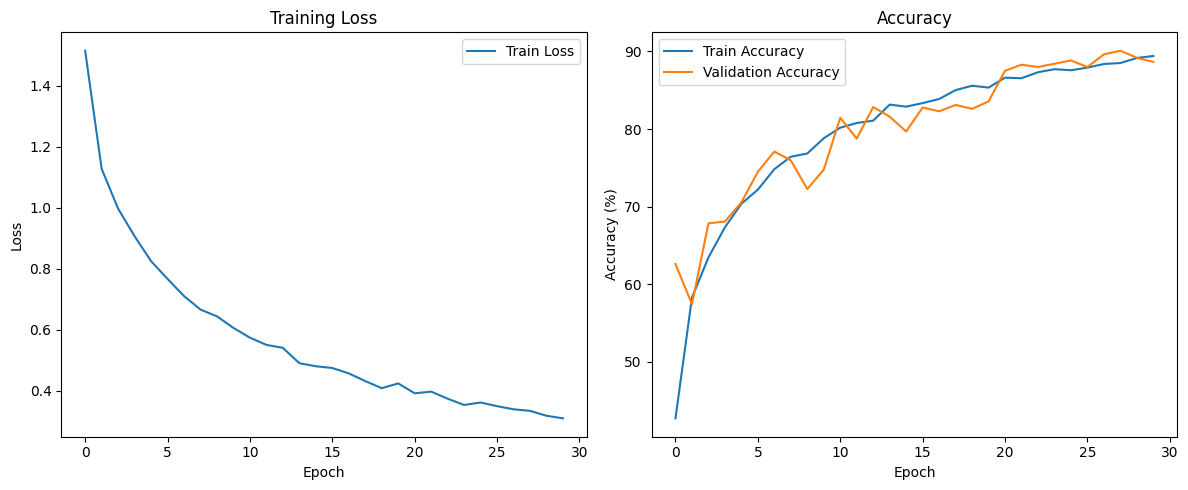

Loaded best model with F1: 0.8962
Saved final model

Evaluating model on test set:
Test Accuracy: 77.22%

Per-class accuracy:
Surprise: 77.51% (255/329)
Fear: 54.05% (40/74)
Disgust: 67.50% (108/160)
Happiness: 81.86% (970/1185)
Sadness: 76.36% (365/478)
Anger: 74.07% (120/162)
Neutral: 75.15% (511/680)

Per-class F1 scores:
Surprise: 0.8173
Fear: 0.5263
Disgust: 0.4500
Happiness: 0.8883
Sadness: 0.7684
Anger: 0.6452
Neutral: 0.7438

Mean F1 Score: 0.6913

Generating confusion matrix...
Saved confusion matrix visualization to confusion_matrix_rafdb.png

Generating sample predictions...
Saved sample predictions visualization to sample_predictions_rafdb.png

Generating attention maps...
Saved attention map visualizations for 2 samples

Evaluation completed!


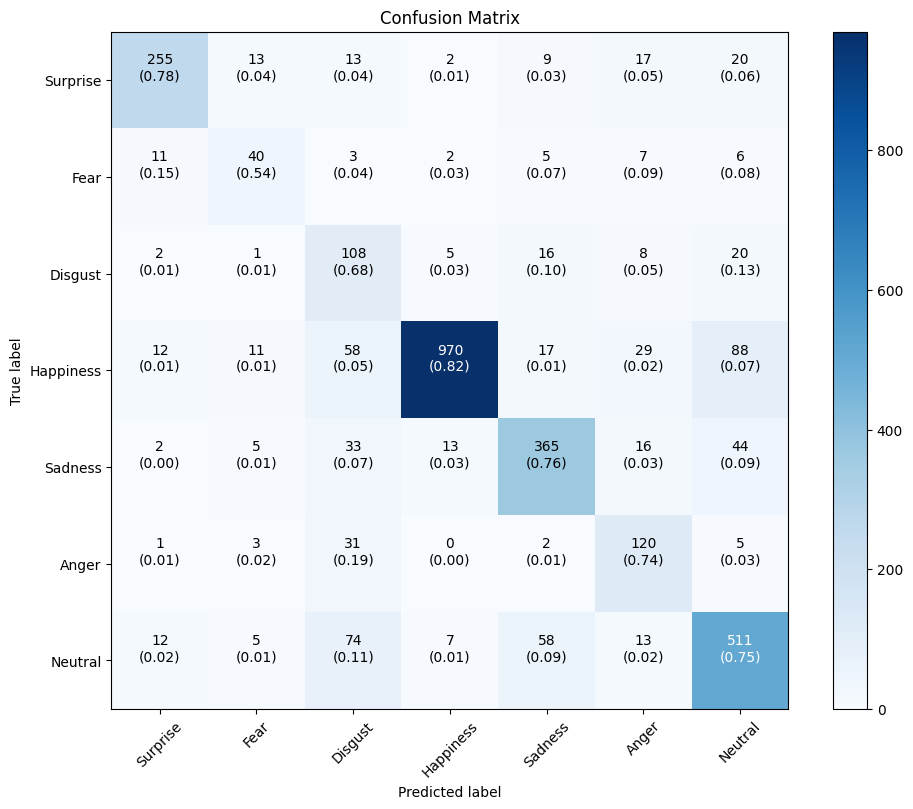

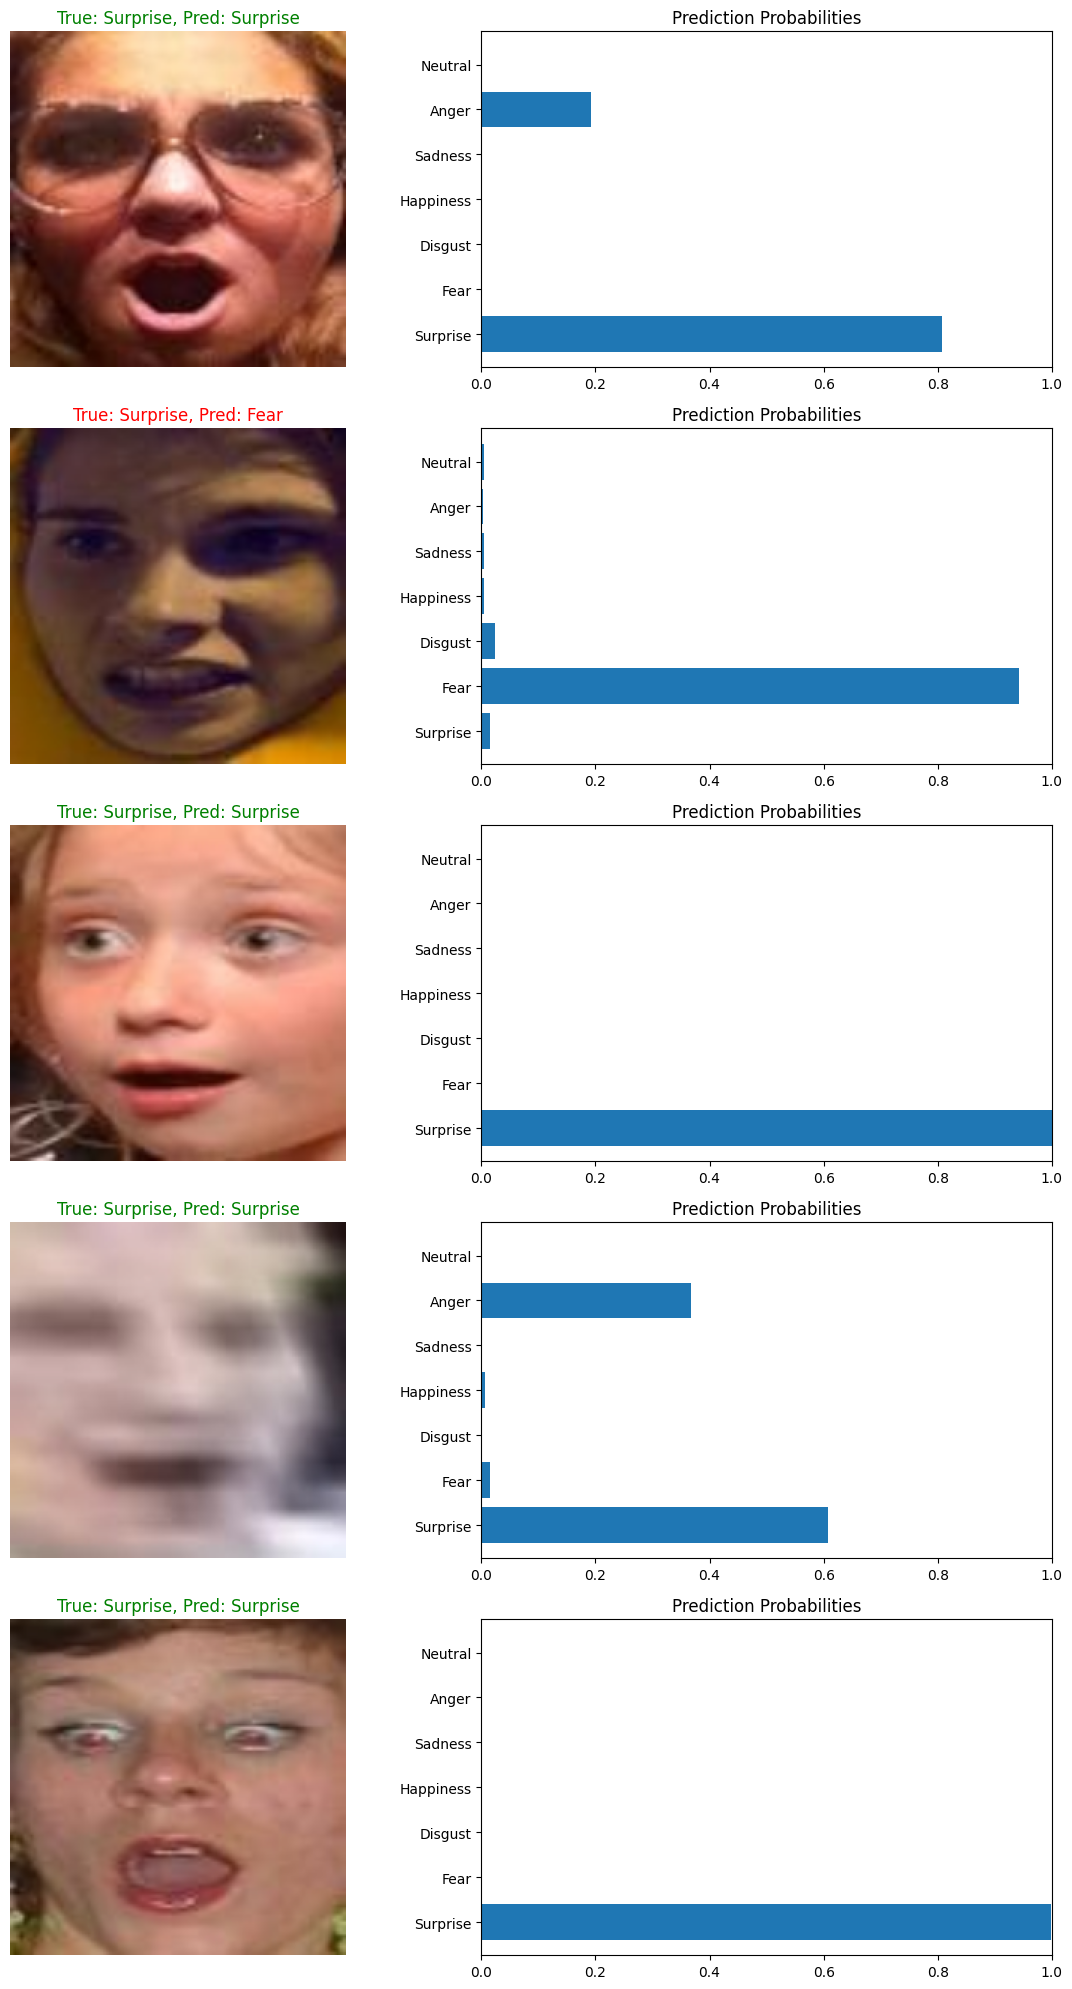

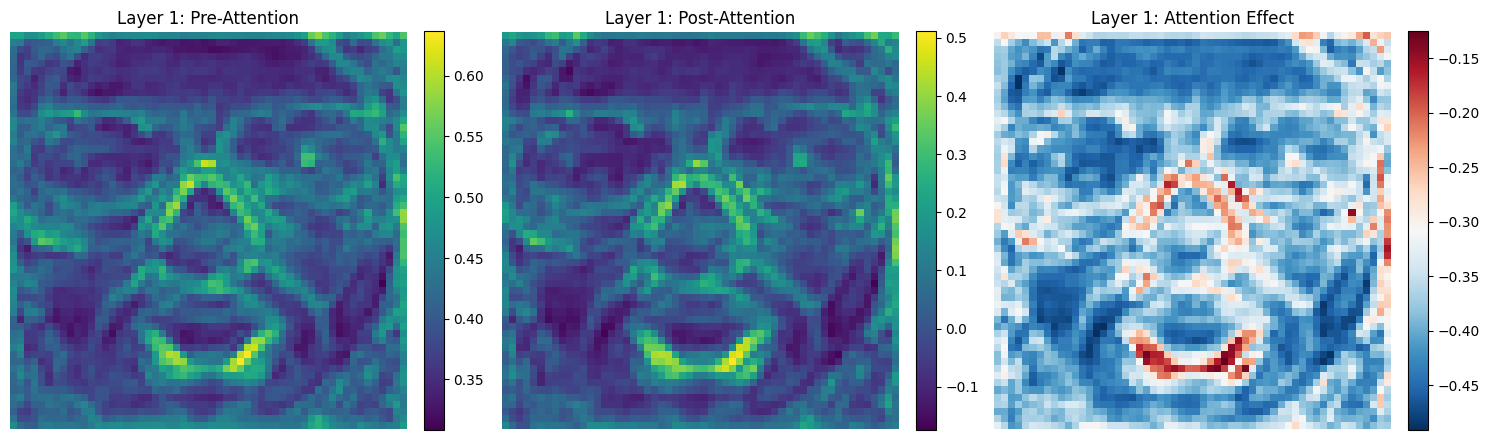

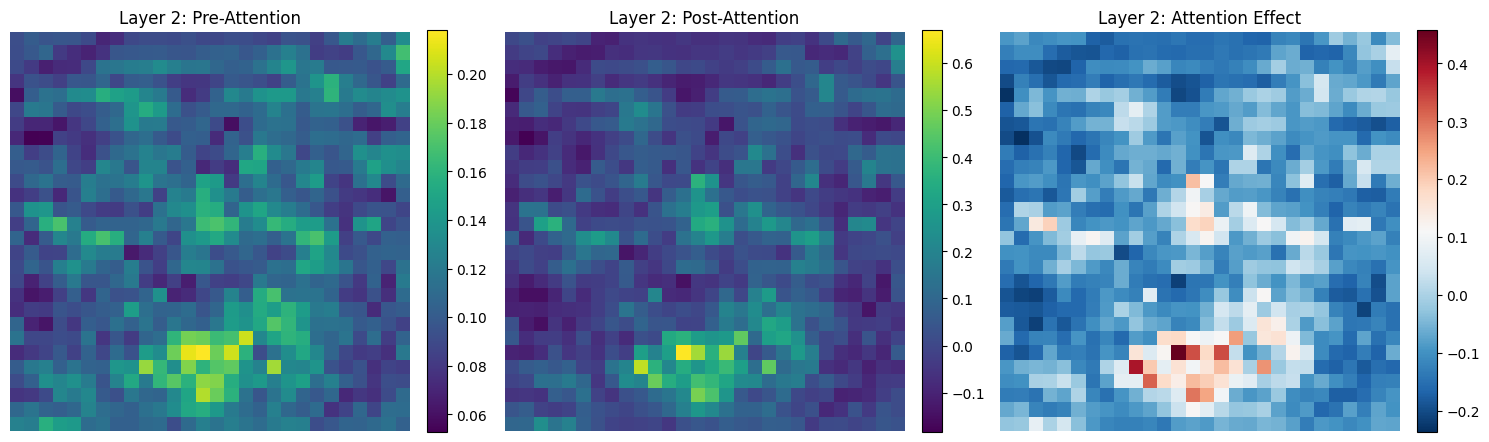

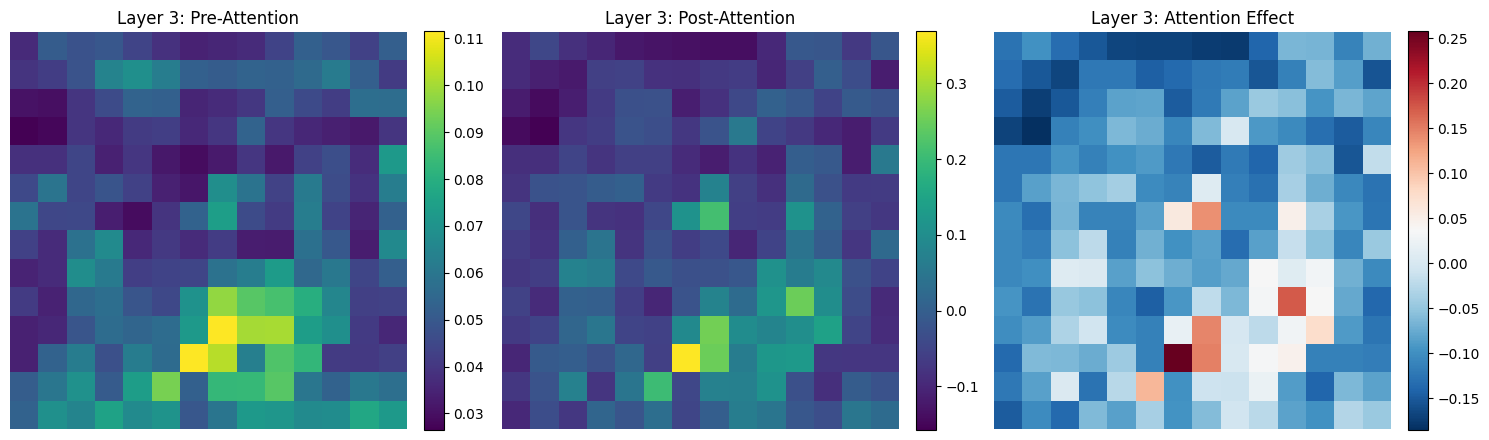

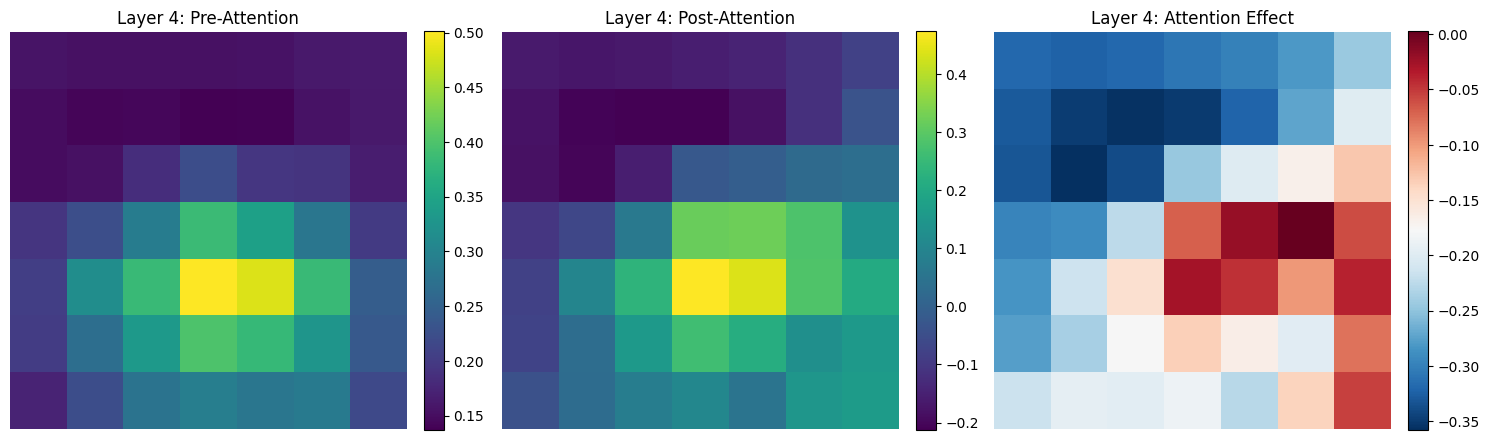

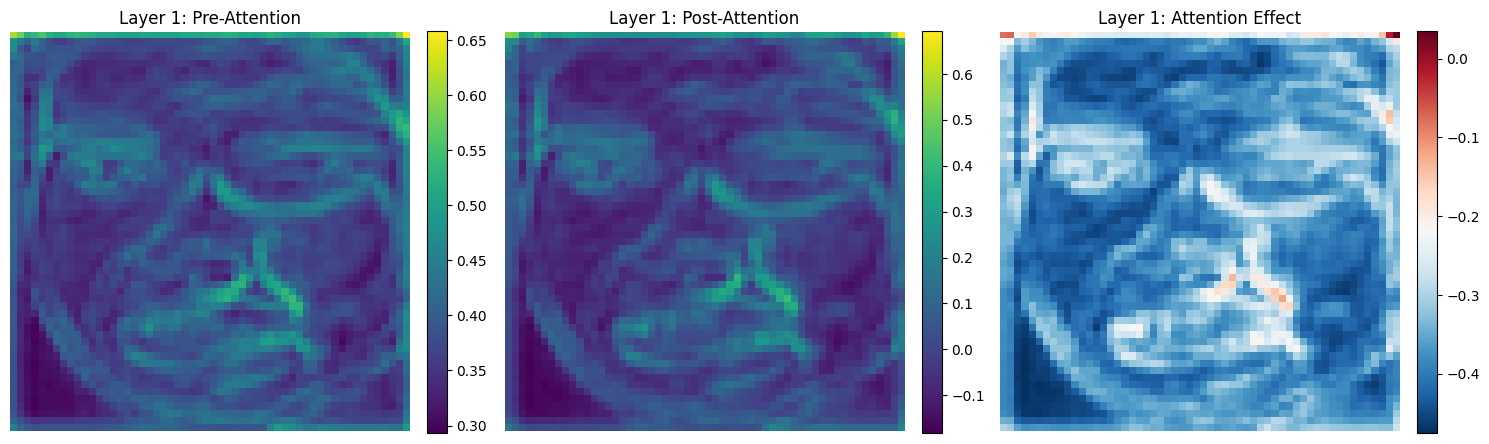

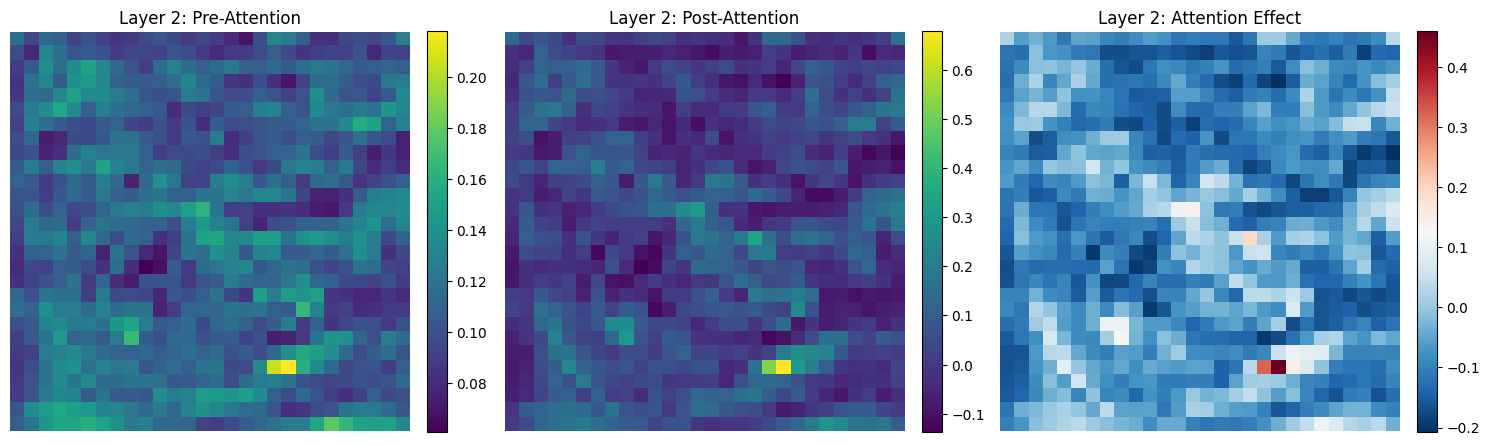

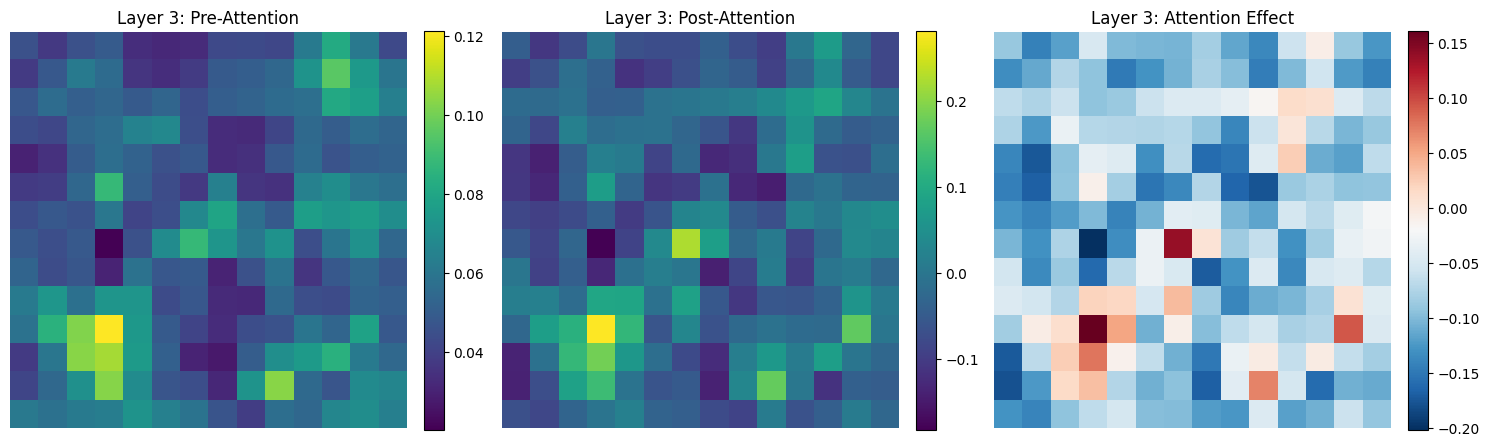

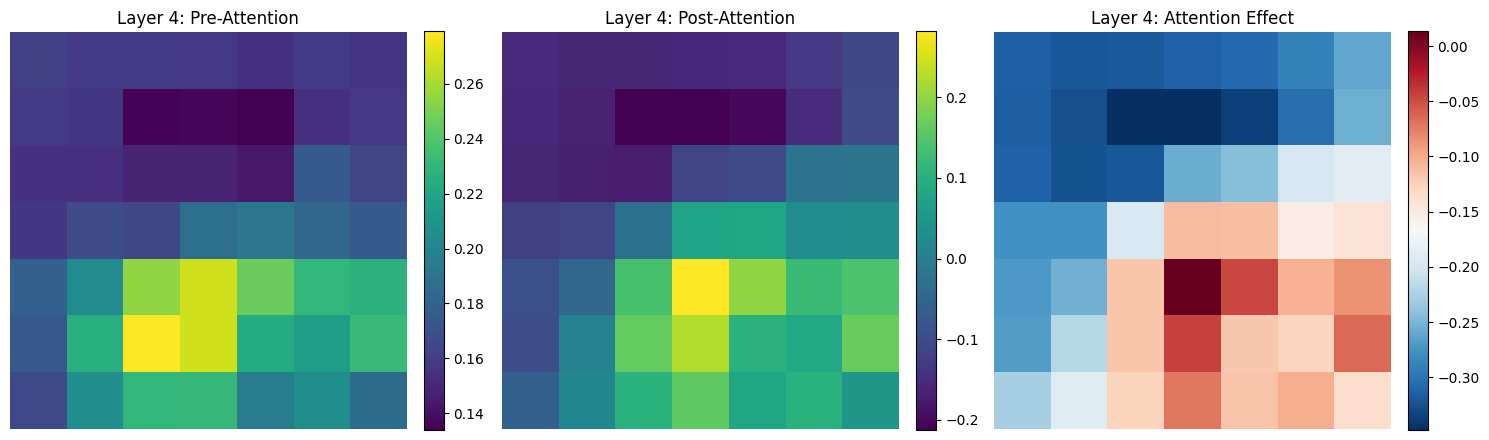

In [ ]:
# Import missing modules
import copy
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import time
from tqdm import tqdm

# Function to get data transformations
def get_transforms():
    """Get data transformations for training and testing"""
    train_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    return train_transform, test_transform

# Function to calculate class weights
def calculate_class_weights(train_loader, device):
    """Calculate class weights for handling class imbalance"""
    class_counts = torch.zeros(7, dtype=torch.float)

    for _, labels in train_loader:
        for label in labels:
            class_counts[label] += 1

    # Calculate weights (inverse of frequency)
    weights = 1.0 / class_counts
    # Normalize weights
    weights = weights / weights.sum() * len(weights)

    return weights.to(device)

# Modified test function to allow silent operation when needed
def test_model(model, test_loader, device, verbose=True):
    """Test the model on the test dataset"""
    model.eval()
    correct = 0
    total = 0
    class_correct = [0] * 7
    class_total = [0] * 7
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    confusion_matrix = torch.zeros(7, 7)

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Per-class accuracy
            for i in range(len(labels)):
                label = labels[i].item()
                pred = predicted[i].item()
                class_total[label] += 1
                if label == pred:
                    class_correct[label] += 1

                # Update confusion matrix
                confusion_matrix[label][pred] += 1

    # Calculate overall accuracy
    accuracy = 100 * correct / total

    # Calculate F1 score for each class
    f1_scores = []
    for i in range(7):
        # Calculate precision and recall
        tp = confusion_matrix[i][i].item()
        fp = confusion_matrix[:, i].sum().item() - tp
        fn = confusion_matrix[i, :].sum().item() - tp

        precision = tp / max(tp + fp, 1)
        recall = tp / max(tp + fn, 1)

        # Calculate F1 score
        f1 = 2 * precision * recall / max(precision + recall, 1e-6)
        f1_scores.append(f1)

    # Calculate mean F1 score
    mean_f1 = sum(f1_scores) / len(f1_scores)

    if verbose:
        print(f'Test Accuracy: {accuracy:.2f}%')

        # Print per-class accuracy
        print('\nPer-class accuracy:')
        for i in range(7):
            class_acc = 100 * class_correct[i] / max(class_total[i], 1)
            print(f'{emotion_labels[i]}: {class_acc:.2f}% ({class_correct[i]}/{class_total[i]})')

        # Print F1 scores
        print('\nPer-class F1 scores:')
        for i in range(7):
            print(f'{emotion_labels[i]}: {f1_scores[i]:.4f}')

        print(f'\nMean F1 Score: {mean_f1:.4f}')

    return accuracy, mean_f1, confusion_matrix

# Training function with early stopping
def train_model(model, train_loader, val_loader, device, epochs=50, patience=10):
    """Train the model with early stopping"""
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss(weight=calculate_class_weights(train_loader, device))
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, verbose=True)

    # Initialize variables for early stopping
    best_f1 = 0.0
    best_model_state = None
    no_improve_epochs = 0

    # Save training history
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_acc': [],
        'val_f1': []
    }

    # Training loop
    for epoch in range(epochs):
        start_time = time.time()

        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / total
        train_acc = 100 * correct / total

        # Validation phase
        val_acc, val_f1, _ = test_model(model, val_loader, device, verbose=False)

        # Update history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)
        history['val_f1'].append(val_f1)

        # Print epoch statistics
        epoch_time = time.time() - start_time
        print(f'Epoch {epoch+1}/{epochs} | Time: {epoch_time:.2f}s')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%')
        print(f'Val Acc: {val_acc:.2f}% | Val F1: {val_f1:.4f}')

        # Learning rate scheduler step
        scheduler.step(val_f1)

        # Check for early stopping
        if val_f1 > best_f1:
            best_f1 = val_f1
            best_model_state = model.state_dict().copy()
            no_improve_epochs = 0
            # Save the best model
            torch.save(best_model_state, 'dsan_model_rafdb_best.pth')
            print(f"Saved new best model with F1: {best_f1:.4f}")
        else:
            no_improve_epochs += 1
            print(f"No improvement for {no_improve_epochs} epochs")

        if no_improve_epochs >= patience:
            print(f"Early stopping after {epoch+1} epochs")
            break

    # Plot training history
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

    # Load the best model
    if best_model_state:
        model.load_state_dict(best_model_state)
        print(f"Loaded best model with F1: {best_f1:.4f}")

    # Save the final model
    torch.save(model.state_dict(), 'dsan_model_rafdb.pth')
    print("Saved final model")

    return model, history

# Run the training and evaluation
def run_experiment():
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Set random seed for reproducibility
    torch.manual_seed(42)
    np.random.seed(42)

    # Data transformations
    train_transform, test_transform = get_transforms()

    # Path settings for the directory structure
    raf_db_root = "./data/rafdb/DATASET"  # Path to the dataset root

    try:
        # Load train dataset
        print("Loading training dataset...")
        train_dataset = RAFDBFolderDataset(
            root_dir=raf_db_root,
            split='train',
            transform=train_transform
        )

        # Create validation split (20% of training data)
        train_size = int(0.8 * len(train_dataset))
        val_size = len(train_dataset) - train_size

        train_dataset, val_dataset = torch.utils.data.random_split(
            train_dataset,
            [train_size, val_size],
            generator=torch.Generator().manual_seed(42)
        )

        # Apply correct transforms to validation split
        val_dataset = copy.deepcopy(train_dataset)
        val_dataset.dataset.transform = test_transform

        # Create test dataset
        print("Loading test dataset...")
        test_dataset = RAFDBFolderDataset(
            root_dir=raf_db_root,
            split='test',
            transform=test_transform
        )

        # Handle class imbalance with WeightedRandomSampler
        # Count samples per class in training set
        class_counts = [0] * 7
        for idx in range(len(train_dataset)):
            _, label = train_dataset[idx]
            class_counts[label] += 1

        # Calculate weights for each sample in training set
        weights = torch.zeros(len(train_dataset))
        for idx in range(len(train_dataset)):
            _, label = train_dataset[idx]
            # Weight = 1 / class_count
            weights[idx] = 1.0 / class_counts[label] if class_counts[label] > 0 else 0

        # Create WeightedRandomSampler
        sampler = torch.utils.data.WeightedRandomSampler(
            weights=weights,
            num_samples=len(train_dataset),
            replacement=True
        )

        # Create dataloaders
        print("Creating data loaders...")
        train_loader = DataLoader(
            train_dataset,
            batch_size=32,
            sampler=sampler,
            num_workers=2,  # Reduced from 4 to avoid warnings
            pin_memory=True
        )

        val_loader = DataLoader(
            val_dataset,
            batch_size=32,
            shuffle=False,
            num_workers=2,
            pin_memory=True
        )

        test_loader = DataLoader(
            test_dataset,
            batch_size=32,
            shuffle=False,
            num_workers=2,
            pin_memory=True
        )

        print(f"Train dataset size: {len(train_dataset)}")
        print(f"Validation dataset size: {len(val_dataset)}")
        print(f"Test dataset size: {len(test_dataset)}")

        # Create model - Use enhanced model for better performance
        print("Creating model...")
        model = DSANPlus(num_classes=7, pretrained=True, dropout_rate=0.5)
        model = model.to(device)
        print(f"Model created with {count_parameters(model):,} trainable parameters")

        # Define whether to train or just evaluate
        train_model_flag = True
        model_path = "./dsan_model_rafdb.pth"

        if os.path.exists(model_path) and not train_model_flag:
            model.load_state_dict(torch.load(model_path, map_location=device))
            print(f"Loaded pretrained model from {model_path}")

            # Test on validation set to check performance
            print("\nEvaluating model on validation set:")
            val_acc, val_f1, _ = test_model(model, val_loader, device)
        else:
            print("\nTraining new model...")
            # Train the model
            model, history = train_model(
                model=model,
                train_loader=train_loader,
                val_loader=val_loader,
                device=device,
                epochs=30,  # Reduced for notebook environment
                patience=7   # Reduced for notebook environment
            )

        # Test the model
        print("\nEvaluating model on test set:")
        accuracy, mean_f1, conf_matrix = test_model(model, test_loader, device)

        # Visualize confusion matrix
        print("\nGenerating confusion matrix...")
        cm_fig = visualize_confusion_matrix(conf_matrix)
        cm_fig.savefig("confusion_matrix_rafdb.png")
        print("Saved confusion matrix visualization to confusion_matrix_rafdb.png")

        # Visualize sample predictions
        print("\nGenerating sample predictions...")
        sample_fig = visualize_sample_predictions(model, test_loader, device)
        sample_fig.savefig("sample_predictions_rafdb.png")
        print("Saved sample predictions visualization to sample_predictions_rafdb.png")

        # Visualize attention maps
        print("\nGenerating attention maps...")
        visualize_attention_maps(model, test_loader, device, num_samples=2)  # Reduced to 2 samples

        # Save evaluation results
        with open("evaluation_results_rafdb.txt", "w") as f:
            f.write(f"Test Accuracy: {accuracy:.2f}%\n")
            f.write(f"Mean F1 Score: {mean_f1:.4f}\n")

        print("\nEvaluation completed!")

    except Exception as e:
        print(f"Error during experiment: {e}")
        import traceback
        traceback.print_exc()

# Run the experiment
if __name__ == "__main__":
    run_experiment()

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class FeatureRecalibrationLoss(nn.Module):
    """
    Feature Recalibration Loss (LFR) as described in the DSAN paper

    LFR consists of three components:
    1. LFR_CE: Feature recalibration based cross-entropy loss
    2. LFR_C: Feature recalibration based center loss
    3. LCCS: Class center separation loss

    The total loss is: LFR = LFR_CE + λ1*LFR_C + λ2*LCCS
    """
    def __init__(self, num_classes=7, feature_dim=512, lambda1=0.01, lambda2=0.01, device='cuda'):
        """
        Initialize Feature Recalibration Loss

        Args:
            num_classes: Number of emotion classes (default: 7 for RAF-DB)
            feature_dim: Dimension of the feature vector
            lambda1: Weight for LFR_C (default: 0.01 based on ablation study)
            lambda2: Weight for LCCS (default: 0.01 based on ablation study)
            device: Device to store class centers
        """
        super().__init__()
        self.num_classes = num_classes
        self.feature_dim = feature_dim
        self.lambda1 = lambda1
        self.lambda2 = lambda2
        self.device = device

        # Initialize class centers for center loss
        self.centers = nn.Parameter(torch.zeros(num_classes, feature_dim).to(device))

        # Cross entropy loss for classification
        self.ce_loss = nn.CrossEntropyLoss()

    def forward(self, features, logits, targets):
        """
        Calculate the Feature Recalibration Loss

        Args:
            features: Feature vectors from the model's penultimate layer [batch_size, feature_dim]
            logits: Output logits from the model [batch_size, num_classes]
            targets: Ground truth labels [batch_size]

        Returns:
            total_loss: Combined loss value
            losses_dict: Dictionary with individual loss components
        """
        batch_size = features.size(0)

        # Calculate feature recalibration mask (a_ij)
        # Based on the paper, we set a_ij = 0 for features that interfere with classification
        # and a_ij = 1 for features that contribute to classification
        with torch.no_grad():
            pred_probs = F.softmax(logits, dim=1)
            target_probs = pred_probs[torch.arange(batch_size), targets]

            # Create mask to identify features that contribute positively to classification
            # This is a binary mask where 1 means keep the feature, 0 means suppress it
            mask = torch.zeros_like(features)

            # Calculate gradients of target probabilities with respect to features
            for i in range(batch_size):
                # We need to enable grad tracking for this specific operation
                feat = features[i].clone().detach().requires_grad_(True)
                logit = F.softmax(logit_from_feature(feat), dim=0)
                target_prob = logit[targets[i]]

                # Compute gradient
                target_prob.backward()
                grad = feat.grad

                # Features with positive gradients contribute to classification
                # Features with negative gradients interfere with classification
                mask[i] = (grad > 0).float()

        # Apply feature recalibration (element-wise multiplication with mask)
        recalibrated_features = features * mask

        # 1. Calculate LFR_CE: Feature recalibration based cross-entropy loss
        # We first need to convert recalibrated features back to logits
        recalibrated_logits = logit_from_feature(recalibrated_features)
        lfr_ce = self.ce_loss(recalibrated_logits, targets)

        # 2. Calculate LFR_C: Feature recalibration based center loss
        lfr_c = self.calculate_center_loss(recalibrated_features, targets)

        # 3. Calculate LCCS: Class center separation loss
        lccs = self.calculate_class_center_separation()

        # Combine losses
        total_loss = lfr_ce + self.lambda1 * lfr_c + self.lambda2 * lccs

        # Return individual loss components for monitoring
        losses_dict = {
            'lfr_ce': lfr_ce.item(),
            'lfr_c': lfr_c.item(),
            'lccs': lccs.item(),
            'total': total_loss.item()
        }

        return total_loss, losses_dict

    def calculate_center_loss(self, features, targets):
        """
        Calculate feature recalibration based center loss (LFR_C)

        This loss pulls features towards their class centers
        """
        batch_size = features.size(0)

        # Get the centers for each sample in the batch
        centers_batch = self.centers[targets]

        # Calculate euclidean distance between features and their centers
        # Using squared norm for computational efficiency
        center_loss = torch.sum(torch.pow(features - centers_batch, 2)) / (2 * batch_size)

        # Update centers (in practice, this should be done with a separate optimizer)
        # This is a simplified version for demonstration
        with torch.no_grad():
            # For each class in the batch
            for c in range(self.num_classes):
                # Get samples belonging to class c
                class_mask = (targets == c)
                if class_mask.sum() > 0:
                    # Calculate mean of features
                    class_features = features[class_mask]
                    class_center = torch.mean(class_features, dim=0)
                    # Update center with momentum
                    alpha = 0.1  # Center update rate
                    self.centers[c] = (1 - alpha) * self.centers[c] + alpha * class_center

        return center_loss

    def calculate_class_center_separation(self):
        """
        Calculate class center separation loss (LCCS)

        This loss pushes class centers away from each other
        """
        # Calculate pairwise distances between all class centers
        center_distances = torch.cdist(self.centers, self.centers, p=2)  # Euclidean distance

        # Create a mask to exclude self-distances
        mask = 1 - torch.eye(self.num_classes, device=self.device)

        # Calculate the inverse of distances (larger distance = smaller value)
        # Adding small epsilon to prevent division by zero
        inverse_distances = 1 / (center_distances + 1e-5)

        # Apply mask and calculate mean
        lccs = torch.sum(inverse_distances * mask) / (self.num_classes * (self.num_classes - 1))

        return lccs


# Helper function to convert features back to logits (simplified for demonstration)
def logit_from_feature(features):
    """
    Convert features back to logits using a simplified approach

    In practice, this would be the model's classification layer
    """
    # This is a placeholder - in real implementation, you would use the model's FC layer
    # You might need to pass the model's classifier as an argument to the loss function
    return features @ torch.randn(features.size(1), 7, device=features.device)


# Function to integrate the loss with the training loop
def train_with_feature_recalibration(model, train_loader, optimizer, device, epoch, log_interval=10):
    """
    Training function that uses Feature Recalibration Loss

    Args:
        model: The DSAN model
        train_loader: DataLoader for training data
        optimizer: Optimizer for model parameters
        device: Device to train on (cuda/cpu)
        epoch: Current epoch number
        log_interval: How often to log training progress
    """
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    # Initialize Feature Recalibration Loss
    loss_function = FeatureRecalibrationLoss(
        num_classes=7,
        feature_dim=512,  # Adjust based on your model's penultimate layer size
        lambda1=0.01,
        lambda2=0.01,
        device=device
    )

    # Use tqdm for progress bar if available
    try:
        from tqdm import tqdm
        pbar = tqdm(enumerate(train_loader), total=len(train_loader))
    except ImportError:
        pbar = enumerate(train_loader)

    for batch_idx, (inputs, targets) in pbar:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        # Forward pass - need to get both features and logits
        # This assumes model outputs features and logits
        # You might need to modify your model to output both
        features, logits = model(inputs, return_features=True)

        # Calculate loss
        loss, losses_dict = loss_function(features, logits, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = logits.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        # Update progress bar with loss components
        if hasattr(pbar, "set_description"):
            desc = (f'Train Epoch: {epoch} '
                f'Loss: {loss.item():.4f} '
                f'Acc: {100.*correct/total:.2f}% '
                f'LFR_CE: {losses_dict["lfr_ce"]:.4f} '
                f'LFR_C: {losses_dict["lfr_c"]:.4f} '
                f'LCCS: {losses_dict["lccs"]:.4f}')
            pbar.set_description(desc)
        elif batch_idx % log_interval == 0:
            print(f'Train Epoch: {epoch} [{batch_idx}/{len(train_loader)}]\t'
                  f'Loss: {loss.item():.4f} Acc: {100.*correct/total:.2f}%')

    # Return epoch statistics
    return running_loss / len(train_loader), 100. * correct / total


# Modify the DSAN model to return features
class DSAN(nn.Module):
    """
    Modified DSAN model to return features for Feature Recalibration Loss
    """
    def __init__(self, num_classes=7, pretrained=True):
        super().__init__()
        # Original DSAN initialization code
        # ...

    def forward(self, x, return_features=False):
        # Original forward pass code
        # ...

        # Before final classification layer, get features
        features = self.avgpool(x)
        features = torch.flatten(features, 1)

        # Final classification
        logits = self.fc(features)

        if return_features:
            return features, logits
        else:
            return logits

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.manifold import TSNE
import time
from tqdm import tqdm
import argparse
from google.colab import files
import matplotlib.pyplot as plt
from IPython.display import display, Image


class ChannelAttention(nn.Module):
    """Channel attention mechanism for feature refinement"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.shared_mlp = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.shared_mlp(self.avg_pool(x))
        max_out = self.shared_mlp(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)


class SpatialAttention(nn.Module):
    """Spatial attention mechanism for focusing on important regions"""
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.conv(out)
        return self.sigmoid(out)


class SparseAttention(nn.Module):
    """Sparse Attention module that combines channel and spatial attention"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.channel_attention = ChannelAttention(channels, reduction)

        # Store attention values for analysis
        self.attention_values = None

    def forward(self, x):
        attention = self.channel_attention(x)
        self.attention_values = attention  # Store for analysis
        x = x * attention
        return x


class LocalFeatureAttention(nn.Module):
    """Local Feature Attention module for fine-grained feature refinement"""
    def __init__(self, channels):
        super().__init__()
        self.channel_attention = ChannelAttention(channels)
        self.spatial_attention = SpatialAttention()

    def forward(self, x):
        # Apply channel attention first
        x = x * self.channel_attention(x)
        # Then apply spatial attention
        x = x * self.spatial_attention(x)
        return x


class DSAN(nn.Module):
    """
    Dual Stream Attention Network for Facial Emotion Recognition

    Architecture:
    - GFE-AN: Global Feature Extraction with Attention Network
    - MFF-AN: Multi-scale Feature Fusion with Attention Network
    - Classification layer
    """
    def __init__(self, num_classes=7, pretrained=True, alpha=0.4, using_gfe=True, using_mff=True,
                 use_sa=True, use_lfa=True, F_value=4, reduction_ratio=2):
        super().__init__()

        # Configuration parameters
        self.alpha = alpha  # Balance parameter between GFE-AN and MFF-AN
        self.using_gfe = using_gfe  # Use GFE-AN stream
        self.using_mff = using_mff  # Use MFF-AN stream
        self.use_sa = use_sa  # Use Sparse Attention in GFE-AN
        self.use_lfa = use_lfa  # Use Local Feature Attention in MFF-AN
        self.F_value = F_value  # Number of local features in MFF-AN

        # Use ResNet18 as backbone for feature extraction
        resnet = models.resnet18(pretrained=pretrained)

        # Common layers for both streams
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool

        # GFE-AN Stream (Global Feature Extraction with Attention Network)
        if self.using_gfe:
            self.gfe_layer1 = resnet.layer1
            self.gfe_attention1 = SparseAttention(64, reduction_ratio) if use_sa else nn.Identity()

            self.gfe_layer2 = resnet.layer2
            self.gfe_attention2 = SparseAttention(128, reduction_ratio) if use_sa else nn.Identity()

            self.gfe_layer3 = resnet.layer3
            self.gfe_layer4 = resnet.layer4

            # GFE classification head
            self.gfe_avgpool = nn.AdaptiveAvgPool2d(1)
            self.gfe_fc = nn.Linear(512, num_classes)

        # MFF-AN Stream (Multi-scale Feature Fusion with Attention Network)
        if self.using_mff:
            # Create separate layers for MFF-AN
            self.mff_layer1 = nn.Sequential(*list(resnet.layer1.children()))
            self.mff_layer2 = nn.Sequential(*list(resnet.layer2.children()))
            self.mff_layer3 = nn.Sequential(*list(resnet.layer3.children()))
            self.mff_layer4 = nn.Sequential(*list(resnet.layer4.children()))

            # Local feature attention blocks
            if use_lfa:
                self.mff_attention1 = LocalFeatureAttention(256)
                self.mff_attention2 = LocalFeatureAttention(512)
            else:
                self.mff_attention1 = nn.Identity()
                self.mff_attention2 = nn.Identity()

            # MFF classification head
            self.mff_avgpool = nn.AdaptiveAvgPool2d(1)
            self.mff_fc = nn.Linear(512, num_classes)

        # Storage for feature maps and attention maps
        self.gfe_features = None
        self.mff_features = None
        self.attention_maps = []

    def get_features_for_loss(self):
        """Returns features suitable for loss calculation"""
        if self.using_gfe and self.gfe_features is not None:
            # Average pooling to get a feature vector
            return F.adaptive_avg_pool2d(self.gfe_features, 1).squeeze(-1).squeeze(-1)
        elif self.using_mff and self.mff_features is not None:
            # Average pooling to get a feature vector
            return F.adaptive_avg_pool2d(self.mff_features, 1).squeeze(-1).squeeze(-1)
        else:
            return None

    def forward(self, x):
        # Reset storage
        self.attention_maps = []
        self.gfe_features = None
        self.mff_features = None

        # Common feature extraction
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        gfe_out = None
        mff_out = None

        # GFE-AN Stream
        if self.using_gfe:
            gfe = self.gfe_layer1(x)
            gfe = self.gfe_attention1(gfe)

            gfe = self.gfe_layer2(gfe)
            gfe = self.gfe_attention2(gfe)

            gfe = self.gfe_layer3(gfe)
            gfe = self.gfe_layer4(gfe)

            # Store feature maps for visualization and loss calculation
            self.gfe_features = gfe  # Don't detach here to allow gradient flow

            # Create a pooled version for classification
            gfe_pooled = self.gfe_avgpool(gfe)
            gfe_pooled = torch.flatten(gfe_pooled, 1)
            gfe_out = self.gfe_fc(gfe_pooled)

        # MFF-AN Stream
        if self.using_mff:
            mff = self.mff_layer1(x)
            mff = self.mff_layer2(mff)
            mff = self.mff_layer3(mff)

            # Apply LFA to layer3 output
            mff = self.mff_attention1(mff)

            mff = self.mff_layer4(mff)

            # Apply LFA to layer4 output
            mff = self.mff_attention2(mff)

            # Store feature maps for visualization and loss calculation
            self.mff_features = mff  # Don't detach here to allow gradient flow

            # Create a pooled version for classification
            mff_pooled = self.mff_avgpool(mff)
            mff_pooled = torch.flatten(mff_pooled, 1)
            mff_out = self.mff_fc(mff_pooled)

        # Combine outputs based on alpha parameter
        if self.using_gfe and self.using_mff:
            output = self.alpha * gfe_out + (1 - self.alpha) * mff_out
        elif self.using_gfe:
            output = gfe_out
        elif self.using_mff:
            output = mff_out
        else:
            raise ValueError("At least one stream (GFE-AN or MFF-AN) must be used")

        return output

    def get_attention_sparsity(self):
        """Calculate the sparsity of attention maps"""
        if not self.using_gfe or not self.use_sa:
            return -1

        # Get channel attention values from GFE-AN
        if hasattr(self.gfe_attention1, 'attention_values') and self.gfe_attention1.attention_values is not None:
            attention = self.gfe_attention1.attention_values
            # Calculate proportion of near-zero values (using small threshold)
            threshold = 0.01
            total_elements = attention.numel()
            zero_elements = torch.sum(attention < threshold).item()
            sparsity = zero_elements / total_elements
            return sparsity
        return -1

    def extract_features(self, x):
        """Extract features from both streams for visualization"""
        _ = self.forward(x)  # Forward pass to populate features

        # Make a copy to avoid modifying the original features
        gfe_features = self.gfe_features.detach().clone() if self.gfe_features is not None else None
        mff_features = self.mff_features.detach().clone() if self.mff_features is not None else None

        return gfe_features, mff_features


class RAFDBFolderDataset(Dataset):
    """
    RAF-DB dataset loader for folder-based structure

    The RAF-DB dataset contains 7 emotion categories mapped to folder numbers:
    1: Surprise, 2: Fear, 3: Disgust, 4: Happiness, 5: Sadness, 6: Anger, 7: Neutral
    """
    def __init__(self, root_dir, split='test', transform=None):
        """
        Args:
            root_dir (string): Root directory of the RAF-DB dataset.
            split (string): 'train' or 'test' split.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = os.path.join(root_dir, split)
        self.transform = transform
        self.samples = []

        # Check if directory exists
        if not os.path.exists(self.root_dir):
            raise RuntimeError(f"Dataset directory not found: {self.root_dir}")

        # Class mapping based on RAF-DB folder numbering
        self.class_to_idx = {
            '1': 0,  # Surprise
            '2': 1,  # Fear
            '3': 2,  # Disgust
            '4': 3,  # Happiness
            '5': 4,  # Sadness
            '6': 5,  # Anger
            '7': 6,  # Neutral
        }

        # Load all samples from the directory structure
        for class_folder in sorted(os.listdir(self.root_dir)):
            class_path = os.path.join(self.root_dir, class_folder)
            if os.path.isdir(class_path) and class_folder in self.class_to_idx:
                class_idx = self.class_to_idx[class_folder]
                img_files = os.listdir(class_path)
                print(f"Class {class_folder} ({self.get_class_name(class_idx)}): {len(img_files)} images")
                for img_file in img_files:
                    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                        self.samples.append((os.path.join(class_path, img_file), class_idx))

    def get_class_name(self, class_idx):
        """Get emotion name from class index"""
        emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']
        return emotion_labels[class_idx]

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        try:
            image = Image.open(img_path).convert('RGB')

            if self.transform:
                image = self.transform(image)

            return image, label
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            # Return a placeholder image and the same label
            placeholder = torch.zeros(3, 224, 224) if self.transform else Image.new('RGB', (224, 224))
            return placeholder, label


class CenterLoss(nn.Module):
    """Center loss for intra-class feature distance minimization"""
    def __init__(self, num_classes=7, feat_dim=512, device='cuda'):
        super(CenterLoss, self).__init__()
        self.num_classes = num_classes
        self.feat_dim = feat_dim
        self.device = device

        # Centers for each class
        self.centers = nn.Parameter(torch.randn(num_classes, feat_dim).to(device))

    def forward(self, features, labels):
        batch_size = features.size(0)
        centers_batch = self.centers.index_select(0, labels)

        # Calculate L2 distance between features and their corresponding class centers
        loss = torch.sum((features - centers_batch)**2) / batch_size
        return loss


class FeatureRecalibrationLoss(nn.Module):
    """
    Feature Recalibration Loss (LFR) as described in the paper
    Combines:
    - LFR_CE: Feature recalibration cross-entropy loss
    - LFR_C: Feature recalibration center loss
    - LCCS: Class center separation loss
    """
    def __init__(self, num_classes=7, feat_dim=512, lambda1=0.01, lambda2=0.01, device='cuda'):
        super(FeatureRecalibrationLoss, self).__init__()
        self.num_classes = num_classes
        self.feat_dim = feat_dim
        self.lambda1 = lambda1  # Weight for LFR_C
        self.lambda2 = lambda2  # Weight for LCCS
        self.device = device

        # Create centers parameter for center loss components
        self.centers = nn.Parameter(torch.randn(num_classes, feat_dim).to(device))

        # Regular cross entropy loss
        self.ce_loss = nn.CrossEntropyLoss()

    def forward(self, features, logits, labels):
        batch_size = features.size(0)

        # 1. LFR_CE: Feature recalibration cross-entropy loss
        # Standard cross-entropy loss
        lfr_ce = self.ce_loss(logits, labels)

        # 2. LFR_C: Feature recalibration center loss
        centers_batch = self.centers.index_select(0, labels)
        lfr_c = torch.sum((features - centers_batch)**2) / batch_size

        # 3. LCCS: Class center separation loss
        # Compute pairwise distances between class centers
        center_distances = torch.cdist(self.centers, self.centers, p=2)

        # Create a mask to ignore the diagonal (distance to self is 0)
        mask = 1 - torch.eye(self.num_classes, device=self.device)

        # Compute the mean of non-diagonal distances
        lccs = -torch.sum(center_distances * mask) / (self.num_classes * (self.num_classes - 1))

        # Combine all losses with their weights
        total_loss = lfr_ce + self.lambda1 * lfr_c + self.lambda2 * lccs

        return total_loss, lfr_ce, lfr_c, lccs


def count_parameters(model):
    """Count trainable parameters in the model"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def test_model(model, test_loader, device, criterion=None):
    """Test the model on the test dataset"""
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    class_correct = [0] * 7
    class_total = [0] * 7
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

    confusion_matrix = torch.zeros(7, 7)

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Calculate loss if criterion is provided
            if criterion is not None:
                if isinstance(criterion, FeatureRecalibrationLoss):
                    if hasattr(model, 'get_features_for_loss'):
                        features = model.get_features_for_loss()
                        if features is not None:
                            loss, _, _, _ = criterion(features, outputs, labels)
                        else:
                            # Fallback to standard CE if features aren't available
                            loss = nn.CrossEntropyLoss()(outputs, labels)
                    else:
                        # For models without the get_features_for_loss method
                        loss = nn.CrossEntropyLoss()(outputs, labels)
                else:
                    loss = criterion(outputs, labels)

                running_loss += loss.item() * images.size(0)

            # Per-class accuracy
            for i in range(len(labels)):
                label = labels[i].item()
                pred = predicted[i].item()
                class_total[label] += 1
                if label == pred:
                    class_correct[label] += 1

                # Update confusion matrix
                confusion_matrix[label][pred] += 1

    # Calculate overall accuracy
    accuracy = 100 * correct / total

    # Calculate average loss if criterion was provided
    avg_loss = running_loss / total if criterion is not None else 0.0

    print(f'Test Accuracy: {accuracy:.2f}%')
    if criterion is not None:
        print(f'Test Loss: {avg_loss:.4f}')

    # Calculate per-class accuracy
    print('\nPer-class accuracy:')
    for i in range(7):
        class_acc = 100 * class_correct[i] / max(class_total[i], 1)
        print(f'{emotion_labels[i]}: {class_acc:.2f}% ({class_correct[i]}/{class_total[i]})')

    # Calculate F1 score for each class
    print('\nPer-class F1 scores:')
    f1_scores = []
    for i in range(7):
        # Calculate precision and recall
        tp = confusion_matrix[i][i].item()
        fp = confusion_matrix[:, i].sum().item() - tp
        fn = confusion_matrix[i, :].sum().item() - tp

        precision = tp / max(tp + fp, 1)
        recall = tp / max(tp + fn, 1)

        # Calculate F1 score
        f1 = 2 * precision * recall / max(precision + recall, 1e-6)
        f1_scores.append(f1)
        print(f'{emotion_labels[i]}: {f1:.4f}')

    # Calculate mean F1 score
    mean_f1 = sum(f1_scores) / len(f1_scores)
    print(f'\nMean F1 Score: {mean_f1:.4f}')

    return accuracy, mean_f1, confusion_matrix, avg_loss


def train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, device, num_epochs=25, save_path=None):
    """Train the model and evaluate on test set"""
    best_acc = 0.0
    training_stats = {
        'train_loss': [],
        'train_acc': [],
        'test_loss': [],
        'test_acc': [],
        'time_per_epoch': []
    }

    for epoch in range(num_epochs):
        epoch_start = time.time()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # Progress bar
        pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')

        for inputs, labels in pbar:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zero gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)

            # Calculate loss based on criterion type
            if isinstance(criterion, FeatureRecalibrationLoss):
                if hasattr(model, 'get_features_for_loss'):
                    features = model.get_features_for_loss()
                    if features is not None:
                        loss, _, _, _ = criterion(features, outputs, labels)
                    else:
                        # Fallback to standard CE if features aren't available
                        loss = nn.CrossEntropyLoss()(outputs, labels)
                else:
                    # For models without the get_features_for_loss method
                    loss = nn.CrossEntropyLoss()(outputs, labels)
            else:
                # Standard loss function
                loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Update progress bar
            pbar.set_postfix({'loss': loss.item(), 'acc': correct/total})

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = 100 * correct / total

        # Test phase
        test_acc, _, _, test_loss = test_model(model, test_loader, device, criterion)

        # Step the scheduler
        if scheduler:
            scheduler.step()

        # Record statistics
        training_stats['train_loss'].append(epoch_loss)
        training_stats['train_acc'].append(epoch_acc)
        training_stats['test_loss'].append(test_loss)
        training_stats['test_acc'].append(test_acc)
        training_stats['time_per_epoch'].append(time.time() - epoch_start)

        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.2f}%')
        print(f'Test Loss: {test_loss:.4f} Acc: {test_acc:.2f}%')
        print(f'Time: {time.time() - epoch_start:.2f}s')

        # Save best model
        if save_path and test_acc > best_acc:
            best_acc = test_acc
            torch.save(model.state_dict(), save_path)
            print(f'Saved model with acc: {best_acc:.2f}%')

    print(f'Best test accuracy: {best_acc:.2f}%')
    return training_stats


def visualize_training_history(history):
    """Visualize training history"""
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], 'b-', label='Training Loss')
    plt.plot(epochs, history['test_loss'], 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_acc'], 'b-', label='Training Accuracy')
    plt.plot(epochs, history['test_acc'], 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()

    # Save the figure and display it in Colab
    save_path = 'training_history.png'
    plt.savefig(save_path)
    plt.show()  # Display the plot directly in Colab
    print(f"Training history saved to {save_path}")


def evaluate_feature_distribution(model, test_loader, device):
    """Evaluate feature distributions with t-SNE visualization"""
    model.eval()
    emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

    # Initialize empty lists to store features and labels
    all_gfe_features = []
    all_mff_features = []
    all_labels = []

    # Extract features from all test samples
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Extracting features"):
            images = images.to(device)

            # Forward pass to extract features
            gfe_features, mff_features = model.extract_features(images)

            if gfe_features is not None:
                # Convert to feature vectors
                gfe_features = F.adaptive_avg_pool2d(gfe_features, 1).squeeze(-1).squeeze(-1)
                all_gfe_features.append(gfe_features.cpu())

            if mff_features is not None:
                # Convert to feature vectors
                mff_features = F.adaptive_avg_pool2d(mff_features, 1).squeeze(-1).squeeze(-1)
                all_mff_features.append(mff_features.cpu())

            all_labels.append(labels)

    # Concatenate features and labels
    all_labels = torch.cat(all_labels, dim=0).numpy()

    # Create figure
    plt.figure(figsize=(20, 10))

    # Process GFE features if available
    if all_gfe_features:
        all_gfe_features = torch.cat(all_gfe_features, dim=0).numpy()

        # Apply t-SNE dimensionality reduction
        print("Running t-SNE on GFE features...")
        gfe_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(all_gfe_features)

        # Plot
        plt.subplot(1, 2, 1)
        for i, emotion in enumerate(emotion_labels):
            idx = all_labels == i
            plt.scatter(gfe_tsne[idx, 0], gfe_tsne[idx, 1], c=colors[i], label=emotion, alpha=0.7)

        plt.title('GFE-AN Feature Distribution')
        plt.xlabel('t-SNE Dimension 1')
        plt.ylabel('t-SNE Dimension 2')
        plt.legend()

    # Process MFF features if available
    if all_mff_features:
        all_mff_features = torch.cat(all_mff_features, dim=0).numpy()

        # Apply t-SNE dimensionality reduction
        print("Running t-SNE on MFF features...")
        mff_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(all_mff_features)

        # Plot
        plt.subplot(1, 2, 2)
        for i, emotion in enumerate(emotion_labels):
            idx = all_labels == i
            plt.scatter(mff_tsne[idx, 0], mff_tsne[idx, 1], c=colors[i], label=emotion, alpha=0.7)

        plt.title('MFF-AN Feature Distribution')
        plt.xlabel('t-SNE Dimension 1')
        plt.ylabel('t-SNE Dimension 2')
        plt.legend()

    plt.tight_layout()
    save_path = 'feature_distribution.png'
    plt.savefig(save_path)
    plt.show()  # Display the plot directly in Colab
    print(f"Feature distribution visualization saved to {save_path}")


def evaluate_alpha_parameter(test_loader, device, raf_db_root, model_path=None, pretrained=False):
    """Evaluate the impact of alpha parameter on model performance"""
    print("\nEvaluating alpha parameter impact:")

    alpha_values = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    accuracies = []

    for alpha in alpha_values:
        print(f"Testing with alpha = {alpha:.1f}")

        # Create model with current alpha value
        model = DSAN(num_classes=7, pretrained=pretrained, alpha=alpha)
        model = model.to(device)

        # Load pretrained weights if provided
        if model_path and os.path.exists(model_path):
            model.load_state_dict(torch.load(model_path, map_location=device))
            print(f"Loaded model weights from {model_path}")

        # Test model
        accuracy, _, _, _ = test_model(model, test_loader, device)
        accuracies.append(accuracy)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(alpha_values, accuracies, 'o-', linewidth=2)
    plt.grid(True)
    plt.xlabel('Alpha Value')
    plt.ylabel('Accuracy (%)')
    plt.title('Impact of Alpha Parameter on Model Performance')
    plt.xticks(alpha_values)
    plt.ylim(min(accuracies) - 2, max(accuracies) + 2)

    # Add text labels above points
    for i, acc in enumerate(accuracies):
        plt.text(alpha_values[i], acc + 0.5, f'{acc:.2f}%', ha='center')

    plt.savefig('alpha_parameter_evaluation.png')
    plt.close()

    print(f"Best alpha value: {alpha_values[np.argmax(accuracies)]:.1f} with accuracy: {max(accuracies):.2f}%")
    print("Alpha parameter evaluation saved to alpha_parameter_evaluation.png")


def evaluate_lambda_parameters(train_loader, test_loader, device, raf_db_root, num_epochs=5):
    """Evaluate the impact of lambda1 and lambda2 parameters on model performance"""
    print("\nEvaluating lambda parameters impact:")

    # Values to test for lambda1 (fixes lambda2 at 0.01)
    lambda1_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    lambda1_accuracies = []

    # Fixed lambda2 value
    fixed_lambda2 = 0.01

    # Test different lambda1 values
    for lambda1 in lambda1_values:
        print(f"Testing with lambda1 = {lambda1} and lambda2 = {fixed_lambda2}")

        # Create model
        model = DSAN(num_classes=7, pretrained=True, alpha=0.4)
        model = model.to(device)

        # Define loss function with current lambda values
        criterion = FeatureRecalibrationLoss(
            num_classes=7,
            feat_dim=512,
            lambda1=lambda1,
            lambda2=fixed_lambda2,
            device=device
        )

        # Define optimizer and scheduler

        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

        # Train model for a few epochs
        history = train_model(
            model=model,
            train_loader=train_loader,
            test_loader=test_loader,
            criterion=criterion,
            optimizer=optimizer,
            scheduler=scheduler,
            device=device,
            num_epochs=num_epochs,
            save_path=None  # Don't save intermediary models during parameter search
        )

        # Record best accuracy
        lambda1_accuracies.append(max(history['test_acc']))

        # Values to test for lambda2 (fixes lambda1 at 0.01)
        lambda2_values = [0.0, 0.005, 0.01, 0.05, 0.1]
        lambda2_accuracies = []

        # Fixed lambda1 value
        fixed_lambda1 = 0.01

        # Test different lambda2 values
        for lambda2 in lambda2_values:
            print(f"Testing with lambda1 = {fixed_lambda1} and lambda2 = {lambda2}")

            # Create model
            model = DSAN(num_classes=7, pretrained=True, alpha=0.4)
            model = model.to(device)

            # Define loss function with current lambda values
            criterion = FeatureRecalibrationLoss(
                num_classes=7,
                feat_dim=512,
                lambda1=fixed_lambda1,
                lambda2=lambda2,
                device=device
            )

            # Define optimizer and scheduler
            optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
            scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

            # Train model for a few epochs
            history = train_model(
                model=model,
                train_loader=train_loader,
                test_loader=test_loader,
                criterion=criterion,
                optimizer=optimizer,
                scheduler=scheduler,
                device=device,
                num_epochs=num_epochs,
                save_path=None
            )

            # Record best accuracy
            lambda2_accuracies.append(max(history['test_acc']))

        # Plot results for lambda1
        plt.figure(figsize=(16, 6))
        plt.subplot(1, 2, 1)
        plt.semilogx(lambda1_values, lambda1_accuracies, 'o-', linewidth=2)
        plt.grid(True)
        plt.xlabel('Lambda1 Value (log scale)')
        plt.ylabel('Accuracy (%)')
        plt.title('Impact of Lambda1 Parameter (with Lambda2=0.01)')

        # Add text labels above points
        for i, acc in enumerate(lambda1_accuracies):
            plt.text(lambda1_values[i], acc + 0.5, f'{acc:.2f}%', ha='center')

        # Plot results for lambda2
        plt.subplot(1, 2, 2)
        plt.plot(lambda2_values, lambda2_accuracies, 'o-', linewidth=2)
        plt.grid(True)
        plt.xlabel('Lambda2 Value')
        plt.ylabel('Accuracy (%)')
        plt.title('Impact of Lambda2 Parameter (with Lambda1=0.01)')

        # Add text labels above points
        for i, acc in enumerate(lambda2_accuracies):
            plt.text(lambda2_values[i], acc + 0.5, f'{acc:.2f}%', ha='center')

        plt.tight_layout()
        plt.savefig('lambda_parameters_evaluation.png')
        plt.close()

        print(f"Best lambda1 value: {lambda1_values[np.argmax(lambda1_accuracies)]} with accuracy: {max(lambda1_accuracies):.2f}%")
        print(f"Best lambda2 value: {lambda2_values[np.argmax(lambda2_accuracies)]} with accuracy: {max(lambda2_accuracies):.2f}%")
        print("Lambda parameters evaluation saved to lambda_parameters_evaluation.png")

def main(args):
    """Main function to train and evaluate the DSAN model"""

    import os
    os.makedirs('results', exist_ok=True)

    args.model_path = os.path.join('results', 'dsan_model.pth')

    # If no args provided, create default args
    if args is None:
        args = type('Args', (), {
            'data_dir': './data/rafdb/DATASET',
            'batch_size': 32,
            'epochs': 50,
            'lr': 0.01,
            'alpha': 0.4,
            'lambda1': 0.01,
            'lambda2': 0.01,
            'F_value': 4,
            'reduction_ratio': 2,
            'mode': 'train',
            'model_path': './dsan_model.pth',
            'no_gfe': False,
            'no_mff': False,
            'no_sa': False,
            'no_lfa': False
        })()

    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Data transformations
    train_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    # Load datasets
    try:
        print(f"Loading RAF-DB dataset from {args.data_dir}")
        train_dataset = RAFDBFolderDataset(root_dir=args.data_dir, split='train', transform=train_transform)
        test_dataset = RAFDBFolderDataset(root_dir=args.data_dir, split='test', transform=test_transform)

        train_loader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True, num_workers=4)
        test_loader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False, num_workers=4)

        print(f"Train dataset size: {len(train_dataset)}")
        print(f"Test dataset size: {len(test_dataset)}")
    except Exception as e:
        print(f"Error loading datasets: {e}")
        return

    # Create model
    model = DSAN(
        num_classes=7,
        pretrained=True,
        alpha=args.alpha,
        using_gfe=not args.no_gfe,
        using_mff=not args.no_mff,
        use_sa=not args.no_sa,
        use_lfa=not args.no_lfa,
        F_value=args.F_value,
        reduction_ratio=args.reduction_ratio
    )
    model = model.to(device)

    # Print model information
    print("\nModel Configuration:")
    print(f"Using GFE-AN: {not args.no_gfe}")
    print(f"Using MFF-AN: {not args.no_mff}")
    print(f"Using Sparse Attention: {not args.no_sa}")
    print(f"Using Local Feature Attention: {not args.no_lfa}")
    print(f"Alpha parameter: {args.alpha}")
    print(f"F value: {args.F_value}")
    print(f"Reduction ratio: {args.reduction_ratio}")
    print(f"Total parameters: {count_parameters(model):,}")

    # Define loss function
    criterion = FeatureRecalibrationLoss(
        num_classes=7,
        feat_dim=512,
        lambda1=args.lambda1,
        lambda2=args.lambda2,
        device=device
    )

    # Define optimizer and scheduler
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=0.9, weight_decay=5e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)

    # Mode selection
    if args.mode == 'train':
        print("\nTraining model...")
        history = train_model(
            model=model,
            train_loader=train_loader,
            test_loader=test_loader,
            criterion=criterion,
            optimizer=optimizer,
            scheduler=scheduler,
            device=device,
            num_epochs=args.epochs,
            save_path=args.model_path
        )

        # Visualize training history
        visualize_training_history(history)

        # Evaluate feature distribution
        evaluate_feature_distribution(model, test_loader, device)

    elif args.mode == 'test':
        # Load pretrained model
        if os.path.exists(args.model_path):
            model.load_state_dict(torch.load(args.model_path, map_location=device))
            print(f"Loaded model from {args.model_path}")
        else:
            print(f"Model file {args.model_path} not found. Using untrained model.")

        # Test model
        accuracy, mean_f1, confusion_matrix, _ = test_model(model, test_loader, device, nn.CrossEntropyLoss())

        # Evaluate feature distribution
        evaluate_feature_distribution(model, test_loader, device)

        # Calculate sparsity
        if not args.no_gfe and not args.no_sa:
            sparsity = model.get_attention_sparsity()
            print(f"Average attention sparsity: {sparsity:.4f}")

    elif args.mode == 'evaluate_alpha':
        evaluate_alpha_parameter(test_loader, device, args.data_dir, args.model_path)

    elif args.mode == 'evaluate_lambda':
        evaluate_lambda_parameters(train_loader, test_loader, device, args.data_dir, num_epochs=5)

    elif args.mode == 'ablation':
        # Create different model configurations for ablation study
        print("\nPerforming ablation studies...")

        # Test baseline (ResNet-18 with max-pooling)
        baseline_model = models.resnet18(pretrained=True)
        baseline_model.fc = nn.Linear(512, 7)  # Change output layer for 7 emotions
        baseline_model = baseline_model.to(device)

        print("\nTesting baseline (ResNet-18):")
        baseline_acc, _, _, _ = test_model(baseline_model, test_loader, device, nn.CrossEntropyLoss())

        # Test with different configurations of DSAN
        configs = [
            {'name': 'HFE1 only', 'using_gfe': True, 'using_mff': False, 'use_sa': False, 'use_lfa': False},
            {'name': 'HFE1 + SA', 'using_gfe': True, 'using_mff': False, 'use_sa': True, 'use_lfa': False},
            {'name': 'HFE2 only', 'using_gfe': False, 'using_mff': True, 'use_sa': False, 'use_lfa': False},
            {'name': 'HFE2 + LFA', 'using_gfe': False, 'using_mff': True, 'use_sa': False, 'use_lfa': True},
            {'name': 'HFE1 + HFE2', 'using_gfe': True, 'using_mff': True, 'use_sa': False, 'use_lfa': False},
            {'name': 'HFE1 + HFE2 + LFA', 'using_gfe': True, 'using_mff': True, 'use_sa': False, 'use_lfa': True},
            {'name': 'HFE1 + SA + HFE2', 'using_gfe': True, 'using_mff': True, 'use_sa': True, 'use_lfa': False},
            {'name': 'Full DSAN', 'using_gfe': True, 'using_mff': True, 'use_sa': True, 'use_lfa': True}
        ]

        results = []
        for config in configs:
            print(f"\nTesting configuration: {config['name']}")
            test_model_instance = DSAN(
                num_classes=7,
                pretrained=True,
                alpha=args.alpha,
                using_gfe=config['using_gfe'],
                using_mff=config['using_mff'],
                use_sa=config['use_sa'],
                use_lfa=config['use_lfa'],
                F_value=args.F_value,
                reduction_ratio=args.reduction_ratio
            )
            test_model_instance = test_model_instance.to(device)

            # Test model
            acc, _, _, _ = test_model(test_model_instance, test_loader, device, nn.CrossEntropyLoss())
            results.append({'config': config['name'], 'accuracy': acc})

        # Print and plot ablation results
        print("\nAblation Study Results:")
        for result in results:
            print(f"{result['config']}: {result['accuracy']:.2f}%")

        # Plot results
        plt.figure(figsize=(12, 6))
        names = [r['config'] for r in results]
        accs = [r['accuracy'] for r in results]

        plt.bar(names, accs)
        plt.axhline(y=baseline_acc, color='r', linestyle='--', label=f'Baseline: {baseline_acc:.2f}%')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Accuracy (%)')
        plt.title('Ablation Study Results')
        plt.legend()
        plt.tight_layout()
        plt.savefig('ablation_results.png')
        plt.close()

        print("Ablation results saved to ablation_results.png")

    print("\nDone!")
    if args.mode == 'train' or args.mode == 'test':
        try:
            print("\nGenerating download links for visualization results...")
            files.download('results/dsan_model.pth')
            files.download('training_history.png')
            files.download('feature_distribution.png')
        except:
            print("Files ready in the results directory.")



if __name__ == "__main__":
    # Define default arguments
    args = type('Args', (), {
        'data_dir': './data/rafdb/DATASET',  # CHANGE THIS LINE to point to your dataset
        'batch_size': 32,
        'epochs': 50,
        'lr': 0.01,
        'alpha': 0.4,
        'lambda1': 0.01,
        'lambda2': 0.01,
        'F_value': 4,
        'reduction_ratio': 2,
        'mode': 'train',
        'model_path': './dsan_model.pth',
        'no_gfe': False,
        'no_mff': False,
        'no_sa': False,
        'no_lfa': False
    })()

    # Call main function with the arguments
    main(args)


Using device: cuda
Loading RAF-DB dataset from ./data/rafdb/DATASET
Class 1 (Surprise): 1290 images
Class 2 (Fear): 281 images
Class 3 (Disgust): 717 images
Class 4 (Happiness): 4772 images
Class 5 (Sadness): 1982 images
Class 6 (Anger): 705 images
Class 7 (Neutral): 2524 images
Class 1 (Surprise): 329 images
Class 2 (Fear): 74 images
Class 3 (Disgust): 160 images
Class 4 (Happiness): 1185 images
Class 5 (Sadness): 478 images
Class 6 (Anger): 162 images
Class 7 (Neutral): 680 images
Train dataset size: 12271
Test dataset size: 3068

Model Configuration:
Using GFE-AN: True
Using MFF-AN: True
Using Sparse Attention: True
Using Local Feature Attention: True
Alpha parameter: 0.4
F value: 4
Reduction ratio: 2
Total parameters: 11,245,330

Training model...
Epoch 1/50
----------


Epoch 1/50: 100%|██████████| 384/384 [01:16<00:00,  5.05it/s, loss=4.7, acc=0.481]


Test Accuracy: 17.93%
Test Loss: 8.7398

Per-class accuracy:
Surprise: 0.00% (0/329)
Fear: 0.00% (0/74)
Disgust: 0.00% (0/160)
Happiness: 5.99% (71/1185)
Sadness: 99.37% (475/478)
Anger: 0.00% (0/162)
Neutral: 0.59% (4/680)

Per-class F1 scores:
Surprise: 0.0000
Fear: 0.0000
Disgust: 0.0000
Happiness: 0.1131
Sadness: 0.2746
Anger: 0.0000
Neutral: 0.0115

Mean F1 Score: 0.0570
Train Loss: 6.0804 Acc: 48.06%
Test Loss: 8.7398 Acc: 17.93%
Time: 84.18s
Saved model with acc: 17.93%
Epoch 2/50
----------


Epoch 2/50: 100%|██████████| 384/384 [01:15<00:00,  5.08it/s, loss=4.68, acc=0.687]


Test Accuracy: 58.02%
Test Loss: 5.7848

Per-class accuracy:
Surprise: 0.00% (0/329)
Fear: 0.00% (0/74)
Disgust: 0.00% (0/160)
Happiness: 80.17% (950/1185)
Sadness: 61.72% (295/478)
Anger: 0.00% (0/162)
Neutral: 78.68% (535/680)

Per-class F1 scores:
Surprise: 0.0000
Fear: 0.0000
Disgust: 0.0000
Happiness: 0.8222
Sadness: 0.4181
Anger: 0.0000
Neutral: 0.6335

Mean F1 Score: 0.2677
Train Loss: 4.7431 Acc: 68.72%
Test Loss: 5.7848 Acc: 58.02%
Time: 84.75s
Saved model with acc: 58.02%
Epoch 3/50
----------


Epoch 3/50: 100%|██████████| 384/384 [01:15<00:00,  5.09it/s, loss=4.18, acc=0.759]


Test Accuracy: 61.44%
Test Loss: 5.1684

Per-class accuracy:
Surprise: 79.03% (260/329)
Fear: 0.00% (0/74)
Disgust: 0.00% (0/160)
Happiness: 83.63% (991/1185)
Sadness: 0.00% (0/478)
Anger: 0.00% (0/162)
Neutral: 93.24% (634/680)

Per-class F1 scores:
Surprise: 0.6806
Fear: 0.0000
Disgust: 0.0000
Happiness: 0.8160
Sadness: 0.0000
Anger: 0.0000
Neutral: 0.6129

Mean F1 Score: 0.3014
Train Loss: 4.1668 Acc: 75.92%
Test Loss: 5.1684 Acc: 61.44%
Time: 83.63s
Saved model with acc: 61.44%
Epoch 4/50
----------


Epoch 4/50: 100%|██████████| 384/384 [01:16<00:00,  5.02it/s, loss=4.57, acc=0.788]


Test Accuracy: 62.26%
Test Loss: 4.9690

Per-class accuracy:
Surprise: 84.80% (279/329)
Fear: 0.00% (0/74)
Disgust: 0.00% (0/160)
Happiness: 83.29% (987/1185)
Sadness: 0.00% (0/478)
Anger: 0.00% (0/162)
Neutral: 94.71% (644/680)

Per-class F1 scores:
Surprise: 0.6000
Fear: 0.0000
Disgust: 0.0000
Happiness: 0.8347
Sadness: 0.0000
Anger: 0.0000
Neutral: 0.6548

Mean F1 Score: 0.2985
Train Loss: 3.8726 Acc: 78.80%
Test Loss: 4.9690 Acc: 62.26%
Time: 85.23s
Saved model with acc: 62.26%
Epoch 5/50
----------


Epoch 5/50: 100%|██████████| 384/384 [01:15<00:00,  5.10it/s, loss=4.25, acc=0.804]


Test Accuracy: 55.18%
Test Loss: 5.0218

Per-class accuracy:
Surprise: 92.71% (305/329)
Fear: 0.00% (0/74)
Disgust: 0.00% (0/160)
Happiness: 67.93% (805/1185)
Sadness: 0.00% (0/478)
Anger: 0.00% (0/162)
Neutral: 85.74% (583/680)

Per-class F1 scores:
Surprise: 0.4747
Fear: 0.0000
Disgust: 0.0000
Happiness: 0.7982
Sadness: 0.0000
Anger: 0.0000
Neutral: 0.5949

Mean F1 Score: 0.2668
Train Loss: 3.7167 Acc: 80.44%
Test Loss: 5.0218 Acc: 55.18%
Time: 84.29s
Epoch 6/50
----------


Epoch 6/50: 100%|██████████| 384/384 [01:15<00:00,  5.07it/s, loss=3.12, acc=0.818]


Test Accuracy: 58.51%
Test Loss: 4.8143

Per-class accuracy:
Surprise: 94.53% (311/329)
Fear: 0.00% (0/74)
Disgust: 0.00% (0/160)
Happiness: 73.92% (876/1185)
Sadness: 0.00% (0/478)
Anger: 0.00% (0/162)
Neutral: 89.41% (608/680)

Per-class F1 scores:
Surprise: 0.6724
Fear: 0.0000
Disgust: 0.0000
Happiness: 0.8419
Sadness: 0.0000
Anger: 0.0000
Neutral: 0.5390

Mean F1 Score: 0.2933
Train Loss: 3.6223 Acc: 81.77%
Test Loss: 4.8143 Acc: 58.51%
Time: 83.90s
Epoch 7/50
----------


Epoch 7/50: 100%|██████████| 384/384 [01:16<00:00,  5.04it/s, loss=2.75, acc=0.835]


Test Accuracy: 46.94%
Test Loss: 5.2034

Per-class accuracy:
Surprise: 73.86% (243/329)
Fear: 0.00% (0/74)
Disgust: 0.00% (0/160)
Happiness: 44.47% (527/1185)
Sadness: 0.00% (0/478)
Anger: 0.00% (0/162)
Neutral: 98.53% (670/680)

Per-class F1 scores:
Surprise: 0.7364
Fear: 0.0000
Disgust: 0.0000
Happiness: 0.6149
Sadness: 0.0000
Anger: 0.0000
Neutral: 0.4671

Mean F1 Score: 0.2598
Train Loss: 3.5037 Acc: 83.55%
Test Loss: 5.2034 Acc: 46.94%
Time: 85.30s
Epoch 8/50
----------


Epoch 8/50: 100%|██████████| 384/384 [01:15<00:00,  5.07it/s, loss=2.94, acc=0.852]


Test Accuracy: 51.73%
Test Loss: 4.9564

Per-class accuracy:
Surprise: 94.53% (311/329)
Fear: 0.00% (0/74)
Disgust: 0.00% (0/160)
Happiness: 58.14% (689/1185)
Sadness: 0.00% (0/478)
Anger: 0.00% (0/162)
Neutral: 86.32% (587/680)

Per-class F1 scores:
Surprise: 0.5918
Fear: 0.0000
Disgust: 0.0000
Happiness: 0.7338
Sadness: 0.0000
Anger: 0.0000
Neutral: 0.5034

Mean F1 Score: 0.2613
Train Loss: 3.3992 Acc: 85.15%
Test Loss: 4.9564 Acc: 51.73%
Time: 84.24s
Epoch 9/50
----------


Epoch 9/50: 100%|██████████| 384/384 [01:16<00:00,  5.04it/s, loss=3.73, acc=0.855]


Test Accuracy: 52.05%
Test Loss: 4.8980

Per-class accuracy:
Surprise: 59.57% (196/329)
Fear: 0.00% (0/74)
Disgust: 0.00% (0/160)
Happiness: 60.93% (722/1185)
Sadness: 0.00% (0/478)
Anger: 0.00% (0/162)
Neutral: 99.85% (679/680)

Per-class F1 scores:
Surprise: 0.6938
Fear: 0.0000
Disgust: 0.0000
Happiness: 0.7548
Sadness: 0.0000
Anger: 0.0000
Neutral: 0.4883

Mean F1 Score: 0.2767
Train Loss: 3.3394 Acc: 85.49%
Test Loss: 4.8980 Acc: 52.05%
Time: 84.69s
Epoch 10/50
----------


Epoch 10/50: 100%|██████████| 384/384 [01:16<00:00,  5.03it/s, loss=4.68, acc=0.87]


Test Accuracy: 57.92%
Test Loss: 4.6122

Per-class accuracy:
Surprise: 81.46% (268/329)
Fear: 0.00% (0/74)
Disgust: 0.62% (1/160)
Happiness: 70.89% (840/1185)
Sadness: 0.00% (0/478)
Anger: 0.00% (0/162)
Neutral: 98.24% (668/680)

Per-class F1 scores:
Surprise: 0.7507
Fear: 0.0000
Disgust: 0.0098
Happiness: 0.8264
Sadness: 0.0000
Anger: 0.0000
Neutral: 0.5407

Mean F1 Score: 0.3039
Train Loss: 3.2567 Acc: 86.99%
Test Loss: 4.6122 Acc: 57.92%
Time: 85.33s
Epoch 11/50
----------


Epoch 11/50: 100%|██████████| 384/384 [01:15<00:00,  5.07it/s, loss=3.1, acc=0.877]


Test Accuracy: 55.48%
Test Loss: 4.6531

Per-class accuracy:
Surprise: 35.26% (116/329)
Fear: 0.00% (0/74)
Disgust: 0.00% (0/160)
Happiness: 76.46% (906/1185)
Sadness: 0.00% (0/478)
Anger: 0.62% (1/162)
Neutral: 99.85% (679/680)

Per-class F1 scores:
Surprise: 0.4813
Fear: 0.0000
Disgust: 0.0000
Happiness: 0.8523
Sadness: 0.0000
Anger: 0.0123
Neutral: 0.5119

Mean F1 Score: 0.2654
Train Loss: 3.2197 Acc: 87.74%
Test Loss: 4.6531 Acc: 55.48%
Time: 83.77s
Epoch 12/50
----------


Epoch 12/50: 100%|██████████| 384/384 [01:16<00:00,  5.04it/s, loss=3.39, acc=0.888]


Test Accuracy: 37.19%
Test Loss: 5.2116

Per-class accuracy:
Surprise: 57.45% (189/329)
Fear: 0.00% (0/74)
Disgust: 0.00% (0/160)
Happiness: 23.12% (274/1185)
Sadness: 0.00% (0/478)
Anger: 0.00% (0/162)
Neutral: 99.71% (678/680)

Per-class F1 scores:
Surprise: 0.6974
Fear: 0.0000
Disgust: 0.0000
Happiness: 0.3756
Sadness: 0.0000
Anger: 0.0000
Neutral: 0.4179

Mean F1 Score: 0.2130
Train Loss: 3.1451 Acc: 88.83%
Test Loss: 5.2116 Acc: 37.19%
Time: 85.08s
Epoch 13/50
----------


Epoch 13/50: 100%|██████████| 384/384 [01:15<00:00,  5.08it/s, loss=2.79, acc=0.898]


Test Accuracy: 58.54%
Test Loss: 4.7520

Per-class accuracy:
Surprise: 87.84% (289/329)
Fear: 0.00% (0/74)
Disgust: 0.62% (1/160)
Happiness: 71.14% (843/1185)
Sadness: 3.56% (17/478)
Anger: 0.00% (0/162)
Neutral: 95.00% (646/680)

Per-class F1 scores:
Surprise: 0.7717
Fear: 0.0000
Disgust: 0.0116
Happiness: 0.8265
Sadness: 0.0685
Anger: 0.0000
Neutral: 0.5289

Mean F1 Score: 0.3153
Train Loss: 3.0881 Acc: 89.81%
Test Loss: 4.7520 Acc: 58.54%
Time: 84.55s
Epoch 14/50
----------


Epoch 14/50: 100%|██████████| 384/384 [01:16<00:00,  5.05it/s, loss=3.18, acc=0.906]


Test Accuracy: 60.10%
Test Loss: 4.3533

Per-class accuracy:
Surprise: 60.79% (200/329)
Fear: 0.00% (0/74)
Disgust: 0.00% (0/160)
Happiness: 81.60% (967/1185)
Sadness: 0.00% (0/478)
Anger: 0.00% (0/162)
Neutral: 99.56% (677/680)

Per-class F1 scores:
Surprise: 0.7260
Fear: 0.0000
Disgust: 0.0000
Happiness: 0.8700
Sadness: 0.0000
Anger: 0.0000
Neutral: 0.5442

Mean F1 Score: 0.3057
Train Loss: 3.0456 Acc: 90.56%
Test Loss: 4.3533 Acc: 60.10%
Time: 84.10s
Epoch 15/50
----------


Epoch 15/50: 100%|██████████| 384/384 [01:16<00:00,  5.00it/s, loss=3.19, acc=0.909]


Test Accuracy: 57.14%
Test Loss: 4.4446

Per-class accuracy:
Surprise: 65.35% (215/329)
Fear: 0.00% (0/74)
Disgust: 1.25% (2/160)
Happiness: 72.15% (855/1185)
Sadness: 0.21% (1/478)
Anger: 0.00% (0/162)
Neutral: 100.00% (680/680)

Per-class F1 scores:
Surprise: 0.7325
Fear: 0.0000
Disgust: 0.0181
Happiness: 0.8317
Sadness: 0.0042
Anger: 0.0000
Neutral: 0.5319

Mean F1 Score: 0.3026
Train Loss: 3.0193 Acc: 90.94%
Test Loss: 4.4446 Acc: 57.14%
Time: 85.98s
Epoch 16/50
----------


Epoch 16/50: 100%|██████████| 384/384 [01:16<00:00,  4.99it/s, loss=3.34, acc=0.915]


Test Accuracy: 65.03%
Test Loss: 4.3041

Per-class accuracy:
Surprise: 82.07% (270/329)
Fear: 0.00% (0/74)
Disgust: 0.62% (1/160)
Happiness: 89.79% (1064/1185)
Sadness: 0.63% (3/478)
Anger: 6.79% (11/162)
Neutral: 95.00% (646/680)

Per-class F1 scores:
Surprise: 0.7883
Fear: 0.0000
Disgust: 0.0115
Happiness: 0.8971
Sadness: 0.0125
Anger: 0.1272
Neutral: 0.5935

Mean F1 Score: 0.3472
Train Loss: 2.9720 Acc: 91.50%
Test Loss: 4.3041 Acc: 65.03%
Time: 85.13s
Saved model with acc: 65.03%
Epoch 17/50
----------


Epoch 17/50: 100%|██████████| 384/384 [01:17<00:00,  4.97it/s, loss=2.87, acc=0.92]


Test Accuracy: 53.59%
Test Loss: 4.6487

Per-class accuracy:
Surprise: 58.05% (191/329)
Fear: 0.00% (0/74)
Disgust: 5.62% (9/160)
Happiness: 64.56% (765/1185)
Sadness: 0.00% (0/478)
Anger: 0.00% (0/162)
Neutral: 99.85% (679/680)

Per-class F1 scores:
Surprise: 0.7022
Fear: 0.0000
Disgust: 0.0776
Happiness: 0.7822
Sadness: 0.0000
Anger: 0.0000
Neutral: 0.5048

Mean F1 Score: 0.2953
Train Loss: 2.9336 Acc: 91.97%
Test Loss: 4.6487 Acc: 53.59%
Time: 86.45s
Epoch 18/50
----------


Epoch 18/50: 100%|██████████| 384/384 [01:16<00:00,  5.00it/s, loss=2.85, acc=0.927]


Test Accuracy: 43.68%
Test Loss: 4.8959

Per-class accuracy:
Surprise: 0.00% (0/329)
Fear: 0.00% (0/74)
Disgust: 5.62% (9/160)
Happiness: 54.94% (651/1185)
Sadness: 0.00% (0/478)
Anger: 0.00% (0/162)
Neutral: 100.00% (680/680)

Per-class F1 scores:
Surprise: 0.0000
Fear: 0.0000
Disgust: 0.0973
Happiness: 0.7068
Sadness: 0.0000
Anger: 0.0000
Neutral: 0.4436

Mean F1 Score: 0.1782
Train Loss: 2.9113 Acc: 92.69%
Test Loss: 4.8959 Acc: 43.68%
Time: 84.92s
Epoch 19/50
----------


Epoch 19/50: 100%|██████████| 384/384 [01:16<00:00,  4.99it/s, loss=2.92, acc=0.936]


Test Accuracy: 65.48%
Test Loss: 4.2821

Per-class accuracy:
Surprise: 70.21% (231/329)
Fear: 41.89% (31/74)
Disgust: 15.62% (25/160)
Happiness: 82.03% (972/1185)
Sadness: 6.69% (32/478)
Anger: 28.40% (46/162)
Neutral: 98.82% (672/680)

Per-class F1 scores:
Surprise: 0.7925
Fear: 0.5487
Disgust: 0.1852
Happiness: 0.8856
Sadness: 0.1255
Anger: 0.4340
Neutral: 0.5965

Mean F1 Score: 0.5097
Train Loss: 2.8625 Acc: 93.56%
Test Loss: 4.2821 Acc: 65.48%
Time: 85.93s
Saved model with acc: 65.48%
Epoch 20/50
----------


Epoch 20/50: 100%|██████████| 384/384 [01:16<00:00,  5.00it/s, loss=2.91, acc=0.94]


Test Accuracy: 65.91%
Test Loss: 4.2917

Per-class accuracy:
Surprise: 58.97% (194/329)
Fear: 1.35% (1/74)
Disgust: 0.62% (1/160)
Happiness: 90.80% (1076/1185)
Sadness: 15.90% (76/478)
Anger: 14.20% (23/162)
Neutral: 95.74% (651/680)

Per-class F1 scores:
Surprise: 0.7119
Fear: 0.0267
Disgust: 0.0111
Happiness: 0.8959
Sadness: 0.2714
Anger: 0.2486
Neutral: 0.5948

Mean F1 Score: 0.3944
Train Loss: 2.8283 Acc: 94.00%
Test Loss: 4.2917 Acc: 65.91%
Time: 85.02s
Saved model with acc: 65.91%
Epoch 21/50
----------


Epoch 21/50: 100%|██████████| 384/384 [01:17<00:00,  4.97it/s, loss=2.89, acc=0.976]


Test Accuracy: 61.34%
Test Loss: 4.2203

Per-class accuracy:
Surprise: 60.79% (200/329)
Fear: 1.35% (1/74)
Disgust: 5.00% (8/160)
Happiness: 79.24% (939/1185)
Sadness: 10.67% (51/478)
Anger: 1.85% (3/162)
Neutral: 100.00% (680/680)

Per-class F1 scores:
Surprise: 0.7394
Fear: 0.0267
Disgust: 0.0784
Happiness: 0.8747
Sadness: 0.1914
Anger: 0.0364
Neutral: 0.5504

Mean F1 Score: 0.3568
Train Loss: 2.5897 Acc: 97.58%
Test Loss: 4.2203 Acc: 61.34%
Time: 86.23s
Epoch 22/50
----------


Epoch 22/50: 100%|██████████| 384/384 [01:16<00:00,  5.01it/s, loss=2.7, acc=0.986]


Test Accuracy: 63.95%
Test Loss: 4.1305

Per-class accuracy:
Surprise: 65.65% (216/329)
Fear: 2.70% (2/74)
Disgust: 8.75% (14/160)
Happiness: 83.29% (987/1185)
Sadness: 12.13% (58/478)
Anger: 4.94% (8/162)
Neutral: 99.56% (677/680)

Per-class F1 scores:
Surprise: 0.7714
Fear: 0.0526
Disgust: 0.1261
Happiness: 0.8876
Sadness: 0.2156
Anger: 0.0941
Neutral: 0.5772

Mean F1 Score: 0.3892
Train Loss: 2.5156 Acc: 98.60%
Test Loss: 4.1305 Acc: 63.95%
Time: 85.19s
Epoch 23/50
----------


Epoch 23/50: 100%|██████████| 384/384 [01:17<00:00,  4.98it/s, loss=2.6, acc=0.989]


Test Accuracy: 66.10%
Test Loss: 4.1776

Per-class accuracy:
Surprise: 77.20% (254/329)
Fear: 9.46% (7/74)
Disgust: 8.75% (14/160)
Happiness: 80.08% (949/1185)
Sadness: 23.01% (110/478)
Anger: 10.49% (17/162)
Neutral: 99.56% (677/680)

Per-class F1 scores:
Surprise: 0.8154
Fear: 0.1728
Disgust: 0.1366
Happiness: 0.8783
Sadness: 0.3716
Anger: 0.1899
Neutral: 0.5900

Mean F1 Score: 0.4507
Train Loss: 2.4920 Acc: 98.88%
Test Loss: 4.1776 Acc: 66.10%
Time: 85.90s
Saved model with acc: 66.10%
Epoch 24/50
----------


Epoch 24/50: 100%|██████████| 384/384 [01:16<00:00,  4.99it/s, loss=2.42, acc=0.992]


Test Accuracy: 66.30%
Test Loss: 4.1276

Per-class accuracy:
Surprise: 60.79% (200/329)
Fear: 0.00% (0/74)
Disgust: 8.75% (14/160)
Happiness: 84.56% (1002/1185)
Sadness: 26.99% (129/478)
Anger: 8.02% (13/162)
Neutral: 99.41% (676/680)

Per-class F1 scores:
Surprise: 0.7394
Fear: 0.0000
Disgust: 0.1400
Happiness: 0.8930
Sadness: 0.4223
Anger: 0.1486
Neutral: 0.5901

Mean F1 Score: 0.4191
Train Loss: 2.4737 Acc: 99.17%
Test Loss: 4.1276 Acc: 66.30%
Time: 85.39s
Saved model with acc: 66.30%
Epoch 25/50
----------


Epoch 25/50: 100%|██████████| 384/384 [01:17<00:00,  4.97it/s, loss=2.63, acc=0.994]


Test Accuracy: 70.47%
Test Loss: 4.0268

Per-class accuracy:
Surprise: 67.48% (222/329)
Fear: 10.81% (8/74)
Disgust: 10.62% (17/160)
Happiness: 88.52% (1049/1185)
Sadness: 37.24% (178/478)
Anger: 8.02% (13/162)
Neutral: 99.26% (675/680)

Per-class F1 scores:
Surprise: 0.7803
Fear: 0.1951
Disgust: 0.1735
Happiness: 0.9031
Sadness: 0.5361
Anger: 0.1486
Neutral: 0.6347

Mean F1 Score: 0.4816
Train Loss: 2.4523 Acc: 99.36%
Test Loss: 4.0268 Acc: 70.47%
Time: 85.82s
Saved model with acc: 70.47%
Epoch 26/50
----------


Epoch 26/50: 100%|██████████| 384/384 [01:16<00:00,  5.00it/s, loss=2.34, acc=0.994]


Test Accuracy: 71.45%
Test Loss: 4.0179

Per-class accuracy:
Surprise: 63.53% (209/329)
Fear: 4.05% (3/74)
Disgust: 13.75% (22/160)
Happiness: 89.87% (1065/1185)
Sadness: 42.89% (205/478)
Anger: 9.26% (15/162)
Neutral: 98.97% (673/680)

Per-class F1 scores:
Surprise: 0.7628
Fear: 0.0779
Disgust: 0.1921
Happiness: 0.9056
Sadness: 0.5916
Anger: 0.1695
Neutral: 0.6534

Mean F1 Score: 0.4790
Train Loss: 2.4372 Acc: 99.45%
Test Loss: 4.0179 Acc: 71.45%
Time: 85.84s
Saved model with acc: 71.45%
Epoch 27/50
----------


Epoch 27/50: 100%|██████████| 384/384 [01:17<00:00,  4.97it/s, loss=2.39, acc=0.995]


Test Accuracy: 74.80%
Test Loss: 3.9707

Per-class accuracy:
Surprise: 73.56% (242/329)
Fear: 12.16% (9/74)
Disgust: 20.00% (32/160)
Happiness: 89.70% (1063/1185)
Sadness: 49.37% (236/478)
Anger: 25.93% (42/162)
Neutral: 98.68% (671/680)

Per-class F1 scores:
Surprise: 0.8162
Fear: 0.2169
Disgust: 0.2795
Happiness: 0.9074
Sadness: 0.6484
Anger: 0.4118
Neutral: 0.6861

Mean F1 Score: 0.5666
Train Loss: 2.4340 Acc: 99.48%
Test Loss: 3.9707 Acc: 74.80%
Time: 86.16s
Saved model with acc: 74.80%
Epoch 28/50
----------


Epoch 28/50: 100%|██████████| 384/384 [01:16<00:00,  4.99it/s, loss=2.31, acc=0.996]


Test Accuracy: 71.19%
Test Loss: 4.0623

Per-class accuracy:
Surprise: 66.87% (220/329)
Fear: 8.11% (6/74)
Disgust: 20.62% (33/160)
Happiness: 86.75% (1028/1185)
Sadness: 41.84% (200/478)
Anger: 12.96% (21/162)
Neutral: 99.41% (676/680)

Per-class F1 scores:
Surprise: 0.7774
Fear: 0.1500
Disgust: 0.2727
Happiness: 0.8998
Sadness: 0.5814
Anger: 0.2295
Neutral: 0.6463

Mean F1 Score: 0.5082
Train Loss: 2.4152 Acc: 99.62%
Test Loss: 4.0623 Acc: 71.19%
Time: 86.01s
Epoch 29/50
----------


Epoch 29/50: 100%|██████████| 384/384 [01:17<00:00,  4.97it/s, loss=2.37, acc=0.996]


Test Accuracy: 72.20%
Test Loss: 3.9970

Per-class accuracy:
Surprise: 63.22% (208/329)
Fear: 0.00% (0/74)
Disgust: 13.12% (21/160)
Happiness: 91.39% (1083/1185)
Sadness: 42.26% (202/478)
Anger: 18.52% (30/162)
Neutral: 98.68% (671/680)

Per-class F1 scores:
Surprise: 0.7633
Fear: 0.0000
Disgust: 0.2111
Happiness: 0.9014
Sadness: 0.5855
Anger: 0.3125
Neutral: 0.6601

Mean F1 Score: 0.4905
Train Loss: 2.4139 Acc: 99.63%
Test Loss: 3.9970 Acc: 72.20%
Time: 86.17s
Epoch 30/50
----------


Epoch 30/50: 100%|██████████| 384/384 [01:16<00:00,  5.00it/s, loss=2.44, acc=0.996]


Test Accuracy: 66.43%
Test Loss: 4.2330

Per-class accuracy:
Surprise: 60.49% (199/329)
Fear: 0.00% (0/74)
Disgust: 8.75% (14/160)
Happiness: 81.94% (971/1185)
Sadness: 35.56% (170/478)
Anger: 3.09% (5/162)
Neutral: 99.85% (679/680)

Per-class F1 scores:
Surprise: 0.7412
Fear: 0.0000
Disgust: 0.1514
Happiness: 0.8896
Sadness: 0.5191
Anger: 0.0599
Neutral: 0.5816

Mean F1 Score: 0.4204
Train Loss: 2.4060 Acc: 99.64%
Test Loss: 4.2330 Acc: 66.43%
Time: 85.56s
Epoch 31/50
----------


Epoch 31/50: 100%|██████████| 384/384 [01:17<00:00,  4.96it/s, loss=2.66, acc=0.996]


Test Accuracy: 73.92%
Test Loss: 4.0034

Per-class accuracy:
Surprise: 70.52% (232/329)
Fear: 6.76% (5/74)
Disgust: 23.12% (37/160)
Happiness: 91.31% (1082/1185)
Sadness: 45.19% (216/478)
Anger: 16.05% (26/162)
Neutral: 98.53% (670/680)

Per-class F1 scores:
Surprise: 0.8000
Fear: 0.1266
Disgust: 0.3020
Happiness: 0.9054
Sadness: 0.6154
Anger: 0.2766
Neutral: 0.6865

Mean F1 Score: 0.5304
Train Loss: 2.4046 Acc: 99.65%
Test Loss: 4.0034 Acc: 73.92%
Time: 86.35s
Epoch 32/50
----------


Epoch 32/50: 100%|██████████| 384/384 [01:16<00:00,  5.01it/s, loss=2.46, acc=0.998]


Test Accuracy: 72.46%
Test Loss: 4.0871

Per-class accuracy:
Surprise: 64.74% (213/329)
Fear: 0.00% (0/74)
Disgust: 21.25% (34/160)
Happiness: 86.75% (1028/1185)
Sadness: 53.14% (254/478)
Anger: 12.35% (20/162)
Neutral: 99.12% (674/680)

Per-class F1 scores:
Surprise: 0.7676
Fear: 0.0000
Disgust: 0.3119
Happiness: 0.9002
Sadness: 0.6782
Anger: 0.2198
Neutral: 0.6500

Mean F1 Score: 0.5039
Train Loss: 2.3957 Acc: 99.76%
Test Loss: 4.0871 Acc: 72.46%
Time: 85.69s
Epoch 33/50
----------


Epoch 33/50: 100%|██████████| 384/384 [01:17<00:00,  4.97it/s, loss=2.37, acc=0.997]


Test Accuracy: 70.83%
Test Loss: 4.0996

Per-class accuracy:
Surprise: 61.40% (202/329)
Fear: 0.00% (0/74)
Disgust: 15.62% (25/160)
Happiness: 87.76% (1040/1185)
Sadness: 44.56% (213/478)
Anger: 11.11% (18/162)
Neutral: 99.26% (675/680)

Per-class F1 scores:
Surprise: 0.7454
Fear: 0.0000
Disgust: 0.2451
Happiness: 0.8969
Sadness: 0.6077
Anger: 0.2000
Neutral: 0.6380

Mean F1 Score: 0.4762
Train Loss: 2.3941 Acc: 99.75%
Test Loss: 4.0996 Acc: 70.83%
Time: 85.53s
Epoch 34/50
----------


Epoch 34/50: 100%|██████████| 384/384 [01:17<00:00,  4.98it/s, loss=2.4, acc=0.999]


Test Accuracy: 72.07%
Test Loss: 4.1122

Per-class accuracy:
Surprise: 72.04% (237/329)
Fear: 4.05% (3/74)
Disgust: 17.50% (28/160)
Happiness: 86.33% (1023/1185)
Sadness: 47.70% (228/478)
Anger: 9.26% (15/162)
Neutral: 99.56% (677/680)

Per-class F1 scores:
Surprise: 0.8034
Fear: 0.0779
Disgust: 0.2605
Happiness: 0.8997
Sadness: 0.6360
Anger: 0.1695
Neutral: 0.6491

Mean F1 Score: 0.4994
Train Loss: 2.3877 Acc: 99.86%
Test Loss: 4.1122 Acc: 72.07%
Time: 86.33s
Epoch 35/50
----------


Epoch 35/50: 100%|██████████| 384/384 [01:17<00:00,  4.99it/s, loss=2.49, acc=0.998]


Test Accuracy: 73.44%
Test Loss: 4.0853

Per-class accuracy:
Surprise: 67.48% (222/329)
Fear: 2.70% (2/74)
Disgust: 22.50% (36/160)
Happiness: 87.00% (1031/1185)
Sadness: 55.86% (267/478)
Anger: 14.81% (24/162)
Neutral: 98.68% (671/680)

Per-class F1 scores:
Surprise: 0.7872
Fear: 0.0526
Disgust: 0.3090
Happiness: 0.9032
Sadness: 0.6971
Anger: 0.2581
Neutral: 0.6617

Mean F1 Score: 0.5241
Train Loss: 2.3878 Acc: 99.80%
Test Loss: 4.0853 Acc: 73.44%
Time: 85.23s
Epoch 36/50
----------


Epoch 36/50: 100%|██████████| 384/384 [01:17<00:00,  4.95it/s, loss=2.43, acc=0.998]


Test Accuracy: 70.37%
Test Loss: 4.1669

Per-class accuracy:
Surprise: 61.40% (202/329)
Fear: 2.70% (2/74)
Disgust: 15.62% (25/160)
Happiness: 85.32% (1011/1185)
Sadness: 45.19% (216/478)
Anger: 16.67% (27/162)
Neutral: 99.41% (676/680)

Per-class F1 scores:
Surprise: 0.7468
Fear: 0.0526
Disgust: 0.2463
Happiness: 0.8947
Sadness: 0.6119
Anger: 0.2857
Neutral: 0.6256

Mean F1 Score: 0.4948
Train Loss: 2.3814 Acc: 99.85%
Test Loss: 4.1669 Acc: 70.37%
Time: 86.56s
Epoch 37/50
----------


Epoch 37/50: 100%|██████████| 384/384 [01:17<00:00,  4.98it/s, loss=2.32, acc=0.998]


Test Accuracy: 71.15%
Test Loss: 4.1390

Per-class accuracy:
Surprise: 65.05% (214/329)
Fear: 2.70% (2/74)
Disgust: 15.00% (24/160)
Happiness: 86.41% (1024/1185)
Sadness: 43.72% (209/478)
Anger: 20.99% (34/162)
Neutral: 99.41% (676/680)

Per-class F1 scores:
Surprise: 0.7726
Fear: 0.0526
Disgust: 0.2424
Happiness: 0.8979
Sadness: 0.6006
Anger: 0.3469
Neutral: 0.6333

Mean F1 Score: 0.5066
Train Loss: 2.3773 Acc: 99.83%
Test Loss: 4.1390 Acc: 71.15%
Time: 85.32s
Epoch 38/50
----------


Epoch 38/50: 100%|██████████| 384/384 [01:17<00:00,  4.95it/s, loss=2.54, acc=0.999]


Test Accuracy: 71.19%
Test Loss: 4.1605

Per-class accuracy:
Surprise: 67.78% (223/329)
Fear: 1.35% (1/74)
Disgust: 16.88% (27/160)
Happiness: 84.30% (999/1185)
Sadness: 46.65% (223/478)
Anger: 21.60% (35/162)
Neutral: 99.41% (676/680)

Per-class F1 scores:
Surprise: 0.7894
Fear: 0.0267
Disgust: 0.2621
Happiness: 0.8884
Sadness: 0.6264
Anger: 0.3553
Neutral: 0.6341

Mean F1 Score: 0.5118
Train Loss: 2.3780 Acc: 99.89%
Test Loss: 4.1605 Acc: 71.19%
Time: 86.55s
Epoch 39/50
----------


Epoch 39/50: 100%|██████████| 384/384 [01:17<00:00,  4.97it/s, loss=2.49, acc=0.999]


Test Accuracy: 72.82%
Test Loss: 4.1299

Per-class accuracy:
Surprise: 74.47% (245/329)
Fear: 5.41% (4/74)
Disgust: 13.75% (22/160)
Happiness: 87.68% (1039/1185)
Sadness: 43.72% (209/478)
Anger: 24.69% (40/162)
Neutral: 99.26% (675/680)

Per-class F1 scores:
Surprise: 0.8208
Fear: 0.1026
Disgust: 0.2245
Happiness: 0.8957
Sadness: 0.6006
Anger: 0.3960
Neutral: 0.6595

Mean F1 Score: 0.5285
Train Loss: 2.3709 Acc: 99.94%
Test Loss: 4.1299 Acc: 72.82%
Time: 85.50s
Epoch 40/50
----------


Epoch 40/50: 100%|██████████| 384/384 [01:17<00:00,  4.95it/s, loss=2.46, acc=0.999]


Test Accuracy: 72.46%
Test Loss: 4.1394

Per-class accuracy:
Surprise: 75.99% (250/329)
Fear: 1.35% (1/74)
Disgust: 10.00% (16/160)
Happiness: 86.41% (1024/1185)
Sadness: 46.86% (224/478)
Anger: 21.60% (35/162)
Neutral: 98.97% (673/680)

Per-class F1 scores:
Surprise: 0.8197
Fear: 0.0267
Disgust: 0.1778
Happiness: 0.8885
Sadness: 0.6257
Anger: 0.3553
Neutral: 0.6556

Mean F1 Score: 0.5070
Train Loss: 2.3716 Acc: 99.87%
Test Loss: 4.1394 Acc: 72.46%
Time: 86.76s
Epoch 41/50
----------


Epoch 41/50: 100%|██████████| 384/384 [01:17<00:00,  4.97it/s, loss=2.44, acc=0.999]


Test Accuracy: 74.77%
Test Loss: 4.1087

Per-class accuracy:
Surprise: 77.51% (255/329)
Fear: 5.41% (4/74)
Disgust: 20.00% (32/160)
Happiness: 87.17% (1033/1185)
Sadness: 53.14% (254/478)
Anger: 27.16% (44/162)
Neutral: 98.82% (672/680)

Per-class F1 scores:
Surprise: 0.8279
Fear: 0.1026
Disgust: 0.3019
Happiness: 0.8955
Sadness: 0.6782
Anger: 0.4272
Neutral: 0.6829

Mean F1 Score: 0.5595
Train Loss: 2.3684 Acc: 99.91%
Test Loss: 4.1087 Acc: 74.77%
Time: 85.42s
Epoch 42/50
----------


Epoch 42/50: 100%|██████████| 384/384 [01:17<00:00,  4.94it/s, loss=2.74, acc=0.999]


Test Accuracy: 71.71%
Test Loss: 4.2204

Per-class accuracy:
Surprise: 69.30% (228/329)
Fear: 0.00% (0/74)
Disgust: 14.38% (23/160)
Happiness: 82.28% (975/1185)
Sadness: 55.23% (264/478)
Anger: 20.99% (34/162)
Neutral: 99.41% (676/680)

Per-class F1 scores:
Surprise: 0.7903
Fear: 0.0000
Disgust: 0.2335
Happiness: 0.8880
Sadness: 0.6947
Anger: 0.3469
Neutral: 0.6330

Mean F1 Score: 0.5123
Train Loss: 2.3679 Acc: 99.91%
Test Loss: 4.2204 Acc: 71.71%
Time: 86.86s
Epoch 43/50
----------


Epoch 43/50: 100%|██████████| 384/384 [01:17<00:00,  4.96it/s, loss=2.4, acc=0.999]


Test Accuracy: 74.84%
Test Loss: 4.0904

Per-class accuracy:
Surprise: 73.25% (241/329)
Fear: 8.11% (6/74)
Disgust: 20.00% (32/160)
Happiness: 89.03% (1055/1185)
Sadness: 50.21% (240/478)
Anger: 31.48% (51/162)
Neutral: 98.68% (671/680)

Per-class F1 scores:
Surprise: 0.8183
Fear: 0.1500
Disgust: 0.3062
Happiness: 0.8960
Sadness: 0.6548
Anger: 0.4789
Neutral: 0.6857

Mean F1 Score: 0.5700
Train Loss: 2.3677 Acc: 99.93%
Test Loss: 4.0904 Acc: 74.84%
Time: 85.33s
Saved model with acc: 74.84%
Epoch 44/50
----------


Epoch 44/50: 100%|██████████| 384/384 [01:17<00:00,  4.94it/s, loss=2.5, acc=0.999]


Test Accuracy: 76.69%
Test Loss: 4.0052

Per-class accuracy:
Surprise: 73.86% (243/329)
Fear: 13.51% (10/74)
Disgust: 25.00% (40/160)
Happiness: 92.57% (1097/1185)
Sadness: 53.35% (255/478)
Anger: 32.72% (53/162)
Neutral: 96.32% (655/680)

Per-class F1 scores:
Surprise: 0.8127
Fear: 0.2381
Disgust: 0.3509
Happiness: 0.8843
Sadness: 0.6809
Anger: 0.4907
Neutral: 0.7360

Mean F1 Score: 0.5991
Train Loss: 2.3647 Acc: 99.93%
Test Loss: 4.0052 Acc: 76.69%
Time: 86.69s
Saved model with acc: 76.69%
Epoch 45/50
----------


Epoch 45/50: 100%|██████████| 384/384 [01:17<00:00,  4.98it/s, loss=2.36, acc=1]


Test Accuracy: 74.93%
Test Loss: 4.0826

Per-class accuracy:
Surprise: 72.04% (237/329)
Fear: 8.11% (6/74)
Disgust: 23.75% (38/160)
Happiness: 89.62% (1062/1185)
Sadness: 51.05% (244/478)
Anger: 26.54% (43/162)
Neutral: 98.38% (669/680)

Per-class F1 scores:
Surprise: 0.8116
Fear: 0.1500
Disgust: 0.3455
Happiness: 0.8962
Sadness: 0.6612
Anger: 0.4195
Neutral: 0.6900

Mean F1 Score: 0.5677
Train Loss: 2.3620 Acc: 99.95%
Test Loss: 4.0826 Acc: 74.93%
Time: 85.19s
Epoch 46/50
----------


Epoch 46/50: 100%|██████████| 384/384 [01:17<00:00,  4.95it/s, loss=2.46, acc=0.999]


Test Accuracy: 74.97%
Test Loss: 4.0690

Per-class accuracy:
Surprise: 68.69% (226/329)
Fear: 0.00% (0/74)
Disgust: 25.00% (40/160)
Happiness: 89.28% (1058/1185)
Sadness: 55.23% (264/478)
Anger: 25.93% (42/162)
Neutral: 98.53% (670/680)

Per-class F1 scores:
Surprise: 0.7888
Fear: 0.0000
Disgust: 0.3448
Happiness: 0.8989
Sadness: 0.6938
Anger: 0.4118
Neutral: 0.6914

Mean F1 Score: 0.5471
Train Loss: 2.3666 Acc: 99.93%
Test Loss: 4.0690 Acc: 74.97%
Time: 86.70s
Epoch 47/50
----------


Epoch 47/50: 100%|██████████| 384/384 [01:16<00:00,  4.99it/s, loss=2.32, acc=0.999]


Test Accuracy: 75.26%
Test Loss: 4.0839

Per-class accuracy:
Surprise: 75.68% (249/329)
Fear: 8.11% (6/74)
Disgust: 17.50% (28/160)
Happiness: 89.37% (1059/1185)
Sadness: 52.09% (249/478)
Anger: 29.01% (47/162)
Neutral: 98.68% (671/680)

Per-class F1 scores:
Surprise: 0.8164
Fear: 0.1500
Disgust: 0.2828
Happiness: 0.8967
Sadness: 0.6694
Anger: 0.4498
Neutral: 0.6943

Mean F1 Score: 0.5656
Train Loss: 2.3632 Acc: 99.94%
Test Loss: 4.0839 Acc: 75.26%
Time: 85.11s
Epoch 48/50
----------


Epoch 48/50: 100%|██████████| 384/384 [01:17<00:00,  4.97it/s, loss=2.48, acc=0.999]


Test Accuracy: 75.00%
Test Loss: 4.0700

Per-class accuracy:
Surprise: 68.39% (225/329)
Fear: 2.70% (2/74)
Disgust: 25.00% (40/160)
Happiness: 89.20% (1057/1185)
Sadness: 53.14% (254/478)
Anger: 32.72% (53/162)
Neutral: 98.53% (670/680)

Per-class F1 scores:
Surprise: 0.7895
Fear: 0.0526
Disgust: 0.3620
Happiness: 0.8988
Sadness: 0.6764
Anger: 0.4930
Neutral: 0.6868

Mean F1 Score: 0.5656
Train Loss: 2.3641 Acc: 99.93%
Test Loss: 4.0700 Acc: 75.00%
Time: 86.30s
Epoch 49/50
----------


Epoch 49/50: 100%|██████████| 384/384 [01:16<00:00,  5.00it/s, loss=2.6, acc=0.999]


Test Accuracy: 71.32%
Test Loss: 4.1377

Per-class accuracy:
Surprise: 68.69% (226/329)
Fear: 0.00% (0/74)
Disgust: 21.25% (34/160)
Happiness: 87.00% (1031/1185)
Sadness: 41.84% (200/478)
Anger: 14.20% (23/162)
Neutral: 99.12% (674/680)

Per-class F1 scores:
Surprise: 0.7820
Fear: 0.0000
Disgust: 0.3077
Happiness: 0.8899
Sadness: 0.5839
Anger: 0.2486
Neutral: 0.6493

Mean F1 Score: 0.4945
Train Loss: 2.3650 Acc: 99.94%
Test Loss: 4.1377 Acc: 71.32%
Time: 85.00s
Epoch 50/50
----------


Epoch 50/50: 100%|██████████| 384/384 [01:17<00:00,  4.97it/s, loss=2.4, acc=0.999]


Test Accuracy: 75.85%
Test Loss: 4.0392

Per-class accuracy:
Surprise: 77.81% (256/329)
Fear: 0.00% (0/74)
Disgust: 25.00% (40/160)
Happiness: 89.87% (1065/1185)
Sadness: 53.14% (254/478)
Anger: 26.54% (43/162)
Neutral: 98.38% (669/680)

Per-class F1 scores:
Surprise: 0.8232
Fear: 0.0000
Disgust: 0.3524
Happiness: 0.9010
Sadness: 0.6764
Anger: 0.4195
Neutral: 0.7068

Mean F1 Score: 0.5542
Train Loss: 2.3640 Acc: 99.93%
Test Loss: 4.0392 Acc: 75.85%
Time: 86.21s
Best test accuracy: 76.69%


Extracting features: 100%|██████████| 96/96 [00:07<00:00, 12.04it/s]
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ee15d4749a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/loca

Running t-SNE on GFE features...
Running t-SNE on MFF features...
Feature distribution visualization saved to feature_distribution.png

Done!


In [12]:
!find data/ -maxdepth 8 -type d

data/
data/ferplus
data/ferplus/validation
data/ferplus/validation/disgust
data/ferplus/validation/fear
data/ferplus/validation/contempt
data/ferplus/validation/angry
data/ferplus/validation/neutral
data/ferplus/validation/sad
data/ferplus/validation/happy
data/ferplus/validation/suprise
data/ferplus/test
data/ferplus/test/disgust
data/ferplus/test/fear
data/ferplus/test/contempt
data/ferplus/test/angry
data/ferplus/test/neutral
data/ferplus/test/sad
data/ferplus/test/happy
data/ferplus/test/suprise
data/ferplus/train
data/ferplus/train/disgust
data/ferplus/train/fear
data/ferplus/train/contempt
data/ferplus/train/angry
data/ferplus/train/neutral
data/ferplus/train/sad
data/ferplus/train/happy
data/ferplus/train/suprise
data/rafdb
data/rafdb/DATASET
data/rafdb/DATASET/test
data/rafdb/DATASET/test/3
data/rafdb/DATASET/test/6
data/rafdb/DATASET/test/7
data/rafdb/DATASET/test/2
data/rafdb/DATASET/test/1
data/rafdb/DATASET/test/4
data/rafdb/DATASET/test/5
data/rafdb/DATASET/train
data/rafd